<center><font size=8px><b>💕<font color=blue>Heart Disease 💔<br> EDA & Prediction 🔮</font></b><br><span style="color: #FF5C8A; font-size: 24px">with Various Machine Learning Models </span></h1></font>
</center>
<hr>


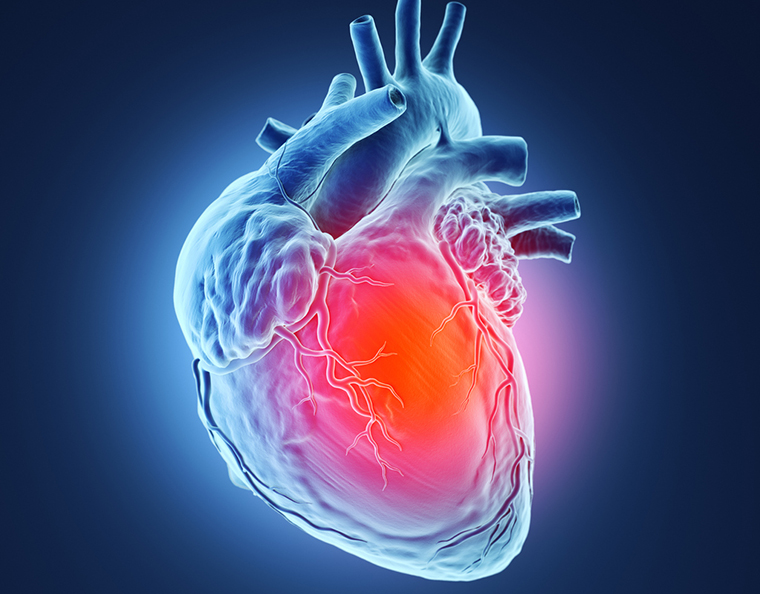


# 1. | Introduction 👋
  * Dataset Problems 🤔 </br>
    * 👉 This dataset contains information about contains diagnoses of heart disease patients. </br>
    * 👉 The <mark><b>goal of the problem is to predict the target variable</b></mark>, called condition.
    * 👉 It has <mark><b>only two unique associated values</b></mark>, so let's treat this a  <mark><b>binary classification problem</b></mark>.
    * 👉 Choose the best machine learning model with highest accuracy <mark><b>to determine whether a person has heart disease or not</b></mark>.
  * Machine Learning Modules 👨‍💻 </br>
  👉 The <b>models</b> used in this notebook:
    <ol start="1">
        <li> <b>Logistic Regression</b>,</li>
        <li> <b>K-Nearest Neighbour (KNN)</b>,</li>
        <li> <b>Support Vector Machine (SVM)</b>,</li>
        <li> <b>Gaussian Naive Bayes</b>,</li>
        <li> <b>Decision Tree</b>,</li>
        <li> <b>Random Forest</b>,</li>
        <li> <b>Gradient Boosting</b>,</li>
        <li> <b>AdaBoost</b>, and</li>
        <li> <b><span style="font-size: 8; background-color: #7289da;"><sup>*NEW*</sup></span> XGBoosting</b>.</li>
    </ol>
  * Dataset Description 🧾 </br>
  👉 There are <mark><b>14 variables</b></mark> in this dataset:
    <ul>
        <li> <b>9 categorical</b> variables, and</li>
        <li> <b>5 continuous</b> variables.</li>
    </ul>

    * <mark><b>FEATURES</b></mark>
    <ol start="1">
      <li> <b>age |</b> age of persons</b></li>
      <li> <b>sex |</b> Gender of patient (Male:0/Female:1)</b></li>
      <li> <b>cp | </b> Chest Pain type (4 values)</b></li>
    <ul>
                        <li> Value 0: typical angina</br></li>
                        <li> Value 1: atypical angina</br></li>
                        <li> Value 2: non-anginal pain</br></li>
                        <li> Value 3: asymptomatic</br></li>
    </ul>
      <li> <b>trtbps |</b> resting blood pressure (in mm Hg)</b></li>
      <li> <b>chol |</b> serum cholestrol in mg/dl fetched via BMI sensor</b></li>
      <li> <b>fbs |</b> fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</b></li>
      <li> <b>restecg |</b> Resting Electrocardiographic (ECG) results (values 0,1,2)</b></li>
    <ul>
                        <li> Value 0: normal</br></li>
                        <li> Value 1: having ST-T wave abnormality</br>
                             (T wave inversions and/or ST elevation or depression of > 0.05 mV)</br></li>
                        <li> Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</br></li>
    </ul>
      <li> <b>thalachh |</b> Maximum Heart Rate Achieved</b></li>
      <li> <b>exng |</b> exercise induced angina (1 = yes; 0 = no)</b></li>
      <li> <b>oldpeak |</b> oldpeak = ST depression induced by exercise relative to rest <br>
      <li> <b>slp |</b> the slope of the peak exercise ST segment</b></li>
      <li> <b>caa |</b> number of major vessels (0-3) colored by flourosopy</b></li>
      <li> <b>thall |</b> Thalium stress test results: 0=normal, 1=fixed defect, 2 = reversable defect</b></li> 
    </ol>

    * <mark><b>TARGET VARIABLE</b></mark></br>
        * condition: diagnosis of heart disease (angiographic disease status)<br>
          > <b>Value 0:</b> < 50% diameter narrowing (negative for disease) <br>
          > <b>Value 1:</b> > 50% diameter narrowing (positive for disease)
</div><br>

* Mount Google Drive

In [1]:
# from google.colab import drive
# import os

# drive.mount('/content/gdrive')

# 2. | Importing Libraries 📚
* 👉 <b>Importing libraries</b> that will be used in this notebook.

In [2]:
### Import libraries ###
# Basic libraries
import os, re, glob, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy, statsmodels, plotly
# Special Visualization
from matplotlib.collections import PathCollection
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
import plotly.offline
# Model Saved Libraries
# When using the joblib library, 
    # it uses pickle under the hood 
    # but has some additional functionality that can handle certain types of objects more efficiently. 
        # For example, joblib includes support for parallel processing and memory-mapped files, 
        # which can help reduce memory usage and improve performance.
# In your specific case, it's possible that 
    # the model you are trying to save contains an object that cannot be pickled by pickle, 
    # but can be handled by joblib. 
        # This could explain why using pickle resulted in a file size of 0 bytes, 
        # while using joblib resulted in a file size of 'x'KB.
import pickle, joblib

# SKLearn : Preprocessig, Pipeline, Model Selection, Feature Selection, SMOTE, Counter, Metric
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, \
                                 OneHotEncoder, LabelEncoder, PowerTransformer, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, \
                                    StratifiedKFold, RepeatedStratifiedKFold, \
                                    cross_validate, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,\
                            recall_score, precision_score, f1_score, accuracy_score, \
                            confusion_matrix, classification_report, \
                            roc_auc_score, make_scorer, precision_recall_curve, roc_curve
import imblearn
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from collections import Counter

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Yellowbrick : Visualization Configuration
import yellowbrick
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix, ClassificationReport

# Progress Bar Display and Parallel Computing
from tqdm import tqdm
from joblib import Parallel, delayed

# Importing and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Display Styling
# Warnings and Colors Implementation
import warnings, colorama, termcolor
%matplotlib inline
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

# 3. | Color Pallete & User Defined Function 👓 

* 👉 <b>create some color palettes that will be used in this notebook.</b>

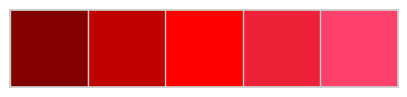

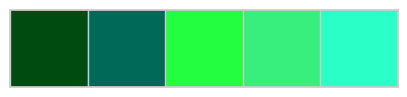

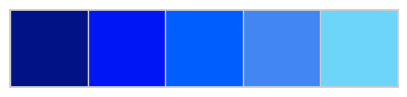

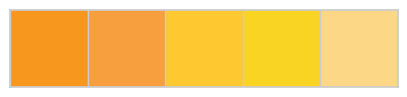

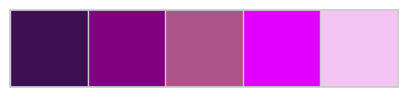

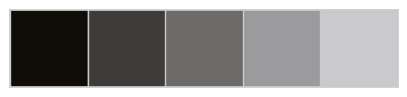

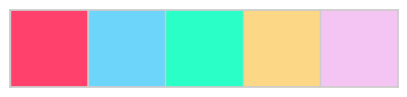

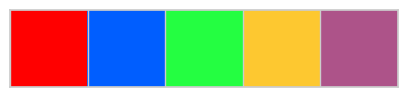

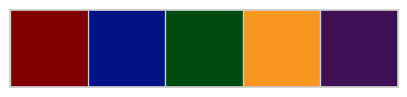

In [3]:
# --- Create List of Color Gradient Palletes ---
red_grad = ['#800000', '#BF0000', '#FF0000', '#ED213A', '#FF416C']
green_grad = ['#004b0f', '#006957', '#24FE41', '#38ef7d', '#29ffc6']
blue_grad = ['#011286', '#0116f4', '#005EFF', '#4286f4', '#6DD5FA']
gold_grad = ['#F7971E', '#F79F3E', '#FDC830', '#F9D423', '#FBD786']
purple_grad = ['#3c1053', '#800080', '#ad5389' , '#E100FF', '#f4c4f3']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
color_mix_light = ['#FF416C', '#6DD5FA', '#29ffc6', '#FBD786', '#f4c4f3']
color_mix_medium = ['#FF0000', '#005EFF', '#24FE41', '#FDC830', '#ad5389']
color_mix_dark = ['#800000', '#011286', '#004b0f', '#F7971E', '#3c1053']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(green_grad)
sns.palplot(blue_grad)
sns.palplot(gold_grad)
sns.palplot(purple_grad)
sns.palplot(black_grad)
sns.palplot(color_mix_light)
sns.palplot(color_mix_medium)
sns.palplot(color_mix_dark)

* 👉 <b>User functions that will be used in this notebook.</b>

In [4]:
# Dataset overall details functions
def dataset_details(df):
    # Print Dataset Info
    print(".: Dataset Info :.")
    print("*" * 30)
    print("Total Rows:", df.shape[0])
    print("Total Columns:", df.shape[1])
    print("*" * 30)
    print("Columns:", df.columns)
    print("*" * 30)
    print("Dataframe columns null check:\n", df.isnull().sum())
    print("*" * 30)
    print("Dataframe's number of columns' unique check:\n", df.nunique())
    print("*" * 30)
    print("Dataframe's data duplication check:\n", df.duplicated().value_counts())
    print("*" * 30)

    # Print Dataset Detail
    print(".: Dataset Details :.")
    print("*" * 30)
    df.info()
    # df.info(memory_usage = False)

In [5]:
# Function for determining the number and percentages of the missing values
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=["Missing_Number", "Missing_Percentage"])
    return missing_values

In [6]:
# Create text styling function
def text_style_selection(ax, rect, style='vertical', graphs='Main BarChart', stack=False):
    if graphs == 'Main BarChart':
        ax.text(rect.get_x()+rect.get_width()/2, 
                rect.get_height() + 4, rect.get_height(),
                horizontalalignment="center", fontsize=10,
                bbox=dict(facecolor="none", edgecolor=black_grad[1],
                        linewidth=0.25, boxstyle="round"))
    elif graphs == 'Output BarChart':
        if style == 'vertical':
            if stack == True:
                width, height = rect.get_width(), rect.get_height()
                x, y = rect.get_xy()
                # print('X values: \n', rect.get_x())
                # print('Y values: \n', rect.get_y())
                # print('Width values: \n', rect.get_width())
                # print('Height values: \n', rect.get_height())
                ax.text (x+width/2, y+height/2, "{:.0f}".format(height), 
                            horizontalalignment='center', verticalalignment='center')
            else:
                # print('X values: \n', rect.get_x())
                # print('Y values: \n', rect.get_y())
                # print('Width values: \n', rect.get_width())
                # print('Height values: \n', rect.get_height())
                ax.text (rect.get_x()+rect.get_width()/2, 
                        rect.get_height()+1.25,rect.get_height(), 
                        horizontalalignment='center', fontsize=10)
        else:
            width, height = rect.get_width(), rect.get_height()
            x, y = rect.get_xy()
            ax.text (x+width/2, y+height/2, "{:.0f}".format(width), 
                        horizontalalignment='center', verticalalignment='center')
    else:
        pass

# Create label function
def label(x_title, y_title, ticks1, ticks2, labels_var, labels_output, style='vertical', graphs='Main BarChart'):
    if graphs == 'Main BarChart':
        plt.xlabel(x_title, fontsize=12, fontweight='bold', 
                fontfamily='sans-serif', color=black_grad[0])
        plt.ylabel(y_title, fontsize=12, fontweight='bold', 
                fontfamily='sans-serif', color=black_grad[0])
        plt.xticks(ticks1, labels_var)
    elif graphs == 'Output BarChart':
        plt.title(f'Heart Disease Distribution based on {x_title.title()}', 
                fontsize=15, fontweight='heavy', fontfamily='sans-serif',
                x=0, y=1, ha='left', color=black_grad[0])
        # plt.tight_layout(rect=[0,  0.025, 1, 0.025])    
        if style == 'vertical':
            plt.xlabel(x_title, fontfamily='sans-serif', fontweight='bold', 
                        color=black_grad[1])
            plt.ylabel(y_title, fontfamily='sans-serif', fontweight='bold', 
                        color=black_grad[1])
            plt.xticks(ticks1, ticks2, rotation=0)
            plt.grid(axis='x', alpha=0.4)
            plt.grid(axis='y', alpha=0)
            plt.legend(labels=labels_output, title='$\\bf{Output}$', fontsize='8', 
                    title_fontsize='9', loc='upper right', frameon=True)
        elif style == 'horizontal':
            plt.xlabel(y_title, fontfamily='sans-serif', fontweight='bold', 
                        color=black_grad[1])
            plt.ylabel(x_title, fontfamily='sans-serif', fontweight='bold', 
                        color=black_grad[1])
            plt.yticks(rotation=0)
            plt.grid(axis='y', alpha=0.4)
            plt.grid(axis='x', alpha=0)
            plt.legend(labels=labels_output, title='$\\bf{Output}$', fontsize='8', 
                    title_fontsize='9', loc='upper right', frameon=True)
        else:
            pass
    else:
        pass

In [7]:
# Define Categorical Plots Function
def categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df, 
                      kinds='bar', stacked=False, output_graph=True):
  # Size for Both Figures
  plt.figure(figsize=(20, 8))
  plt.suptitle(f'{x_title} Distribution', fontsize='20', fontweight="heavy", 
              fontfamily='sans-serif', color=black_grad[0])
  
  # Pie Chart
  plt.subplot(1, 2, 1)
  plt.title('Pie Chart', 
            fontsize=15, fontweight="bold", fontfamily="sans-serif", 
            color=black_grad[0])
  plt.pie(df[var].value_counts(), labels=labels_var, colors=color_mix_light[0:5], 
          pctdistance=0.7, autopct="%.2f%%", 
          wedgeprops=dict(alpha=0.65, edgecolor=black_grad[1]), textprops={"fontsize":12})
  
  # Barchart 1
  plt.subplot(1,2 ,2)
  plt.title("Bar Chart", fontsize=15, fontweight="bold",
            fontfamily="sans-serif", color=black_grad[1])
  ax = sns.countplot(x=var, data=df, palette=color_mix_light[0:5], order=df[var].value_counts().index,
                    edgecolor=black_grad[1], alpha=0.8)
  for rect in ax.patches:
    text_style_selection(ax, rect)
  label(x_title, y_title, ticks1, None, labels_var, labels_output)

  if(output_graph==True):
    if(kinds=='bar'):
      # --- Vertical Bar Chart Settings ---
      ax = pd.crosstab(df[var], df.output).plot(kind=kinds,
                                                figsize=(8, 5),
                                                color=[color_mix_medium[2], color_mix_medium[0]],
                                                edgecolor=black_grad[2],
                                                alpha=0.85,
                                                stacked=stacked)
      if(stacked==False):
        print('Bar Chart is not stacked')
        for rect in ax.patches:
          text_style_selection(ax, rect, graphs='Output BarChart')
      else:
        print('Bar Chart is stacked')
        for rect in ax.patches:
          text_style_selection(ax, rect, stack=True, graphs='Output BarChart')
      label(x_title, y_title, ticks1, ticks2, labels_var, labels_output, graphs='Output BarChart')
    else:
      # --- Horizontal Bar Chart Settings ---
      print('Hi Bar Chart is not stacked and horizontal in position')
      ax = pd.crosstab(df[var], df.output).plot(kind=kinds,
                                                figsize=(8, 5),
                                                color=[color_mix_medium[2], color_mix_medium[0]],
                                                edgecolor=black_grad[2],
                                                alpha=0.85,
                                                stacked=stacked)
      
      for rect in ax.patches:
        text_style_selection(ax, rect, style='horizontal', graphs='Output BarChart')
      label(x_title, y_title, ticks1, ticks2, labels_var, labels_output, style='horizontal', graphs='Output BarChart')

In [8]:
# Define Numerical Plots Function
def numerical_countplot(var, x_title, y_title, df, paltcolor):
  fig=plt.figure(figsize=(12, 12))

  # Skewness & Kurtosis
  print(f'.: {var} Column Skewness & Kurtosis :.')
  print('*' * 30)
  print('Skewness:'+'{:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
  print('Kurtosis:'+'{:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
  print('\n')

  # General Title
  fig.suptitle(f'{x_title}', fontsize=16, fontweight='bold', 
              fontfamily='sans-serif', color=black_grad[0])
  fig.subplots_adjust(top=0.9)

  # Histogram
  ax_1=fig.add_subplot(2, 2, 2)
  plt.title('Histogram Plot', fontsize=14, fontweight='bold', 
             fontfamily='sans-serif', color=black_grad[1])
  sns.histplot(data=df, x=var, ax=ax_1, kde=True, color=paltcolor)
  plt.xlabel(y_title, fontsize=12, fontweight='regular', 
             fontfamily='sans-serif', color=black_grad[1])
  plt.ylabel(f'{var}', fontsize=12, fontweight='regular',
             fontfamily='sans-serif', color=black_grad[1])

  # Q-Q Plot
  ax_2=fig.add_subplot(2, 2, 4)
  plt.title('Q-Q Plot', fontsize=14, fontweight='bold', 
             fontfamily='sans-serif', color=black_grad[1])
  qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=paltcolor, 
         markeredgecolor=paltcolor, alpha=0.6)
  plt.xlabel('Theoritical Quantiles', fontsize=12, fontweight='regular', 
             fontfamily='sans-serif', color=black_grad[1])
  plt.ylabel('Sample Quantiles', fontsize=12, fontweight='regular',  
             fontfamily='sans-serif', color=black_grad[1])

  # Box Plot
  ax_3=fig.add_subplot(1, 2, 1)
  plt.title('Box Plot', fontsize=14, fontweight='bold', 
             fontfamily='sans-serif', color=black_grad[1])
  sns.boxplot(data=df, y=var, ax=ax_3, color=paltcolor, boxprops=dict(alpha=0.8), linewidth=1.5)
  plt.ylabel(var, fontsize=11, fontweight='regular', 
              fontfamily='sans-serif', color=black_grad[1])
  
  plt.show()

In [9]:
''' Plot a Shifted Correlation Matrix '''
# Check The Correlation between Only Dependent Categorical Variables and Independent Variable
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    corr = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    mask = mask[1:,:-1]
    corr = corr.iloc[1:,:-1]
    sns.heatmap(corr,mask=mask,vmin=-0.5,vmax=0.5,center=0, 
                cmap='coolwarm',square=False,lw=1,annot=True,cbar=True)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')

In [10]:
# Define Scatter Plots Function for Correlation 
def scatter_plot(var1, var2, x_title, y_title, labels_output, df, paltcolor):
  # -- Scatter Plot Size & Titles Settings ---
  plt.figure(figsize=(10, 8))
  plt.suptitle(f'Heart Disease Scatter Plot based on {x_title} and {y_title}', 
              fontsize='16', fontweight='heavy', fontfamily='sans-serif',
              x=0.05, y=0.95, ha='left', color=black_grad[0])
  # plt.tight_layout(rect=[0, 0.04, 1, 1.01])

  # --- Creating Scatter Plot ---
  plt.scatter(x=df[var1][df.output==0], y=df[var2][(df.output==0)], c=paltcolor[1])
  plt.scatter(x=df[var1][df.output==1], y=df[var2][(df.output==1)], c=paltcolor[0])

  # --- Scatter Plot Legend & Labels Settings ---
  plt.legend(labels_output, title='$\\bf{Type}$', fontsize='7', 
            title_fontsize='8', loc='upper right', frameon=True)
  plt.xlabel(x_title, fontweight='bold', fontsize='11',
            fontfamily='sans-serif', color=black_grad[1])
  plt.ylabel(y_title, fontweight='bold', fontsize='11', 
            fontfamily='sans-serif', color=black_grad[1])
  plt.ticklabel_format(style='plain', axis='both')
  plt.grid(axis='both', alpha=0.4, lw=0.5)
  plt.show()

In [11]:
def outlier_trim(var, df):
    varr = df[var] # .loc[df_dtype_fixed['output']==1].values

    var_q25, var_q75 = np.percentile(varr, 25), np.percentile(varr, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(var_q25, var_q75))
    var_iqr = var_q75 - var_q25
    print('iqr: {}'.format(var_iqr))

    var_cutoff = var_iqr * 1.5
    var_lower, var_upper = var_q25 - var_cutoff, var_q75 + var_cutoff
    print('Cut Off: {}'.format(var_cutoff))
    print('Resting Blood Pressure Lower: {}'.format(var_lower))
    print('Resting Blood Pressure Upper: {}'.format(var_upper))

    var_outlier = [x for x in varr if x < var_lower or x > var_upper]
    print('Feature Resting Blood Pressure Outliers: {}'.format(len(var_outlier)))
    print('Resting Blood Pressure outliers:{}'.format(var_outlier))

    df_cut_outlier = df.copy()
    df_cut_outlier = df_cut_outlier.drop(df_cut_outlier[(df_cut_outlier[var] < var_lower) | (df_cut_outlier[var] > var_upper)].index)

    return df_cut_outlier

In [12]:
def normalize(X_train, X_test, scaler_select=0):
    scaler = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    
    # --- Data Normalization using Standard Sclaer Method ---
    X_train_scaled = scaler[scaler_select].fit_transform(X_train)
    X_test_scaled = scaler[scaler_select].fit_transform(X_test)

    return X_train_scaled, X_test_scaled

In [13]:
# General Insights
def models(X_train, y_train, class_weight):
    # Logistic Regression
    log = LogisticRegression(random_state=42, class_weight=class_weight)
    log.fit(X_train, y_train)
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train) 

    # SVC
    svc = SVC(random_state=42, class_weight=class_weight)
    svc.fit(X_train, y_train) 

    # Decision Tree
    decision_tree = DecisionTreeClassifier(random_state=42, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
    
    # Random Forest
    random_forest = RandomForestClassifier(random_state=42, class_weight=class_weight)
    random_forest.fit(X_train, y_train)

    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=42)
    gb.fit(X_train, y_train)

    # AdaBoosting
    ab = AdaBoostClassifier(n_estimators=50, random_state=42)
    ab.fit(X_train, y_train)
    
    # XGB
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)
    

    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn}")
    print(f"\033[1m2) SVC Training Accuracy:\033[0m {svc}")    
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest}")
    print(f"\033[1m6) GradiendBoosting Training Accuracy:\033[0m {gb}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab}")
    print(f"\033[1m8) XGBoosting Training Accuracy:\033[0m {xgb}")
  
    return log.score(X_train, y_train), knn.score(X_train, y_train), svc.score(X_train, y_train), \
            decision_tree.score(X_train, y_train), random_forest.score(X_train, y_train),\
            gb.score(X_train, y_train), ab.score(X_train, y_train), xgb.score(X_train, y_train)

In [14]:
def models_accuracy(X_train, y_train, X_train_scaled):    
    Scores = pd.DataFrame(columns = ["LR_Acc", "KNN_Acc", "SVC_Acc", "DT_Acc", "RF_Acc", "GB_Acc", "AB_Acc", "XGB_Acc"])

    print("\033[1mBASIC ACCURACY\033[0m")
    Basic = [log_acc, knn_acc, svc_acc, decision_tree_acc, random_forest_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, None)
    Scores.loc[0] = Basic

    print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
    Scaled = [log_acc, knn_acc, svc_acc, decision_tree_acc, random_forest_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, None)
    Scores.loc[1] = Scaled

    
    print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
    Balanced = [log_acc, knn_acc, svc_acc, decision_tree_acc, random_forest_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, "balanced")
    Scores.loc[2] = Balanced

    print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
    Scaled_Balanced = [log_acc, knn_acc, svc_acc, decision_tree_acc, random_forest_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, "balanced")
    Scores.loc[3] = Scaled_Balanced

    Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)
    #Scores.style.background_gradient(cmap='RdPu')

    return Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x==1 else "background-color: lightgreen")\
                       .applymap(lambda x: 'opacity: 40%;' if (x<0.8) else None)\
                       .applymap(lambda x: 'color: red' if x==1 or x<=0.8 else 'color: darkblue')


In [15]:
# Function for examing score
def train_val(X_train, X_test, y_train, y_test, y_train_pred, y_pred, model, model_name, binary=False):
    scores = {"train_set": {
                "Accuracy": accuracy_score(y_train, y_train_pred),
                "Precision": precision_score(y_train, y_train_pred),
                "Recall": recall_score(y_train, y_train_pred),
                "f1_score": f1_score(y_train, y_train_pred)},
              "test_set": {
                "Accuracy": accuracy_score( y_test, y_pred),
                "Precision": precision_score( y_test, y_pred),
                "Recall": recall_score( y_test, y_pred),
                "f1_score": f1_score( y_test, y_pred)},
    }

    # --- Accuracy ---
    train_model_acc = accuracy_score(y_train_pred, y_train)
    test_model_acc = accuracy_score(y_pred, y_test)
    print(f".:. {model_name} Train Accuracy:"+"{:.2f}%".format(train_model_acc*100)+" .:.")
    print(f".:. {model_name} Test Accuracy:"+"{:.2f}%".format(test_model_acc*100)+" .:.")

    # --- Classification Report ---
    print("\n"+".: Classification Report"+"")
    print("*" * 25)
    print(classification_report(y_test, y_pred))

    # --- Performance Evaluation ---
    print("\n"+".: Performance Evaluation"+"")
    print("*" * 26)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

    # --- Confusion Matrix ---
    matrix = ConfusionMatrix(model, ax=ax1,
                                title=f"{model_name} Confusion Matrix", cmap="PuRd")
    matrix.fit(X_train, y_train)
    matrix.score(X_test, y_test)
    matrix.finalize()
    matrix.ax.set_xlabel('\nPredicted Class')
    matrix.ax.set_ylabel('True Class\n')
    matrix.ax.xaxis.set_ticklabels(['False', 'True'], rotation=0)
    matrix.ax.yaxis.set_ticklabels(['True', 'False'])

    # --- Learning Curve ---
    lc = LearningCurve(model, ax=ax3, 
                          title=f"{model_name} Learning Curve")
    lc.fit(X_train, y_train)
    lc.finalize()
    lc.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, borderpad=2, frameon=False, fontsize=10)
    lc.ax.set_xlabel('\nTraining Instances')
    lc.ax.set_ylabel('Scores\n')

    #### The binary=True parameter needs to be added to the ROCAUC and PrecisionRecallCurve classes 
        # to specify that there are only two classes in the classification problem for Support Vector Machine Classifier
    # --- ROC AUC ---
    rocauc = ROCAUC(model, ax=ax2, 
                      classes=["False", "True"], 
                      title=f"{model_name} ROC AUC Plot", binary=binary)
    rocauc.fit(X_train, y_train)
    rocauc.score(X_test, y_test)
    rocauc.finalize()
    rocauc.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, borderpad=2, frameon=False, fontsize=10)
    rocauc.ax.set_xlabel('\nFalse Positive Rate')
    rocauc.ax.set_ylabel('True Positive Rate\n')

    # --- Precision Recall Curve ---
    pr_curve = PrecisionRecallCurve(model, ax=ax4, 
                                    ap_score=True, iso_f1_curves=binary,
                                    title=f"{model_name} Precision-Recall Curve", binary=True)
    pr_curve.fit(X_train, y_train)
    pr_curve.score(X_test, y_test)
    pr_curve.finalize()
    pr_curve.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, borderpad=2, frameon=False, fontsize=10)
    pr_curve.ax.set_xlabel('\nRecall')
    pr_curve.ax.set_ylabel('Precision\n')

    plt.tight_layout()

    return pd.DataFrame(scores)

In [16]:
# Define ah yperparameter tuning pipeline run function
def hyperparam_tune_pipe_run(model_name: str, model, param_grid, X_train, y_train):
    print('Running ' + model_name)

    # Define the model and the scaler
    sc = StandardScaler()

    # Create pipeline
    model_best_param_pipe = Pipeline(steps=[("scaler", sc), ("model", model)])
    
    # Create StratifiedKFold object
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Create the gridSearchCV object
    model_best_param_grid_search = GridSearchCV(model_best_param_pipe, param_grid=param_grid, 
                                                cv=stratified_kfold, n_jobs=-1)

    model_best_param_grid_search.fit(X_train, y_train)

    return model_best_param_grid_search

# 4. | Reading Dataset 👓
* After importing libraries, 
  * 👉 <b>import the dataset</b>.

In [17]:
# Import dataset
df_ori = pd.read_csv("heart.csv")
df = df_ori.copy()

In [18]:
# Inspect dataset
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0   2.3000    0   
1   37    1   2     130   250    0        1       187     0   3.5000    0   
2   41    0   1     130   204    0        0       172     0   1.4000    2   
3   56    1   1     120   236    0        1       178     0   0.8000    2   
4   57    0   0     120   354    0        1       163     1   0.6000    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [19]:
df.tail()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
298   57    0   0     140   241    0        1       123     1   0.2000    1   
299   45    1   3     110   264    0        1       132     0   1.2000    1   
300   68    1   0     144   193    1        1       141     0   3.4000    1   
301   57    1   0     130   131    0        1       115     1   1.2000    1   
302   57    0   1     130   236    0        0       174     0   0.0000    1   

     caa  thall  output  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0

In [20]:
df.sample(5)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
1     37    1   2     130   250    0        1       187     0   3.5000    0   
112   64    0   2     140   313    0        1       133     0   0.2000    2   
7     44    1   1     120   263    0        1       173     0   0.0000    2   
235   51    1   0     140   299    0        1       173     1   1.6000    2   
115   37    0   2     120   215    0        1       170     0   0.0000    2   

     caa  thall  output  
1      0      2       1  
112    0      3       1  
7      0      3       1  
235    0      3       0  
115    0      2       1

In [21]:
dataset_details(df)

.: Dataset Info :.
******************************
Total Rows: 303
Total Columns: 14
******************************
Columns: Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
******************************
Dataframe columns null check:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
******************************
Dataframe's number of columns' unique check:
 age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64
******************************
Dataframe's data duplication check:
 False    302
True       1
dtype: int64
***************************

👉 It can be seen that dataset has successfully imported.<br>
👉 In the dataset, there are <mark><b>14 columns</b></mark> with <mark><b>303 observations</b></mark>.<br>
👉 Also, there is <mark><b>no null values</b></mark> in this dataset. 
  * The <b>details of each variables</b> also can be seen above.<br>
  
👉 Also, there is <mark><b>1 duplicated values</b></mark> in this dataset. 
  * The <b>details of each variables</b> also can be seen above.<br>
</div>

In [22]:
df_dtype_fixed = df.copy()

In [23]:
df_dtype_fixed.drop_duplicates(inplace=True)
df_dtype_fixed.duplicated().any()

False

In [24]:
# Fix Categorical Data Types as category object for 'Describe' to view data purpose
lst=['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
df_dtype_fixed[lst] = df_dtype_fixed[lst].astype(object)

In [25]:
df_dtype_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    object 
 11  caa       302 non-null    object 
 12  thall     302 non-null    object 
 13  output    302 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 35.4+ KB


In [26]:
print(".: Dataset Numerical Describe :.")
print("*" * 30)
df_dtype_fixed.describe().T

.: Dataset Numerical Describe :.
******************************


count     mean     std      min      25%      50%      75%  \
age      302.0000  54.4205  9.0480  29.0000  48.0000  55.5000  61.0000   
trtbps   302.0000 131.6026 17.5634  94.0000 120.0000 130.0000 140.0000   
chol     302.0000 246.5000 51.7535 126.0000 211.0000 240.5000 274.7500   
thalachh 302.0000 149.5695 22.9035  71.0000 133.2500 152.5000 166.0000   
oldpeak  302.0000   1.0430  1.1615   0.0000   0.0000   0.8000   1.6000   
output   302.0000   0.5430  0.4990   0.0000   0.0000   1.0000   1.0000   

              max  
age       77.0000  
trtbps   200.0000  
chol     564.0000  
thalachh 202.0000  
oldpeak    6.2000  
output     1.0000

* 👉 The <b>mean age of the patients in the dataset was 54.42 years old</b>, with the most senior patient being 77 years old and the youngest being 29 years old. 
* 👉 The <b>average resting blood pressure in the dataset is 131.60</b>, where the highest resting blood pressure is 200, and the minimum is 94 (generally, the ideal blood pressure ranges from 90 to 120).
* 👉 The <b>mean serum cholesteral was 246.50</b>, with a maximum of 564 and a minimum of 126. 
* 👉 The <b>patient's average max. heart rate in the dataset was 149.57</b>, with a minimum of 71 and a maximum of 202. 
* 👉 In addition, the <b>patient's mean oldpeak was 1.04</b>, with a minimum of 0 and a maximum of 6.2.

In [27]:
print(".: Dataset Categorical Describe :.")
print("*" * 30)
df_dtype_fixed.describe(include='object').T

.: Dataset Categorical Describe :.
******************************


count  unique  top  freq
sex        302       2    1   206
cp         302       4    0   143
fbs        302       2    0   257
restecg    302       3    1   151
exng       302       2    0   203
slp        302       3    2   141
caa        302       5    0   175
thall      302       4    2   165

In [28]:
# Change back the 'object' data type to 'int64' for the following analysis purpose.
for col in df_dtype_fixed.columns:
    if df_dtype_fixed[col].dtypes == 'object':
        df_dtype_fixed[col] = df_dtype_fixed[col].astype('int64')
df_dtype_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# 5. | Initial Data Exploration 🔍
* 👉 This section will focused on initial data exploration before applying ML models.


### 5.0 | Categorical Variable 📊 <br>
* 👉 The first type of variable that will be explored is <b>categorical variable</b>.

### 5.0.0 | target (Heart Diseases Status)

In [29]:
# General Output
labels_output = ['False', 'True']

In [30]:
# Setting Variable 
var = "output"

# Check variable's order for labelling
print("Check variable's order for labelling: \n", df_dtype_fixed[var].value_counts().index)

Check variable's order for labelling: 
 Int64Index([1, 0], dtype='int64')


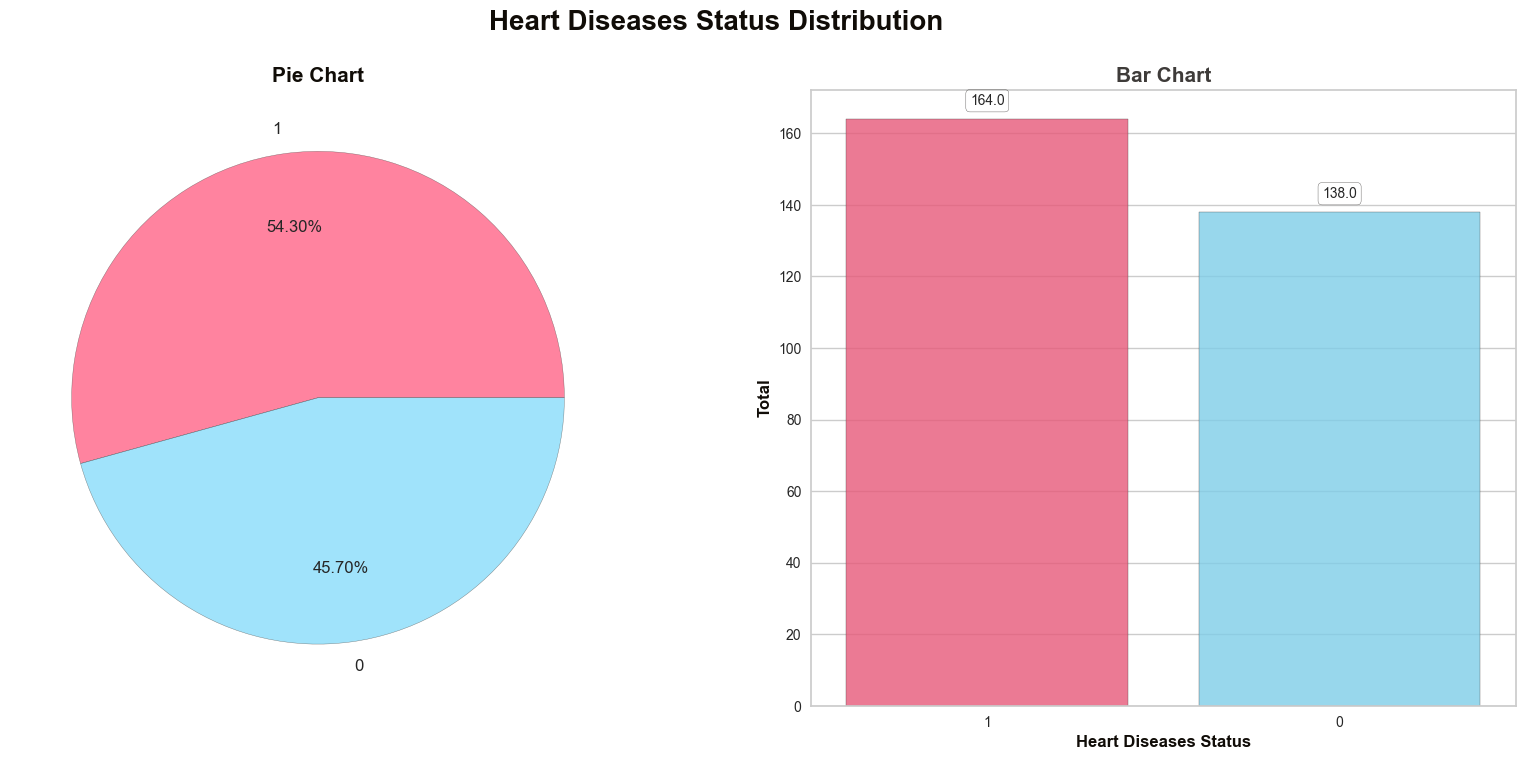

In [31]:
# Setting x_title, y_title, labels_var, ticks1, ticks2
x_title = "Heart Diseases Status"
y_title = "Total"
labels_var = ['1', '0']
ticks1 = np.array([0, 1])
ticks2 = ['0:No Heart Disease', '1:Heart Disease']

categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df_dtype_fixed, output_graph=False)

> 👉 The total number of patients that have heart diseases are higher than patients that have no heart diseases. This target variable is slightly imbalance.

### 5.1.1 | Sex (Gender)

In [32]:
# Setting Variable 
var = "sex"

# Check variable's order for labelling
print("Check variable's order for labelling: \n", df_dtype_fixed[var].value_counts().index)

Check variable's order for labelling: 
 Int64Index([1, 0], dtype='int64')


Bar Chart is not stacked


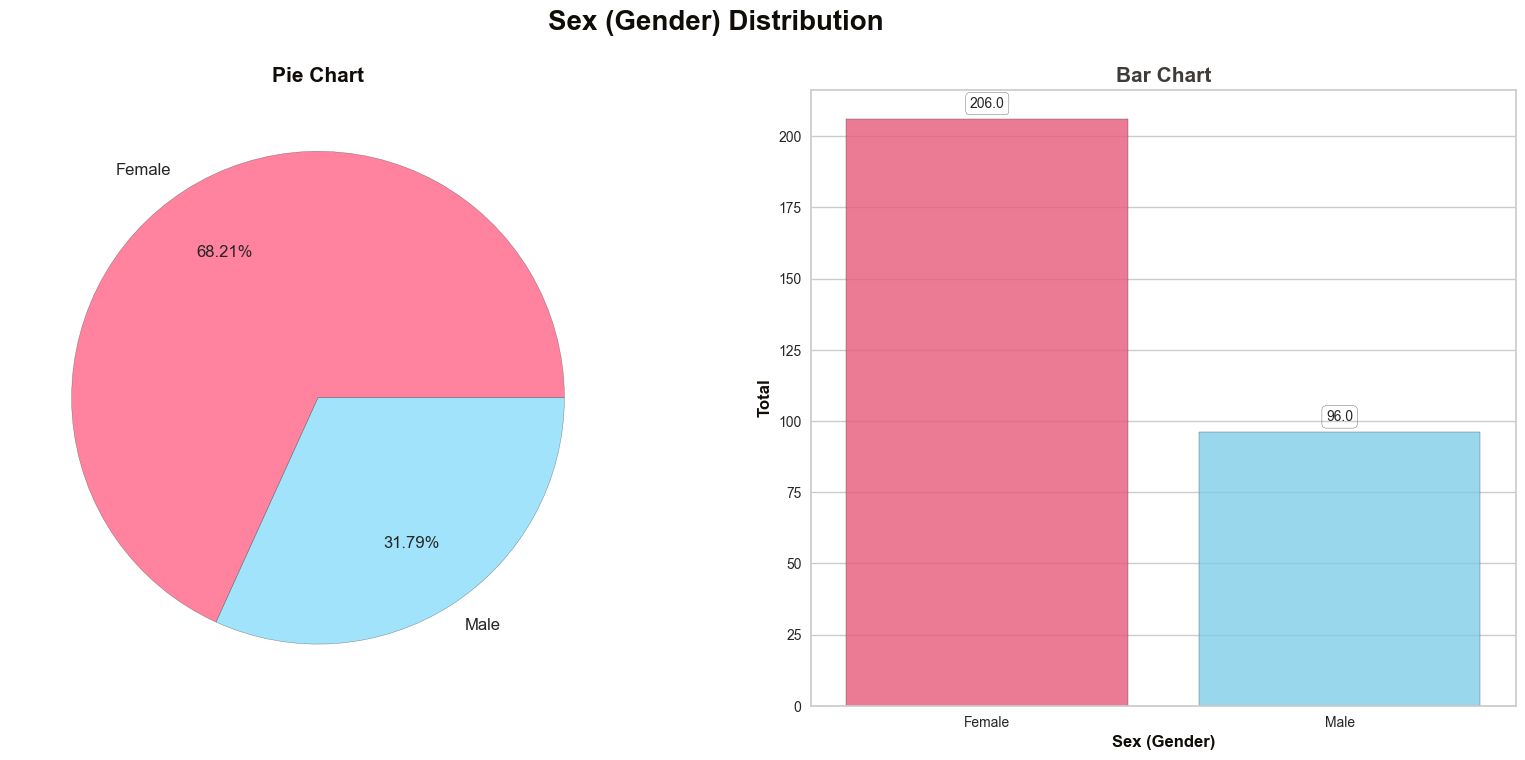

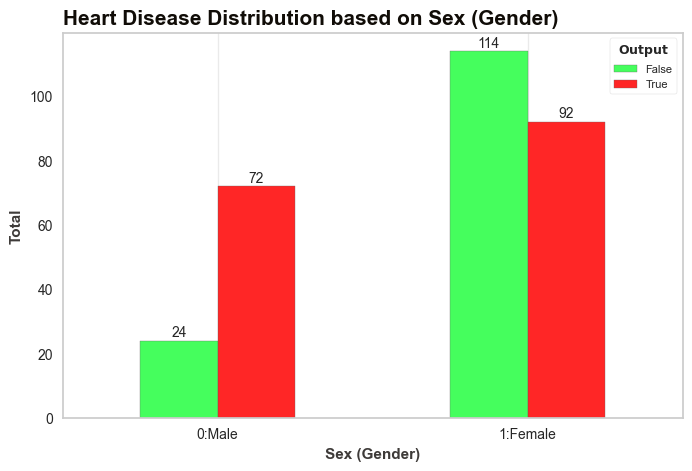

In [33]:
# Setting x_title, y_title, labels_var, ticks1, ticks2
x_title = "Sex (Gender)"
y_title = "Total"
labels_var = ["Female", "Male"]
ticks1 = np.array([0, 1])
ticks2 = ['0:Male', '1:Female']

categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df_dtype_fixed)

> 👉 The distribution of female patients are highest compared to male patients 

> 👉 Male tend to have heart diseases compared to Female.

### 5.1.2 | cp (Chest Pain Type)

In [34]:
# Setting Variable 
var = "cp"

# Check variable's order for labelling
print("Check variable's order for labelling: \n", df_dtype_fixed[var].value_counts().index)

Check variable's order for labelling: 
 Int64Index([0, 2, 1, 3], dtype='int64')


Bar Chart is not stacked


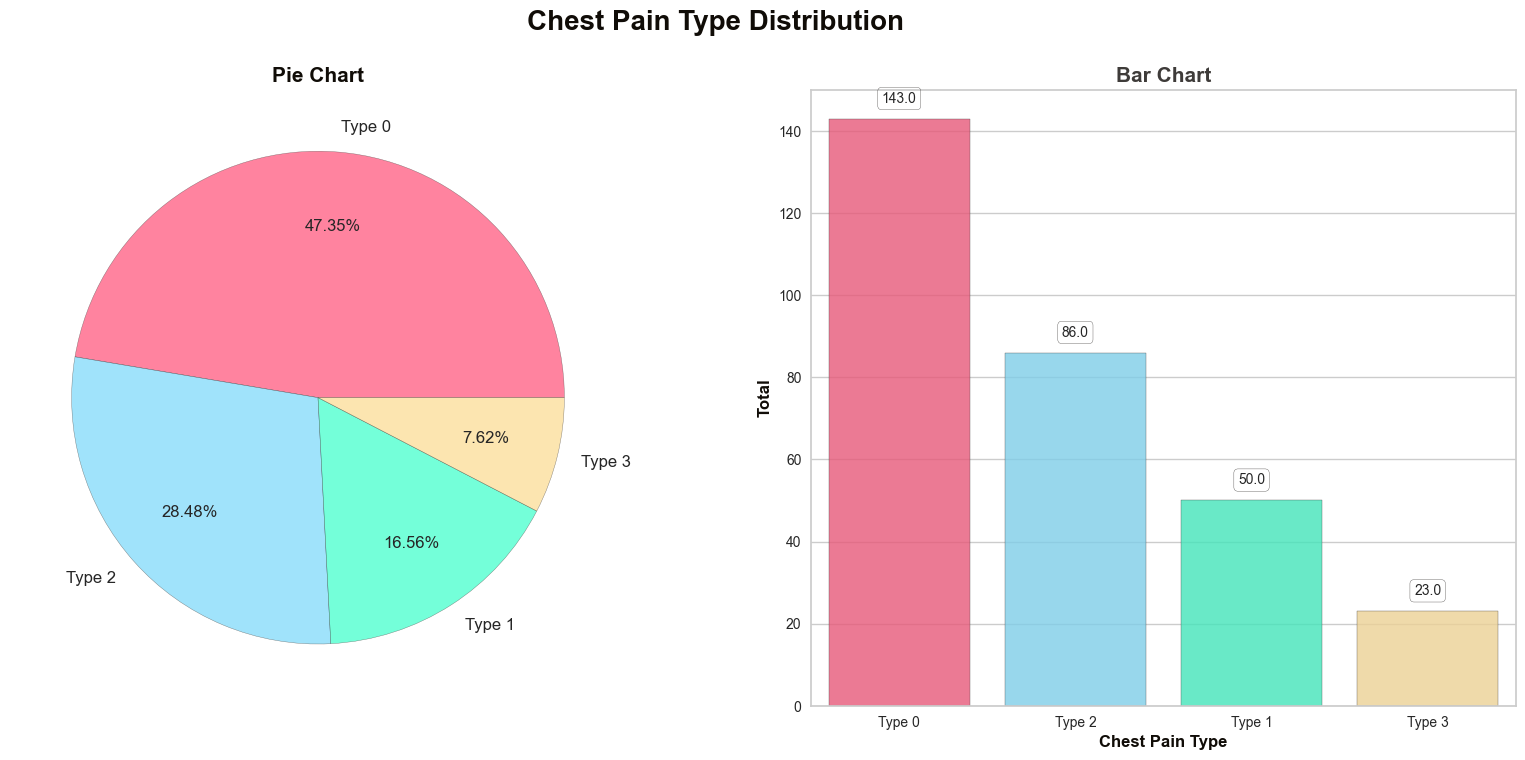

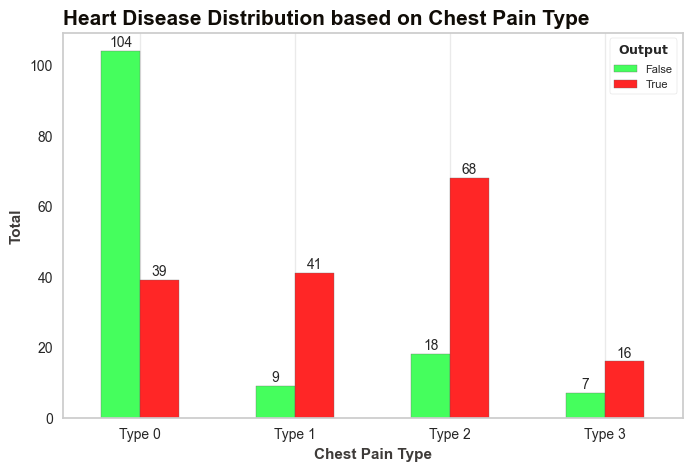

In [35]:
# Setting x_title, y_title, labels_var, ticks1, ticks2
x_title = "Chest Pain Type"
y_title = "Total"
labels_var = ['Type 0', 'Type 2', 'Type 1', 'Type 3']
ticks1 = np.array([0, 1, 2, 3])
ticks2 = ['Type 0', 'Type 1', 'Type 2', 'Type 3']

categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df_dtype_fixed)

> 👉 Patient with chest pain type 0(typical angina) have the highest number compared to other types of chest pain.

> 👉 Patients with chest pain type 1(atypical angina), 2(non-anginal pain) and 3(asymptomatic) tend to have heart diseases. 
>> However, patients who have chest pain type 0 tend not to have heart diseases.

### 5.1.3 | fbs (Fasting Blood Sugar)

In [36]:
# Setting Variable 
var = "fbs"

# Check variable's order for labelling
print("Check variable's order for labelling: \n", df_dtype_fixed[var].value_counts().index)

Check variable's order for labelling: 
 Int64Index([0, 1], dtype='int64')


Bar Chart is stacked


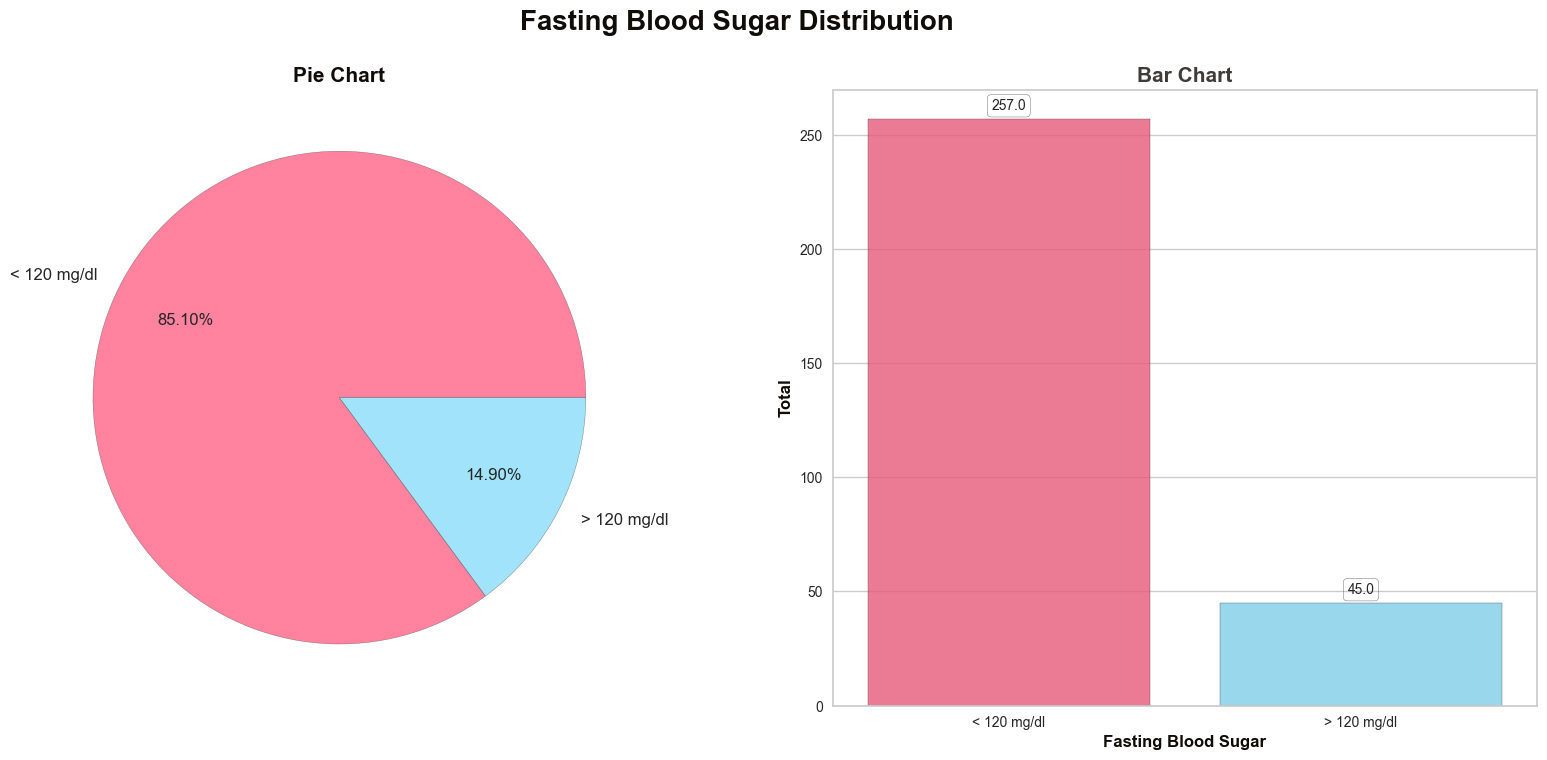

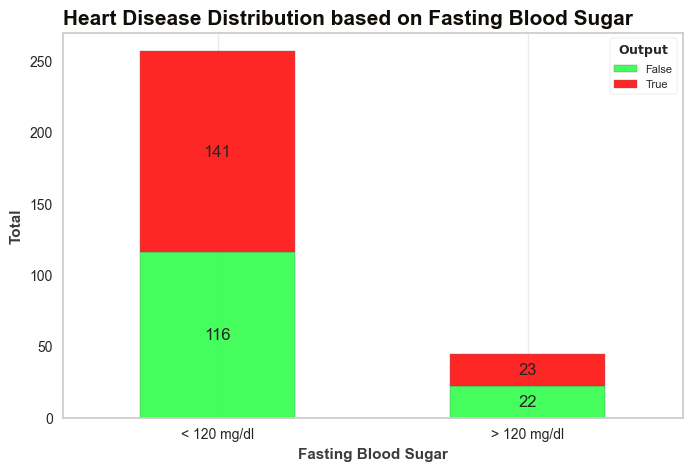

In [37]:
# Setting x_title, y_title, labels_var, ticks1, ticks2
x_title = "Fasting Blood Sugar"
y_title = "Total"
labels_var = ['< 120 mg/dl', '> 120 mg/dl']
ticks1 = np.array([0, 1])
ticks2 = ['< 120 mg/dl', '> 120 mg/dl']

categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df_dtype_fixed, stacked=True)

> 👉 It can be seen that the number of patients with fasting blood sugar less than 120 mg/dl have the highest numbers.

> 👉 Also, the distribution of heart diseases patients with low and high fasting blood sugar is equally distributed.

### 5.1.4 | restecg (Resting Electrocardiographic Results)

In [38]:
# Setting Variable 
var = "restecg"

# Check variable's order for labelling
print("Check variable's order for labelling: \n", df_dtype_fixed[var].value_counts().index)

Check variable's order for labelling: 
 Int64Index([1, 0, 2], dtype='int64')


Bar Chart is not stacked


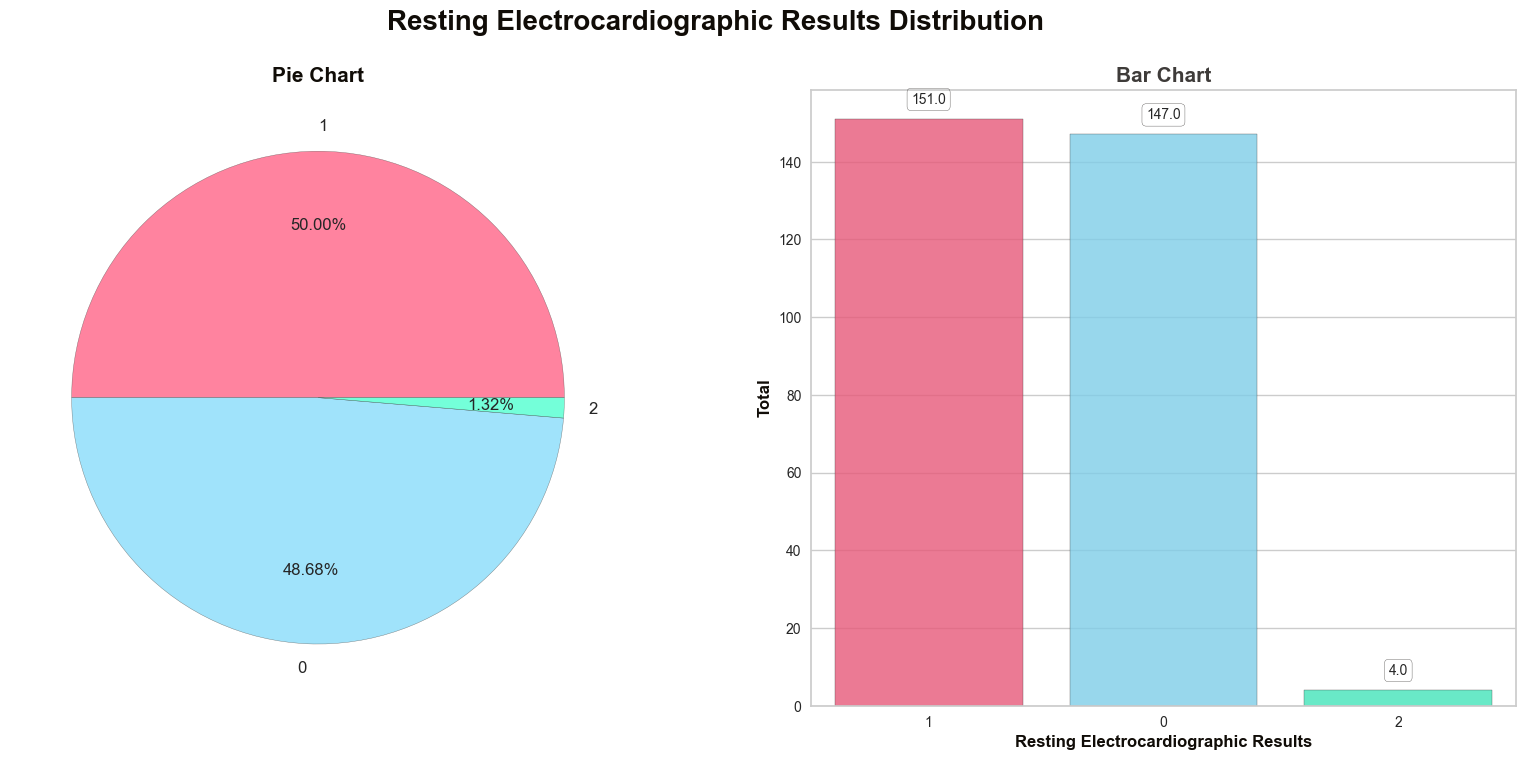

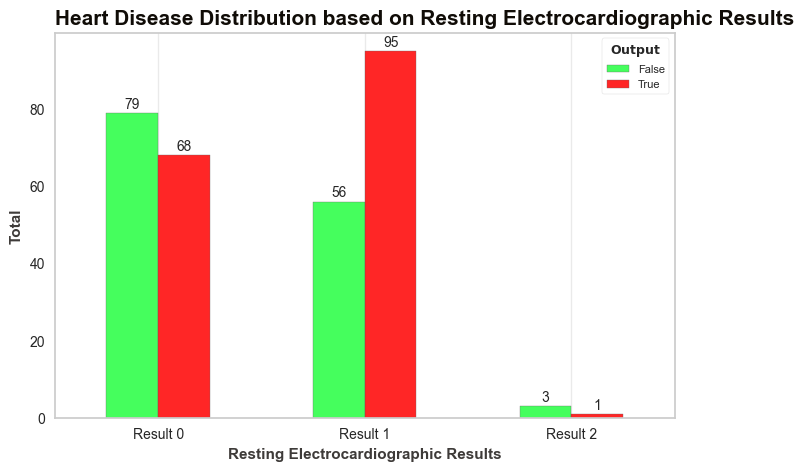

In [39]:
# Setting x_title, y_title, labels_var, ticks1, ticks2
x_title = "Resting Electrocardiographic Results"
y_title = "Total"
labels_var = ['1', '0', '2']
ticks1 = np.array([0, 1, 2])
ticks2 = ['Result 0', 'Result 1', 'Result 2']

categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df_dtype_fixed)

> 👉 Resting electrocardiographic with results 1(ST-T wave abnormality ~ T wave inversions and/or ST elevation or depression of 0.05mV) and 0(Normal) has a higher distribution than result 2(definite left ventricular hypertrophy).

> 👉 In addition, Resting electrocardiographic with result 1 has the highest distribution compared to the other results.

> 👉 patients with resting electrocardiographic's results 1 tend to have heart diseases.

### 5.1.5 | exng (Exercise Induced Angina)

In [40]:
# Setting Variable 
var = "exng"

# Check variable's order for labelling
print("Check variable's order for labelling: \n", df_dtype_fixed[var].value_counts().index)

Check variable's order for labelling: 
 Int64Index([0, 1], dtype='int64')


Bar Chart is not stacked


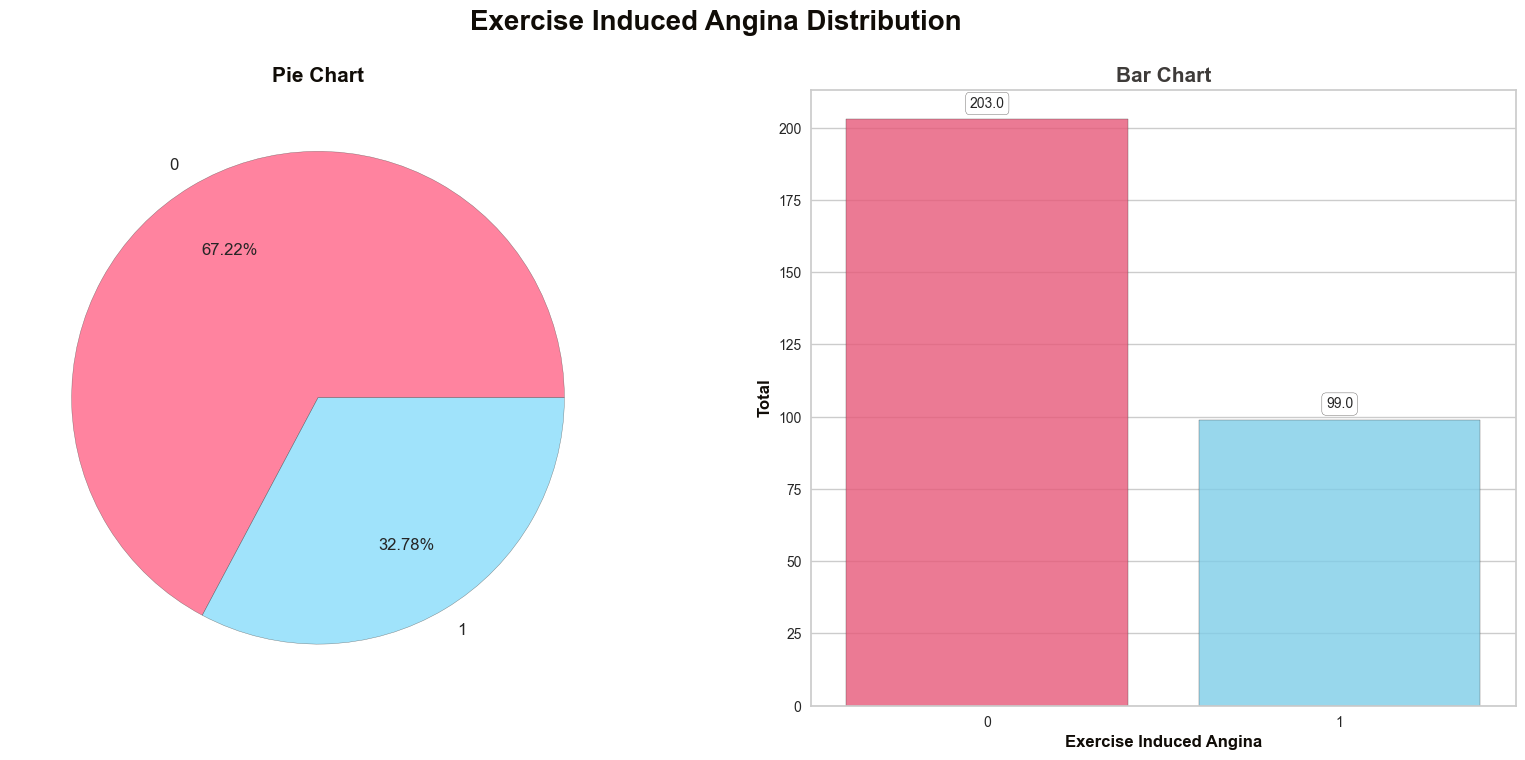

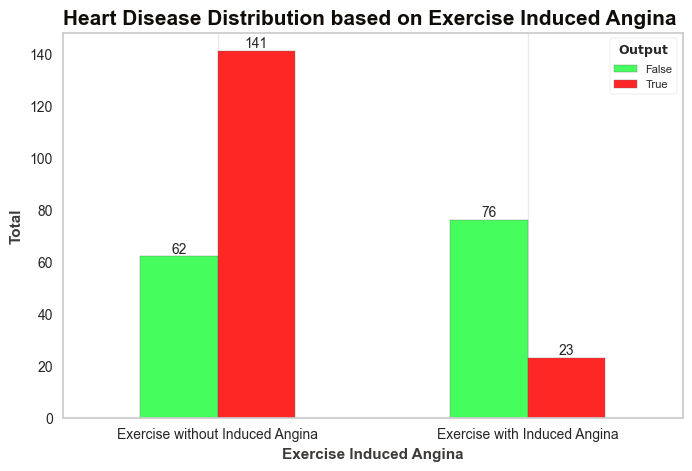

In [41]:
# Setting x_title, y_title, labels_var, ticks1, ticks2
x_title = "Exercise Induced Angina"
y_title = "Total"
labels_var = ['0', '1']
ticks1 = np.array([0, 1])
ticks2 = ['Exercise without Induced Angina', 'Exercise with Induced Angina']

categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df_dtype_fixed)

> 👉 Patients of exercise without induced angina are the highest compared to patients of exercise with induced angina.

> 👉 Patients of exercise without induced angina tend to have heart disease

### 5.1.6 | slp (Slope of the Peak Exercise)

In [42]:
# Setting Variable 
var = "slp"

# Check variable's order for labelling
print("Check variable's order for labelling: \n", df_dtype_fixed[var].value_counts().index)

Check variable's order for labelling: 
 Int64Index([2, 1, 0], dtype='int64')


Bar Chart is not stacked


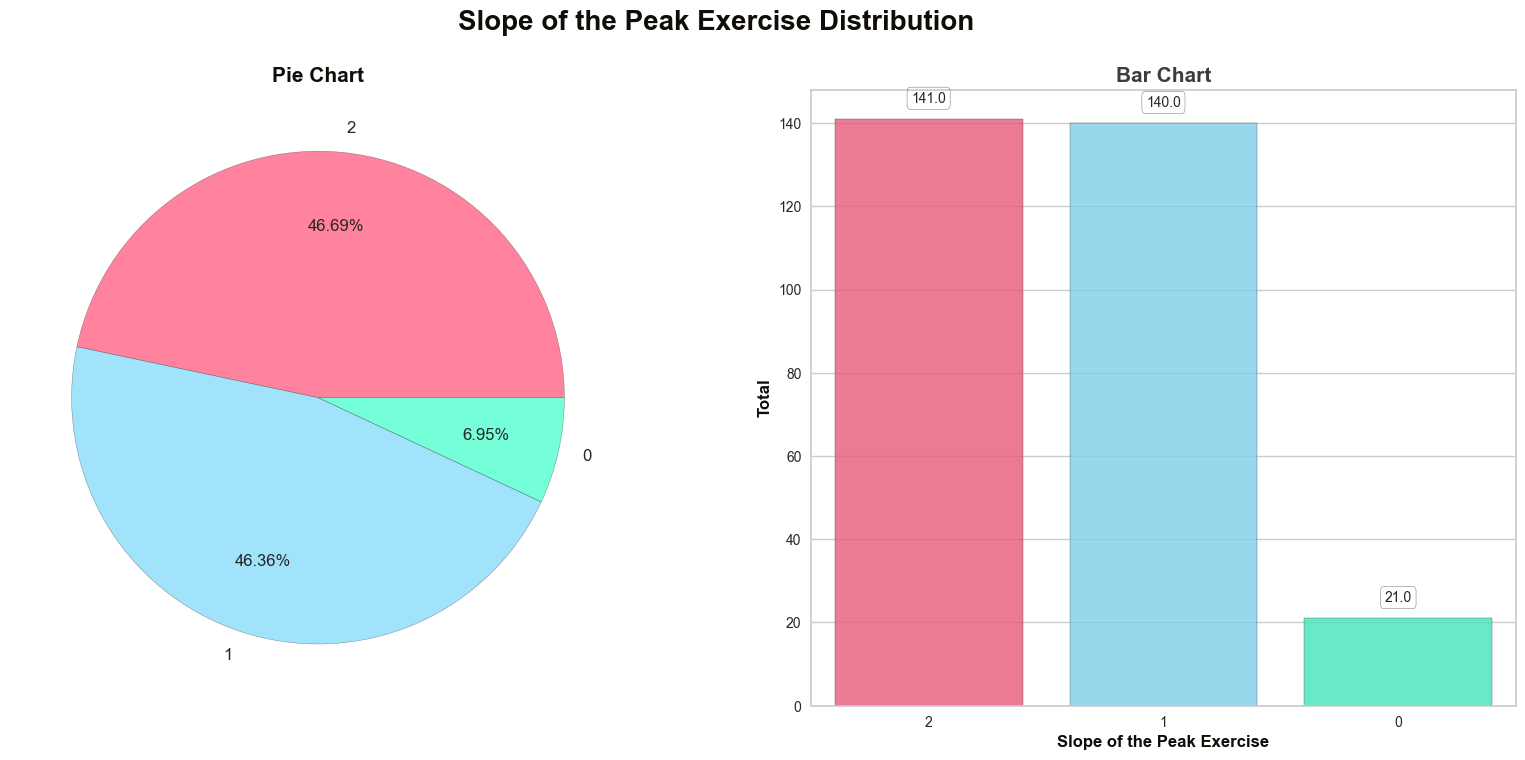

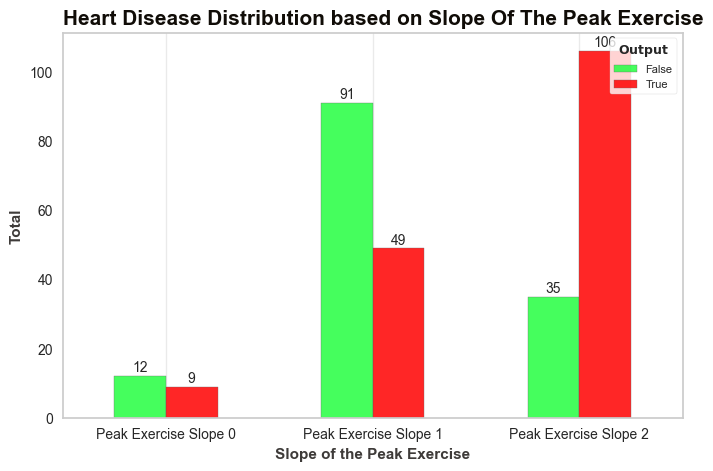

In [43]:
# Setting x_title, y_title, labels_var, ticks1, ticks2
x_title = "Slope of the Peak Exercise"
y_title = "Total"
labels_var = ['2', '1', '0']
ticks1 = np.array([0, 1, 2])
ticks2 = ['Peak Exercise Slope 0', 'Peak Exercise Slope 1', 'Peak Exercise Slope 2']

categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df_dtype_fixed)

> 👉 The distribution of slope 1 and 2 are almost the same.

> 👉 Moreover, slope 2 has the highest distribution compared to others.

> 👉 Patients with peak exercise slope 2 tend to have heart disease.

### 5.1.7 | caa (Number of Major Vessels)

In [44]:
# Setting Variable 
var = "caa"

# Check variable's order for labelling
print("Check variable's order for labelling: \n", df_dtype_fixed[var].value_counts().index)

Check variable's order for labelling: 
 Int64Index([0, 1, 2, 3, 4], dtype='int64')


Hi Bar Chart is not stacked and horizontal in position


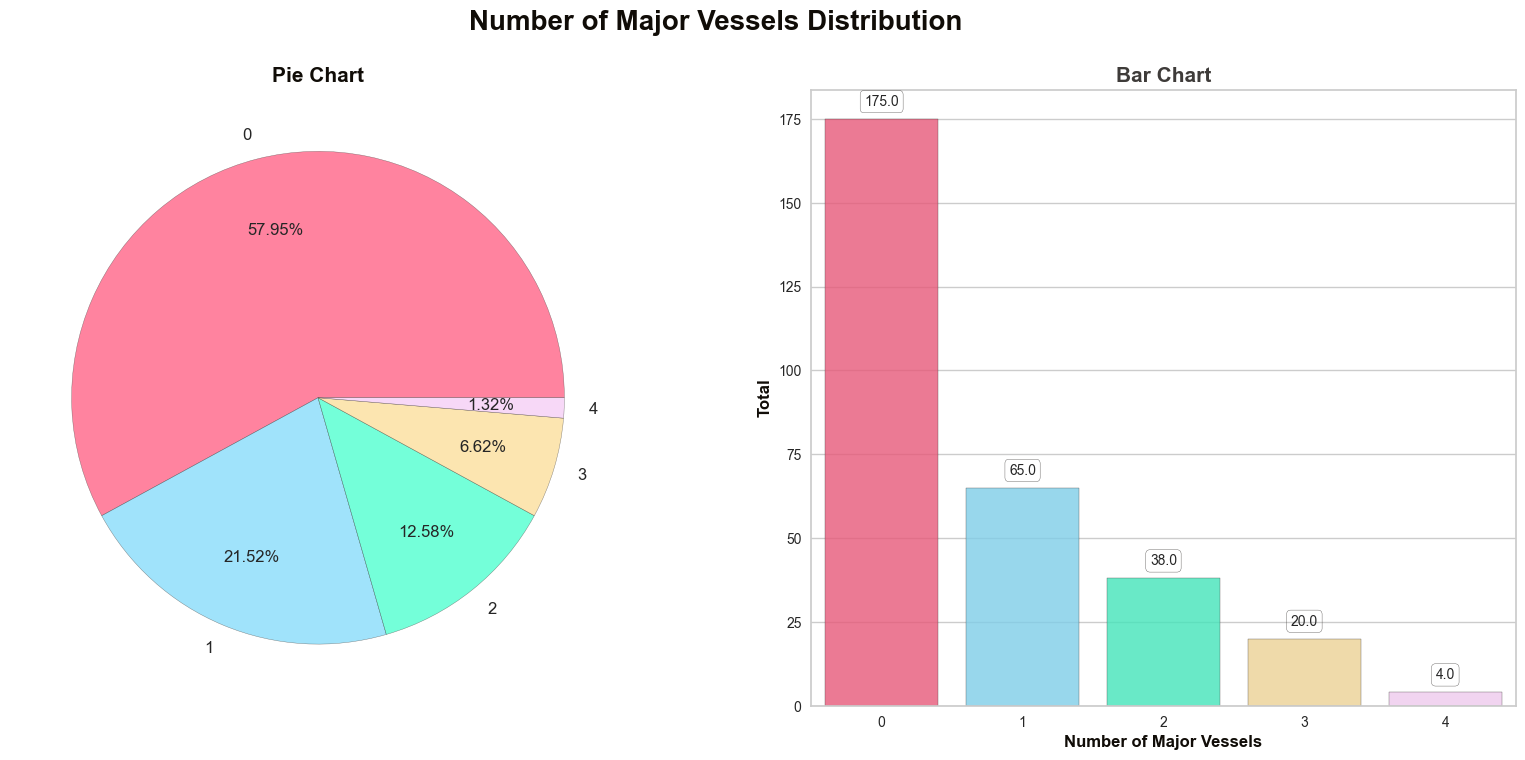

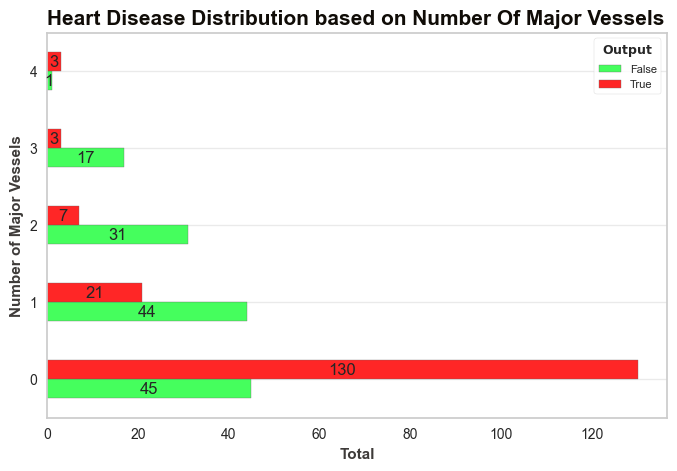

In [45]:
# Setting x_title, y_title, labels_var, ticks1, ticks2
x_title = "Number of Major Vessels"
y_title = "Total"
labels_var = ['0', '1', '2', '3', '4']
ticks1 = np.array([0, 1, 2, 3, 4])
ticks2 = ['Major Vessels 0', 'Major Vessels 1', 'Major Vessels 2', 'Major Vessels 3', 'Major Vessels 4']

categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df_dtype_fixed, kinds='barh')

> 👉 People with 0 major vessel has the highest distribution compared to others.

> 👉 Patients with 0 and 4 major vessels tend to have heart diseases. 
>> However, patients who have a number of vessels 1 to 3 tend not to have heart diseases.

### 5.1.8 | thall (Thalium stress test results: 0=normal, 1=fixed defect, 2 = reversable defect)

In [46]:
# Setting Variable 
var = "thall"

# Check variable's order for labelling
print("Check variable's order for labelling: \n", df_dtype_fixed[var].value_counts().index)

Check variable's order for labelling: 
 Int64Index([2, 3, 1, 0], dtype='int64')


Bar Chart is not stacked


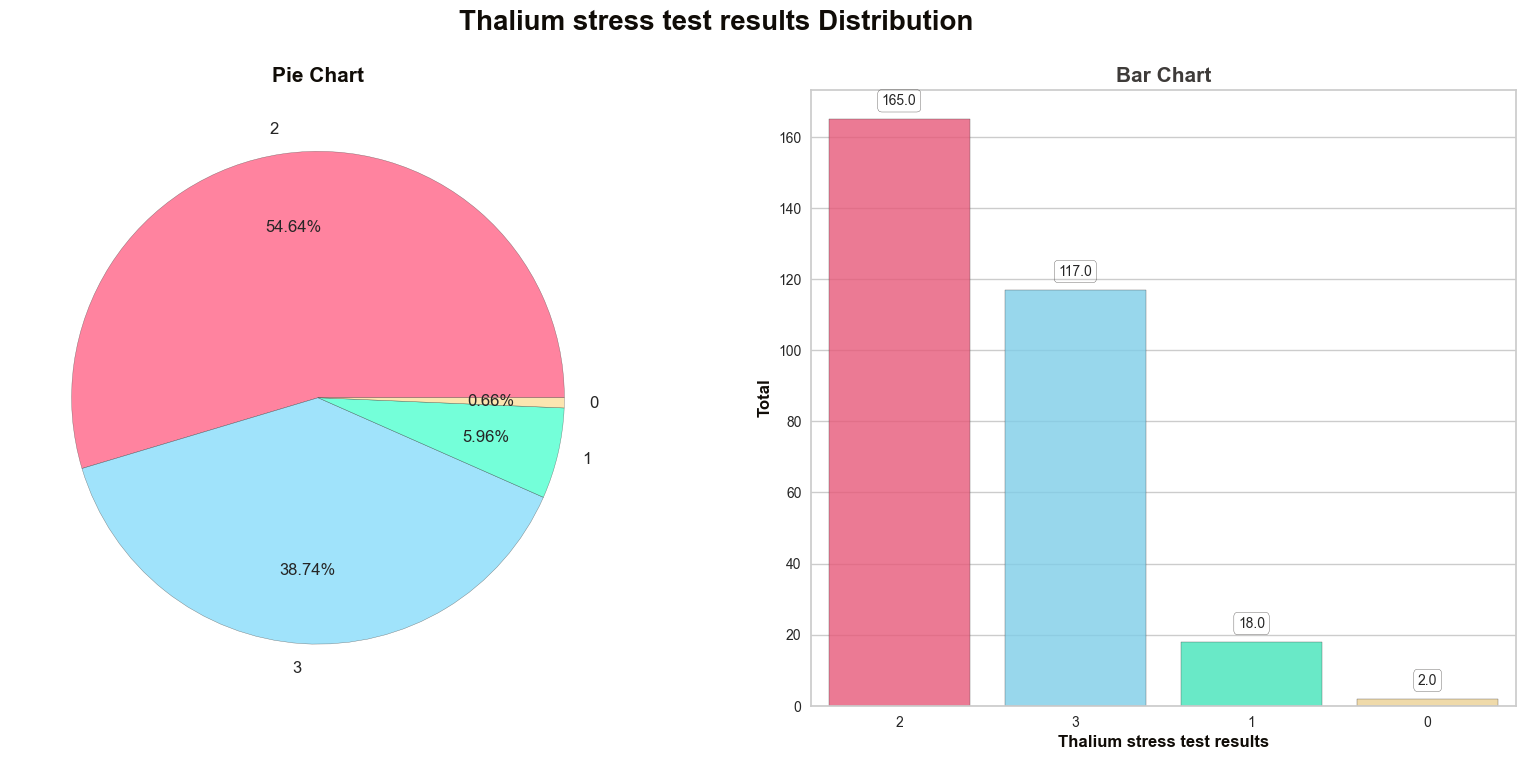

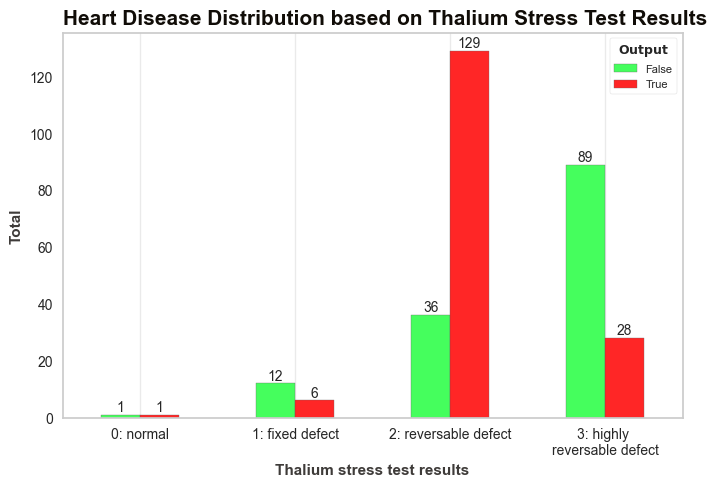

In [47]:
# Setting x_title, y_title, Labels, ticks, Colors, Suptitle
# colors = color_mix[2:4]
x_title = "Number of 'thall'"
y_title = "Total"
labels = ['2', '3', '1', '0']
ticks = [0, 1, 2, 3]
paltcolor = [red_grad[3], green_grad[3], blue_grad[3], gold_grad[3]]

# Setting x_title, y_title, labels_var, ticks1, ticks2
x_title = "Thalium stress test results"
y_title = "Total"
labels_var = ['2', '3', '1', '0']
ticks1 = np.array([0, 1, 2, 3])
ticks2 = ['0: normal', '1: fixed defect', '2: reversable defect', '3: highly \nreversable defect']

categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df_dtype_fixed)

> 👉 Patients with 2 "thal" has the highest distribution compared to others.

> 👉 Patients with 2 "thal" tend to have heart disease.

In [48]:
### Stopper for testing ###
# XXX
### Stopper for testing ###

### 5.2 | Numerical Variable 🔢
* 👉 The second variable that will be explored is numerical variable

### 5.2.1 | Descriptive Statistics 📏

In [49]:
df_dtype_fixed.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0   2.3000    0   
1   37    1   2     130   250    0        1       187     0   3.5000    0   
2   41    0   1     130   204    0        0       172     0   1.4000    2   
3   56    1   1     120   236    0        1       178     0   0.8000    2   
4   57    0   0     120   354    0        1       163     1   0.6000    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [50]:
# Descriptive Statistics
    # (**) 
        # - are used to unpack a dictionary. 
        # - is used to pass multiple keyword arguments to the set_properties() method of a pandas DataFrame's style object
df_dtype_fixed.describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

> 👉 From the descriptive statistics, it can be seen that age, resting blood pressure, cholesterol, and thalach are more variation.

>* 📌 Low standard deviation means data are clustered around the mean (lack of variation), and high standard deviation indicates data are more spread out (more variation).

### 5.2.2 | Continuous Column Distribution 📈 <br>
👉 This section will show the distribution of numerical variables in histograms, boxplots, Q-Q Plots, skewness and kurtosis values.

##### Skewness
> 👉 measures the degree of distortion of a normal distribution.

> 👉 gives direction of outliers.
>> 📌 If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

##### Kurtosis
> 👉 measures of outliers(extreme values) in the distribution.

> 👉 Mesokurtic(outliers are similar to that of normal distribution), Leptokuritc (high number of outliers) & Platikurtic(lack of outliers).
>> 📌 Kurtosis values used to show tailedness of a column. The value of normal distribution (mesokurtotic) should be equal to 3. If kurtosis value is more than 3, it is called leptokurtic. Meanwhile, if kurtosis value is less than 3, then it is called platikurtic.

In [51]:
df_cut_outlier = df_dtype_fixed.copy()

### 5.2.2.1 | age (Patient Age)

In [52]:
# --- Variable, Color & Plot Size ---
var = 'age'
x_title = "Age Distribution"
y_title = "Total"
color = color_mix_light[0]

.: age Column Skewness & Kurtosis :.
******************************
Skewness:-0.204
Kurtosis:-0.528




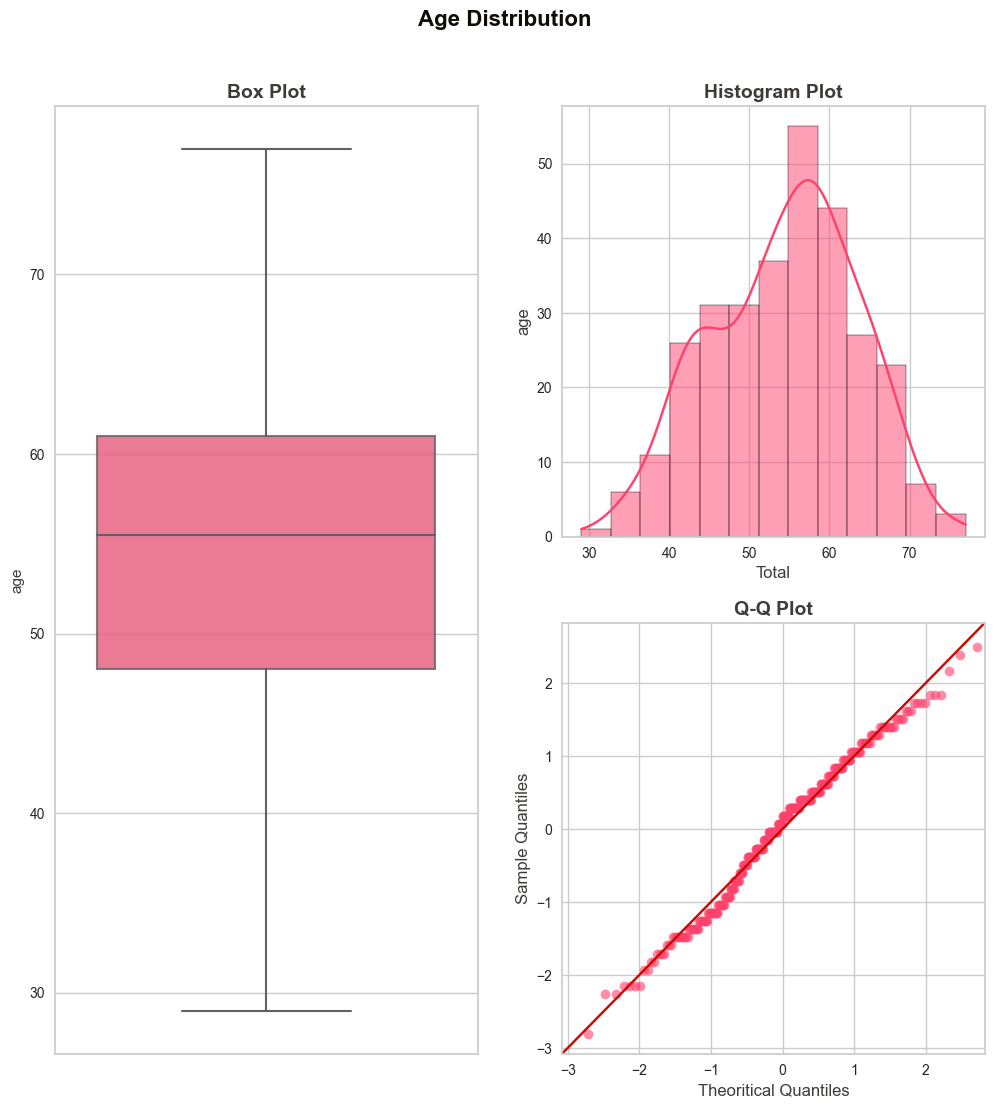

In [53]:
# numerical_countplot(var, x_title, y_title, df_dtype_fixed, color)
numerical_countplot(var, x_title, y_title, df_cut_outlier, color)

> 👉 From the histogram and boxplot, it can be seen that this column is normally distributed. This also proven by skewness value (-0.204) of this column.

> 👉 In this column, the kurtosis value is -0.528, which indicates that the column is platikurtic.

> 👉 From the Q-Q plot, the data values tend to closely follow the 45-degree, which means the data is likely normally distributed (as stated previously).

>>> 👉 Perform outlier handling

Quartile 25: 48.0 | Quartile 75: 61.0
iqr: 13.0
Cut Off: 19.5
Resting Blood Pressure Lower: 28.5
Resting Blood Pressure Upper: 80.5
Feature Resting Blood Pressure Outliers: 0
Resting Blood Pressure outliers:[]
.: age Column Skewness & Kurtosis :.
******************************
Skewness:-0.204
Kurtosis:-0.528




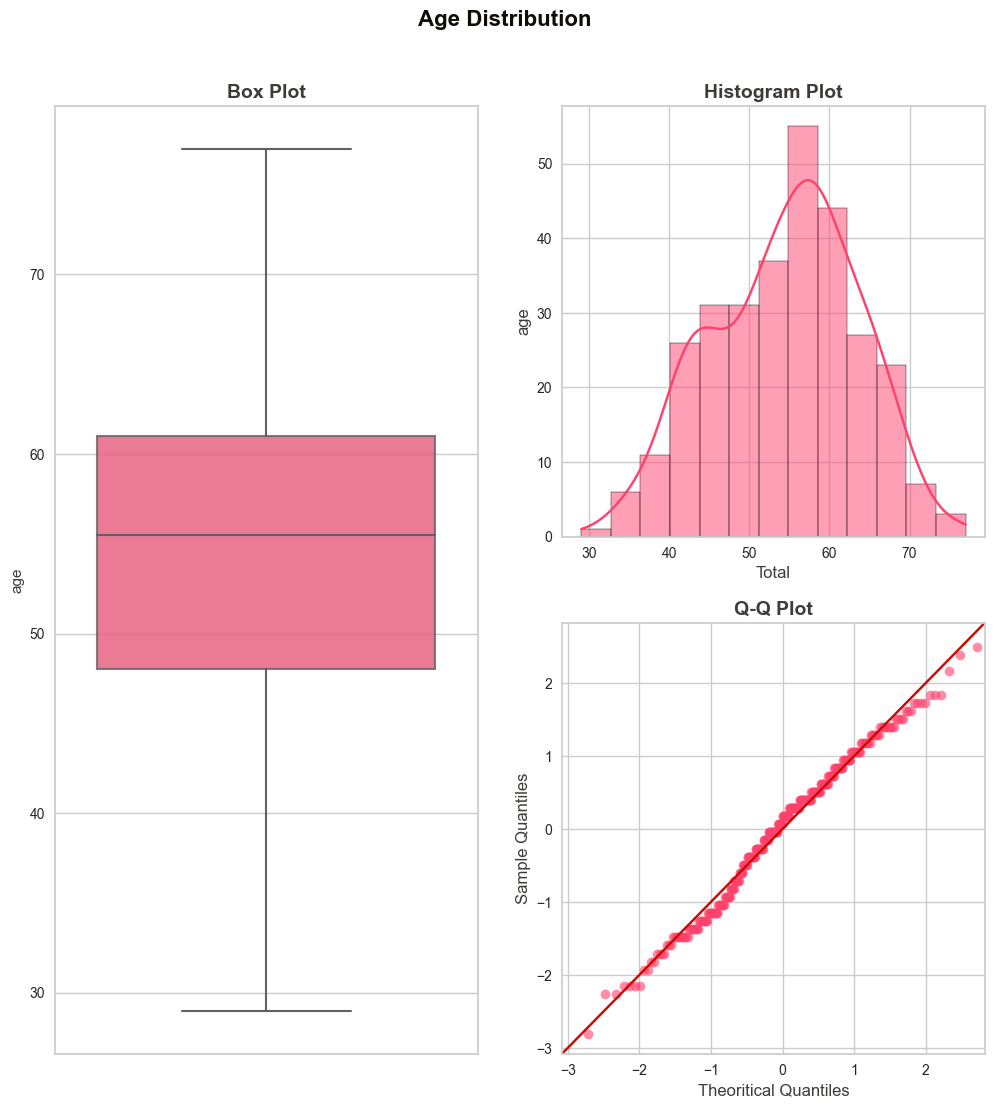

In [54]:
df_cut_outlier = outlier_trim(var, df_cut_outlier)
numerical_countplot(var, x_title, y_title, df_cut_outlier, color)

### 5.2.2.2 | trtbps (Resting Blood Pressure in mm Hg)

In [55]:
# --- Variable, Color & Plot Size ---
var = 'trtbps'
x_title = "Resting Blood Pressure in mm Hg Distribution"
y_title = "Total"
color = color_mix_light[1]

.: trtbps Column Skewness & Kurtosis :.
******************************
Skewness:0.717
Kurtosis:0.923




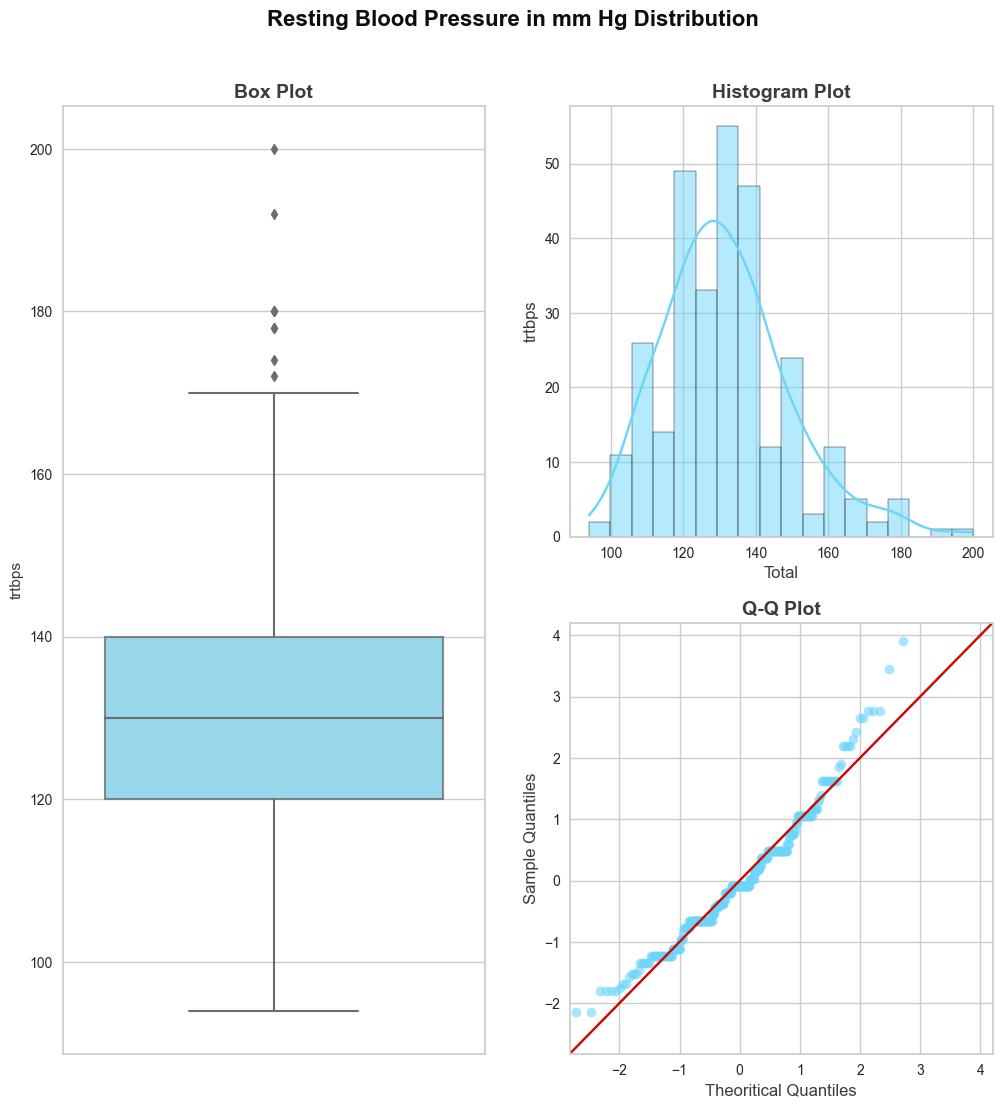

In [56]:
# numerical_countplot(var, x_title, y_title, df_dtype_fixed, color)
numerical_countplot(var, x_title, y_title, df_cut_outlier, color)

> 👉 From the histogram, it can be seen that this column is moderatly right skewed. This also proven by skewness value (0.717) of this column.

> 👉 There are some outliers detected at the upper part of boxplot.

> 👉 At the upper part of Q-Q plot, the data values tend to move away from 45-degree (there is a gap at upper part of Q-Q plot with 45-degree line), which means the data is likely moderatly right skewed (as stated previously).

> 👉 In this column, the kurtosis value is 0.923, which indicates that the column is platikurtic.

>>> 👉 Perform outlier handling

Quartile 25: 120.0 | Quartile 75: 140.0
iqr: 20.0
Cut Off: 30.0
Resting Blood Pressure Lower: 90.0
Resting Blood Pressure Upper: 170.0
Feature Resting Blood Pressure Outliers: 9
Resting Blood Pressure outliers:[172, 178, 180, 180, 200, 174, 192, 178, 180]
.: trtbps Column Skewness & Kurtosis :.
******************************
Skewness:0.244
Kurtosis:-0.234




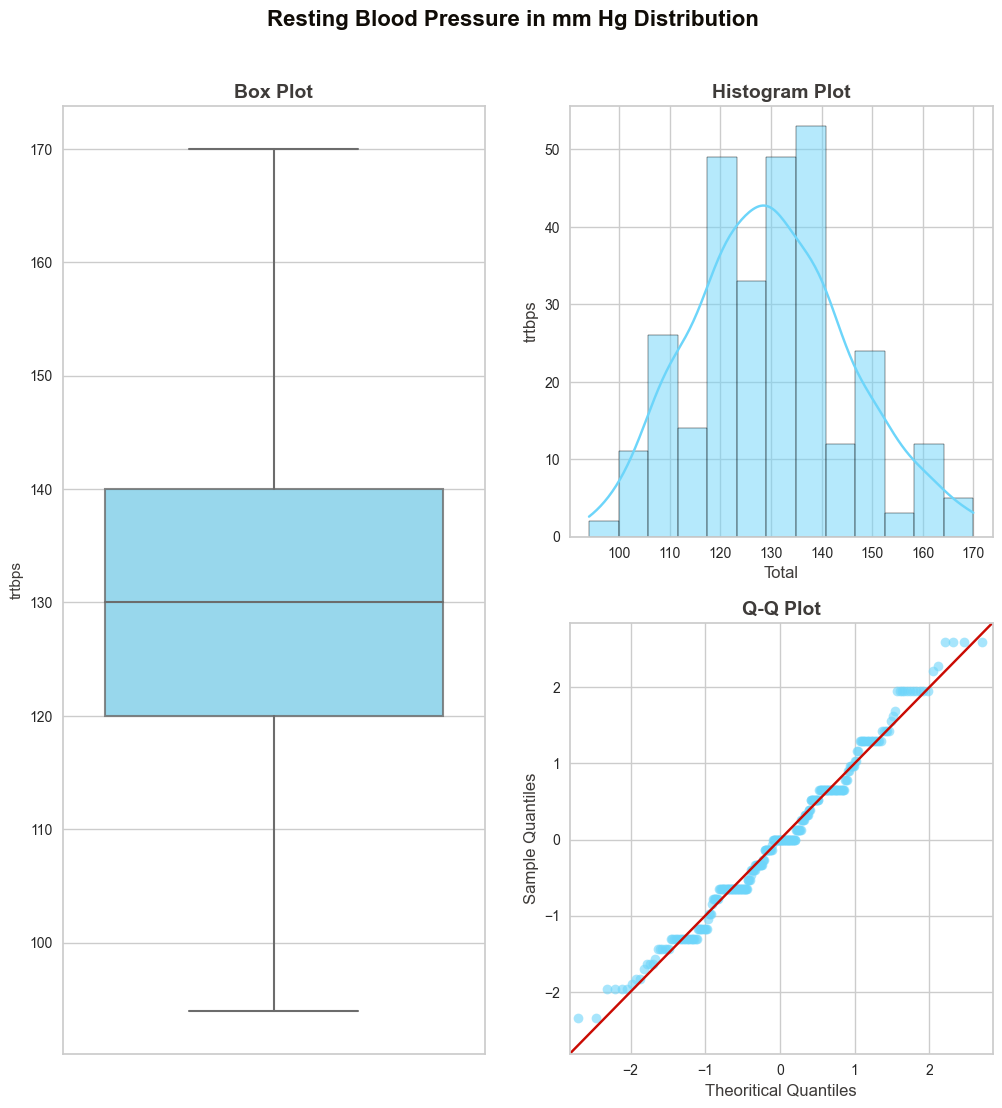

In [57]:
df_cut_outlier = outlier_trim(var, df_cut_outlier)
numerical_countplot(var, x_title, y_title, df_cut_outlier, color)

### 5.2.2.3 | chol (Serum Cholestoral in mg/dl)

In [58]:
# --- Variable, Color & Plot Size ---
var = 'chol'
x_title = "Resting Blood Pressure in mm Hg Distribution"
y_title = "Total"
color = color_mix_light[2]

.: chol Column Skewness & Kurtosis :.
******************************
Skewness:1.192
Kurtosis:4.720




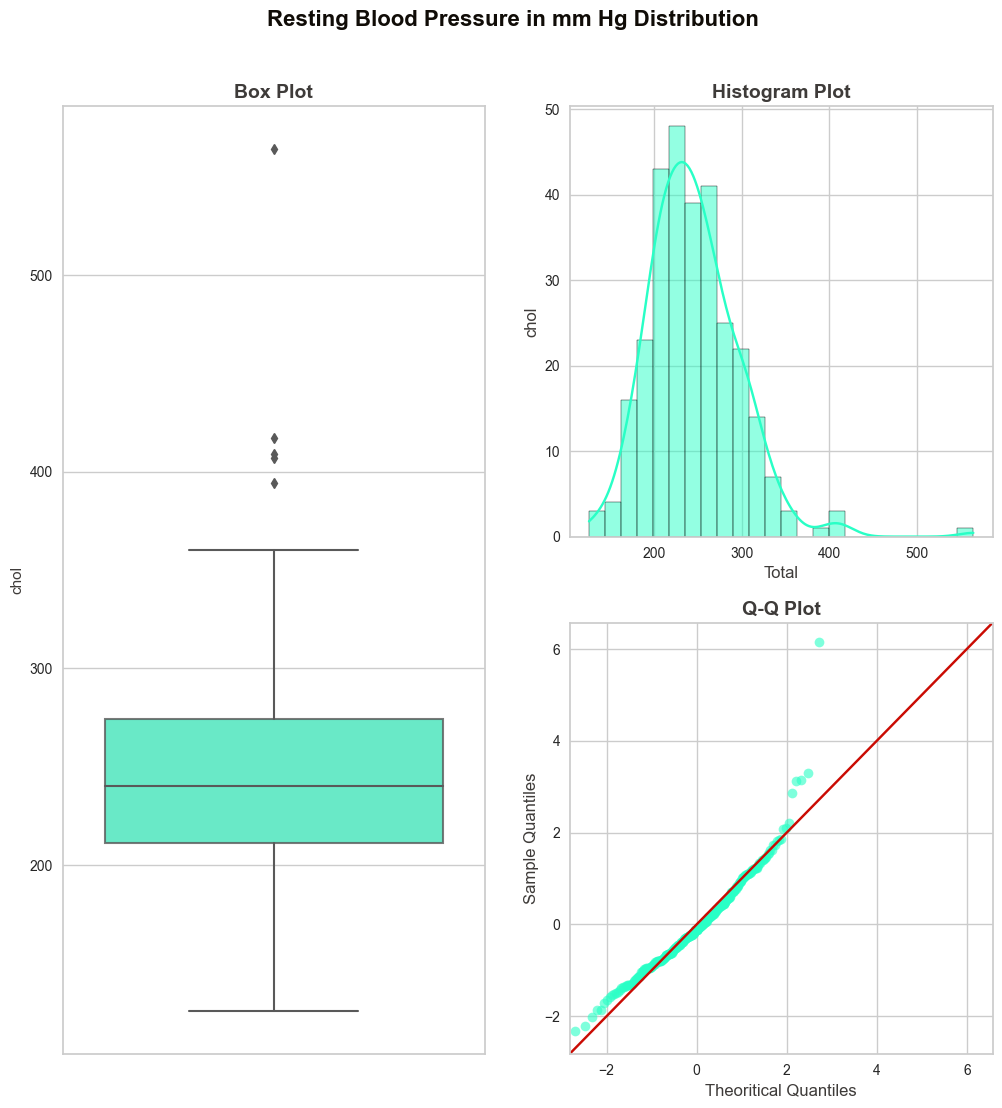

In [59]:
# numerical_countplot(var, x_title, y_title, df_dtype_fixed, color)
numerical_countplot(var, x_title, y_title, df_cut_outlier, color)

> 👉 From the histogram, it can be seen that this column is highly right skewed. This also proven by skewness value (1.192) of this column.

> 👉 There are some outliers detected at the upper part of boxplot.

> 👉 At the upper part of Q-Q plot, there is a gap at upper part of Q-Q plot with 45-degree line, which means the data is likely highly right skewed (as stated previously).

> 👉 In this column, the kurtosis value is 4.720, which indicates that the column is leptokurtic.

>>> 👉 Perform outlier handling

Quartile 25: 211.0 | Quartile 75: 274.0
iqr: 63.0
Cut Off: 94.5
Resting Blood Pressure Lower: 116.5
Resting Blood Pressure Upper: 368.5
Feature Resting Blood Pressure Outliers: 5
Resting Blood Pressure outliers:[417, 564, 394, 407, 409]
.: chol Column Skewness & Kurtosis :.
******************************
Skewness:0.196
Kurtosis:-0.292




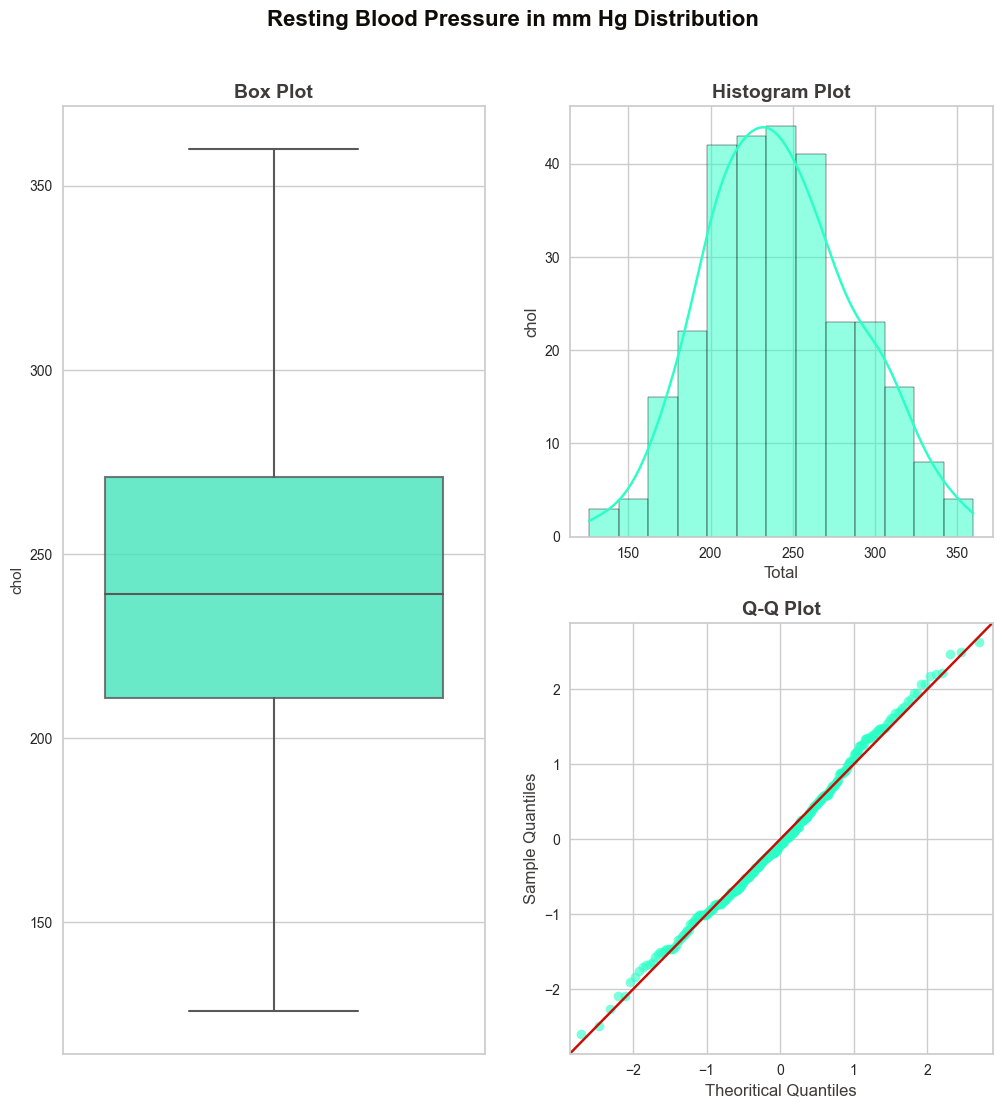

In [60]:
df_cut_outlier = outlier_trim(var, df_cut_outlier)
numerical_countplot(var, x_title, y_title, df_cut_outlier, color)

### 5.2.2.4 | thalachh (Maximum Heart Rate)

In [61]:
# --- Variable, Color & Plot Size ---
var = 'thalachh'
x_title = "Maximum Heart Rate Distribution"
y_title = "Total"
color = color_mix_light[3]

.: thalachh Column Skewness & Kurtosis :.
******************************
Skewness:-0.537
Kurtosis:-0.130




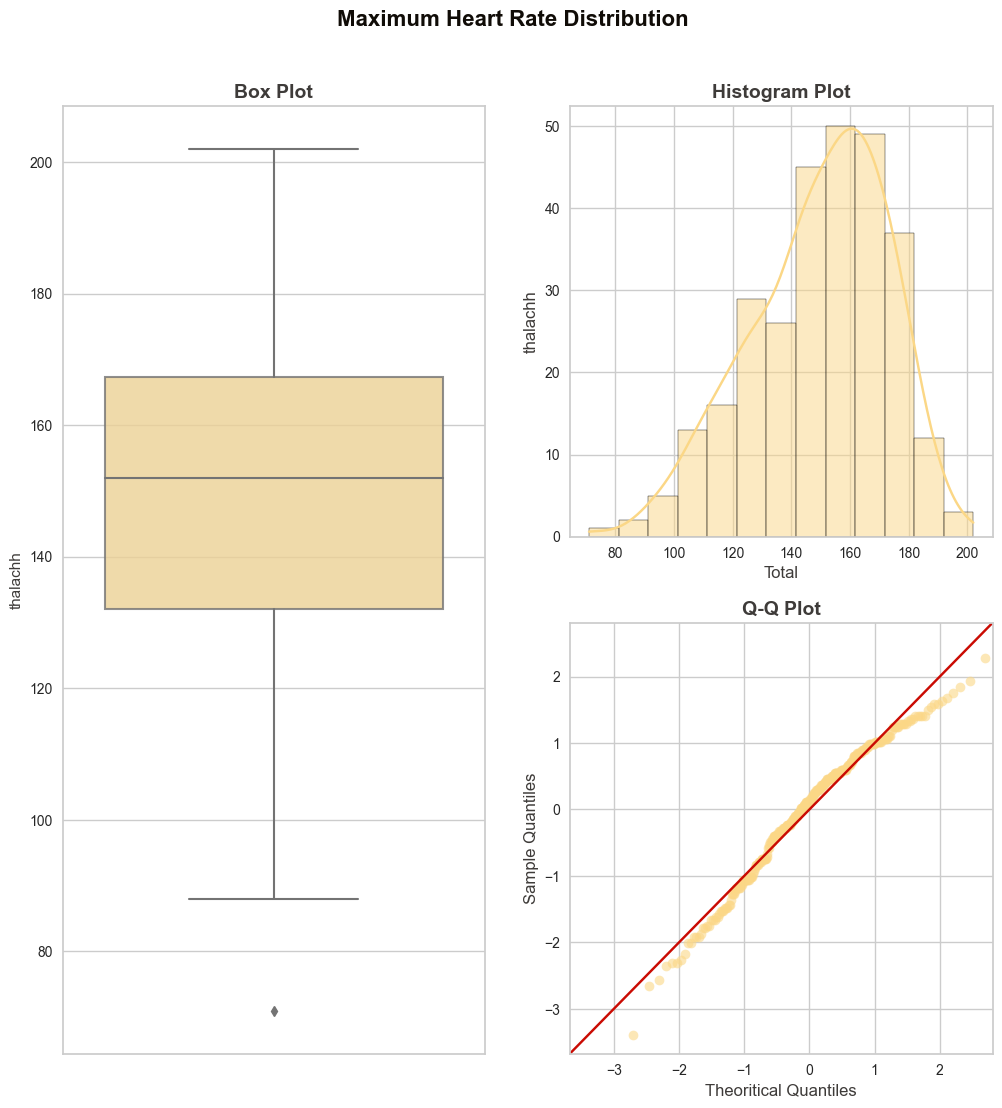

In [62]:
# numerical_countplot(var, x_title, y_title, df_dtype_fixed, color)
numerical_countplot(var, x_title, y_title, df_cut_outlier, color)

> 👉 From the histogram, it can be seen that this column is moderatly left skewed. This also proven by skewness value (-0.537) of this column.

> 👉 There is an outlier detected at the bottom part of boxplot.

> 👉 At the upper part of Q-Q plot, there is a gap at bottom part of Q-Q plot with 45-degree line, which means the data is likely moderatly left skewed (as stated previously).

> 👉 In this column, the kurtosis value is -0.130, which indicates that the column is platikurtic

>>> 👉 Perform outlier handling

Quartile 25: 132.0 | Quartile 75: 167.25
iqr: 35.25
Cut Off: 52.875
Resting Blood Pressure Lower: 79.125
Resting Blood Pressure Upper: 220.125
Feature Resting Blood Pressure Outliers: 1
Resting Blood Pressure outliers:[71]
.: thalachh Column Skewness & Kurtosis :.
******************************
Skewness:-0.462
Kurtosis:-0.378




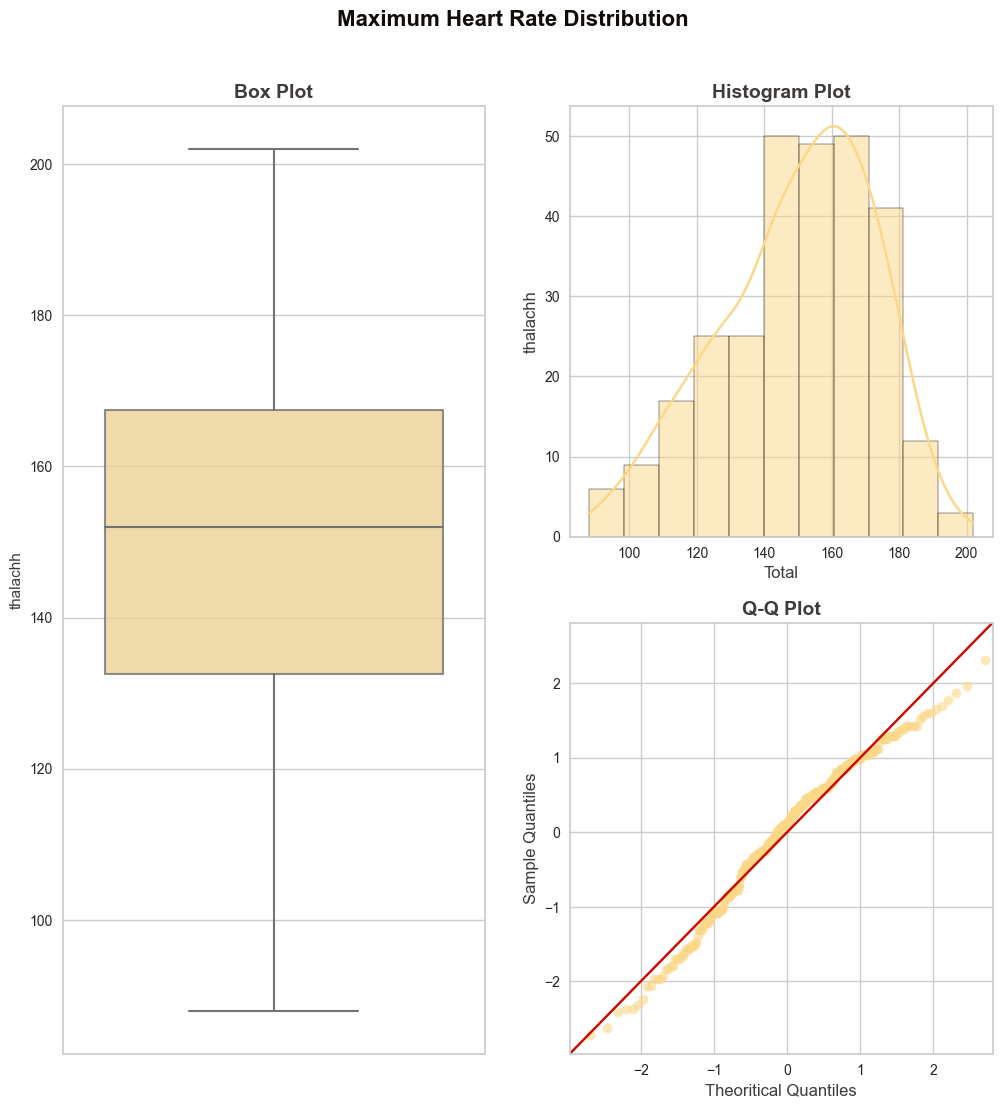

In [63]:
df_cut_outlier = outlier_trim(var, df_cut_outlier)
numerical_countplot(var, x_title, y_title, df_cut_outlier, color)

### 5.2.2.5 | oldpeak (ST depression induced by exercise relative to rest)

In [64]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'
x_title = "ST depression induced by exercise relative to rest"
y_title = "Total"
color = color_mix_light[4]

.: oldpeak Column Skewness & Kurtosis :.
******************************
Skewness:1.295
Kurtosis:1.829




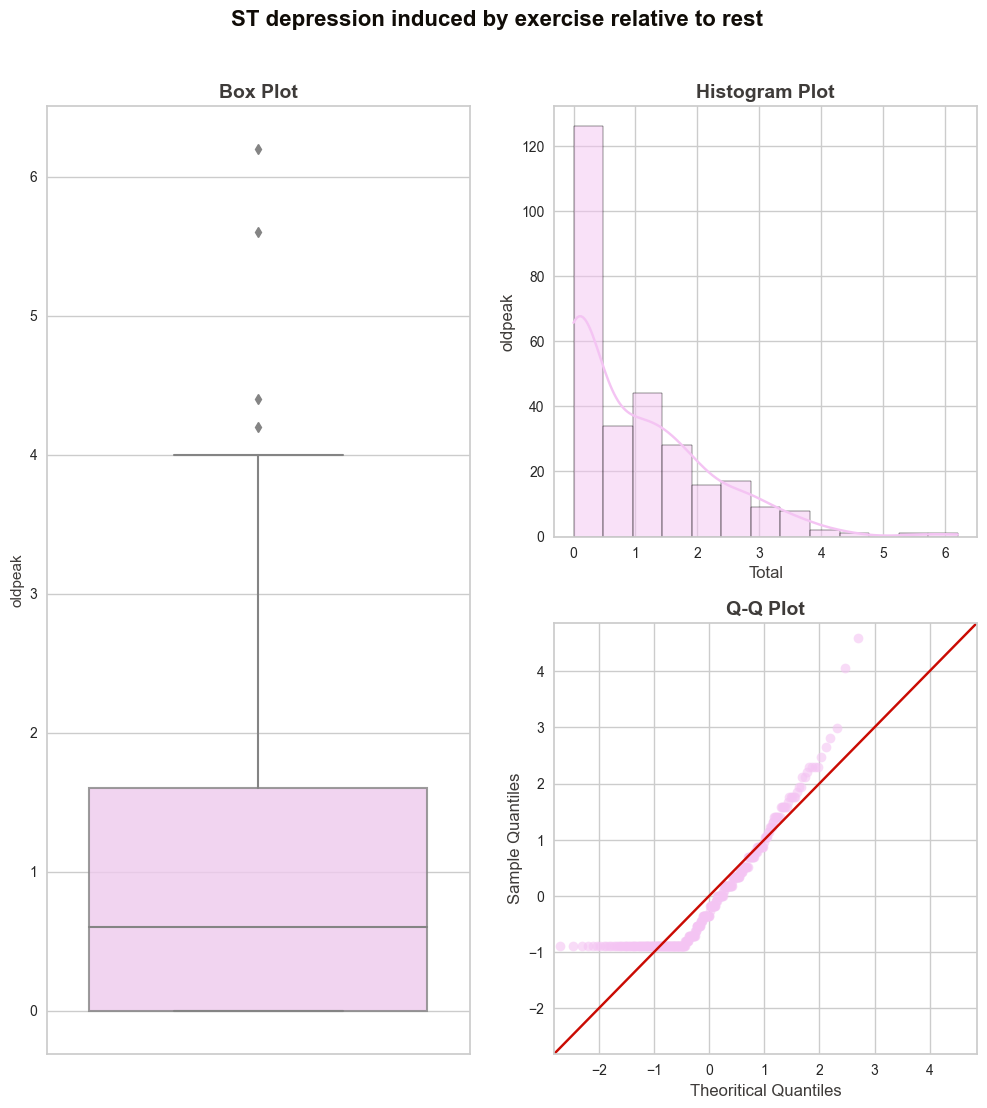

In [65]:
# numerical_countplot(var, x_title, y_title, df_dtype_fixed, color)
numerical_countplot(var, x_title, y_title, df_cut_outlier, color)

> 👉 From the histogram, it can be seen that this column is highly right skewed. This also proven by skewness value (1.295) of this column.

> 👉 There are some outliers detected at the upper part of boxplot.

> 👉 At the upper part of Q-Q plot, there is a gap at upper part of Q-Q plot with 45-degree line, which means the data is likely highly right skewed (as stated previously).

> 👉 In this column, the kurtosis value is 1.829, which indicates that the column is platikurtic.

>>> 👉 Perform outlier handling

Quartile 25: 0.0 | Quartile 75: 1.6
iqr: 1.6
Cut Off: 2.4000000000000004
Resting Blood Pressure Lower: -2.4000000000000004
Resting Blood Pressure Upper: 4.0
Feature Resting Blood Pressure Outliers: 4
Resting Blood Pressure outliers:[6.2, 5.6, 4.2, 4.4]
.: oldpeak Column Skewness & Kurtosis :.
******************************
Skewness:0.924
Kurtosis:-0.083




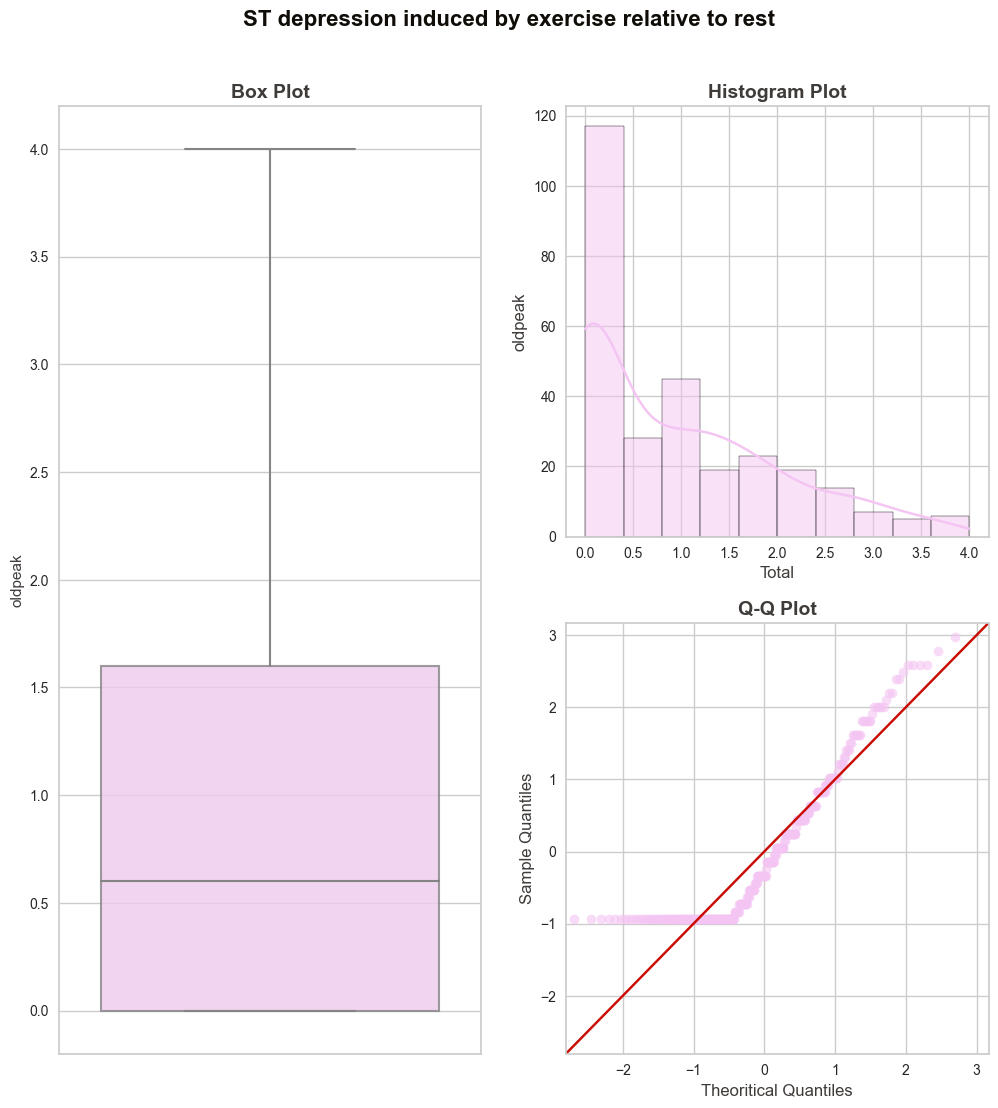

In [66]:
df_cut_outlier = outlier_trim(var, df_cut_outlier)
numerical_countplot(var, x_title, y_title, df_cut_outlier, color)

In [67]:
# df_dtype_fixed.info()
df_cut_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trtbps    283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalachh  283 non-null    int64  
 8   exng      283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slp       283 non-null    int64  
 11  caa       283 non-null    int64  
 12  thall     283 non-null    int64  
 13  output    283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### 5.2.2.6 | Observations Interpretions and True Facts

> 👉 Although the <mark><b>kurtosis value is not 3</b></mark>, it is <mark><b>not necessary for a distribution to have a kurtosis of exactly 3 to be considered normal</b></mark>. <br>
>>> 📌 <font color='white'><b>A distribution can still be approximately normal even if the kurtosis value is slightly different from 3</b></font>.

> 👉 Therefore, <mark><b>in conjunction with the visual inspection of the graph that shows the distribution as aprroximately normal</b></mark>, <br>
>>> 📌 the <font color='white'><b>skewness value near 0</b></font>, <br> 
>>> 📌 the <font color='white'><b>kurtosis value near 3</b></font>, <br>
>>> 📌 the <font color='white'><b>boxplot without outlier showns</b></font>, <br>
>>> 📌 the <font color='white'><b>histogram showing approximately normal</b></font>, and <br> 
>>> 📌 the <font color='white'><b>QQ plot shows almost all the data points lie on the linear straight line</b></font>

> 👉 At the <mark><b>last feature investigation</b></mark>, the <mark><b>boxplot shows that the minimum and the first quartile are at the same level (i.e., the bottom of the box)</b></mark>, <br>
>> this <mark>indicates that a large proportion of the data points are clustered at the lower end of the distribution</mark>. <br> 
>>> 📌 This <font color='white'><b>can occur if there are a lot of small values in the data set</b></font>, or <font color='white'><b>if there are some extreme outliers that are pulling the minimum value down</b></font>.

> 👉 <mark><b>After performing outlier trimming</b></mark>, if <mark><b>the minimum and first quartile still lie at the same level (i.e., the bottom of the box)</b></mark>, <br>
>>> 📌 this <font color='white'><b>suggests that the trimming procedure did not remove all of the outliers that were responsible for the extreme values in the lower part of the distribution causing the boxplot to appear the same before and after trimming</b></font> <br>
>>> 📌 However, it's <font color='white'><b>also possible that the trimming procedure was successful in removing the extreme outliers</b></font>, but that there <font color='white'><b>are still a large number of small values in the data set that are clustering at the lower end of the distribution</b></font>. In this case, the <font color='white'><b>boxplot would still show the same pattern of the minimum and first quartile being at the same level</b></font>.

# 6. | Exploration Data Analysis, EDA 📉
* 👉 This section will perform some <b>EDA</b> to get more insights about dataset.

### 6.0 | Correlation Matrix (Pearson Correlation) 📄 <br>

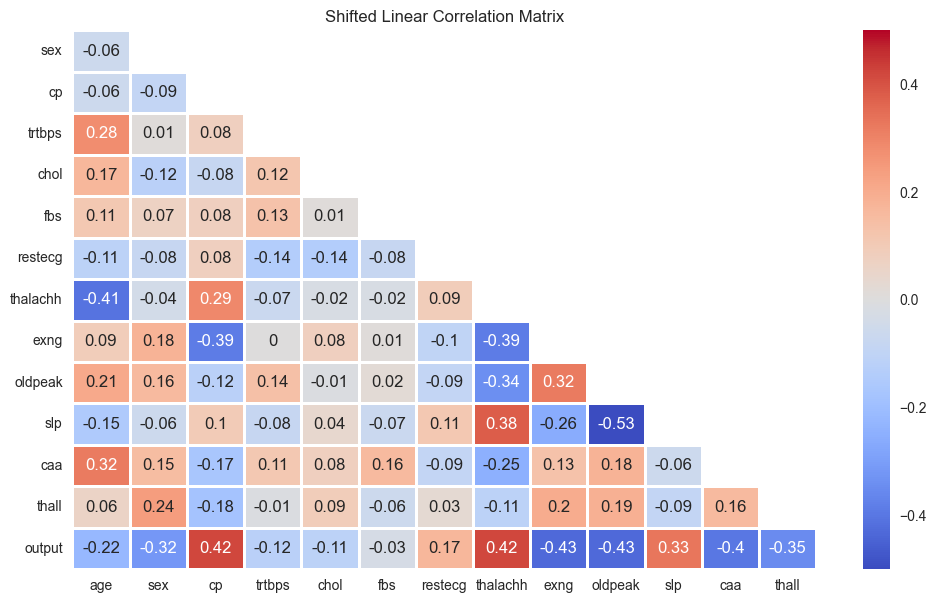

In [68]:
''' Plot a Shifted Correlation Matrix '''
# Check The Correlation between Only Dependent Categorical Variables and Independent Variable
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
# corrMat(df_dtype_fixed)
corrMat(df_cut_outlier)

> 👉 From the heatmap, it can be seen that 

>> ✅ Age, Sex, Exercise Induced Angina(exng), ST depression induced by exercise relative to rest(oldpeak), Number of Major Vessels(caa) and Thalium stress test results(thall) have high negative correlation to output.

>> ✅ Chest Pain Type(cp), Maximum Heart Rate(thalachh) and Slope of the Peak Exercise(slp) have high positive correlation with output. 

>> ✅ Resting Blood Pressure(trtbps) and cholesterol(chol) have moderate negative correlation with output.

>> ✅ Resting Electrocardiographic Results(restecg) have moderate positive correlation with output.

<AxesSubplot: >

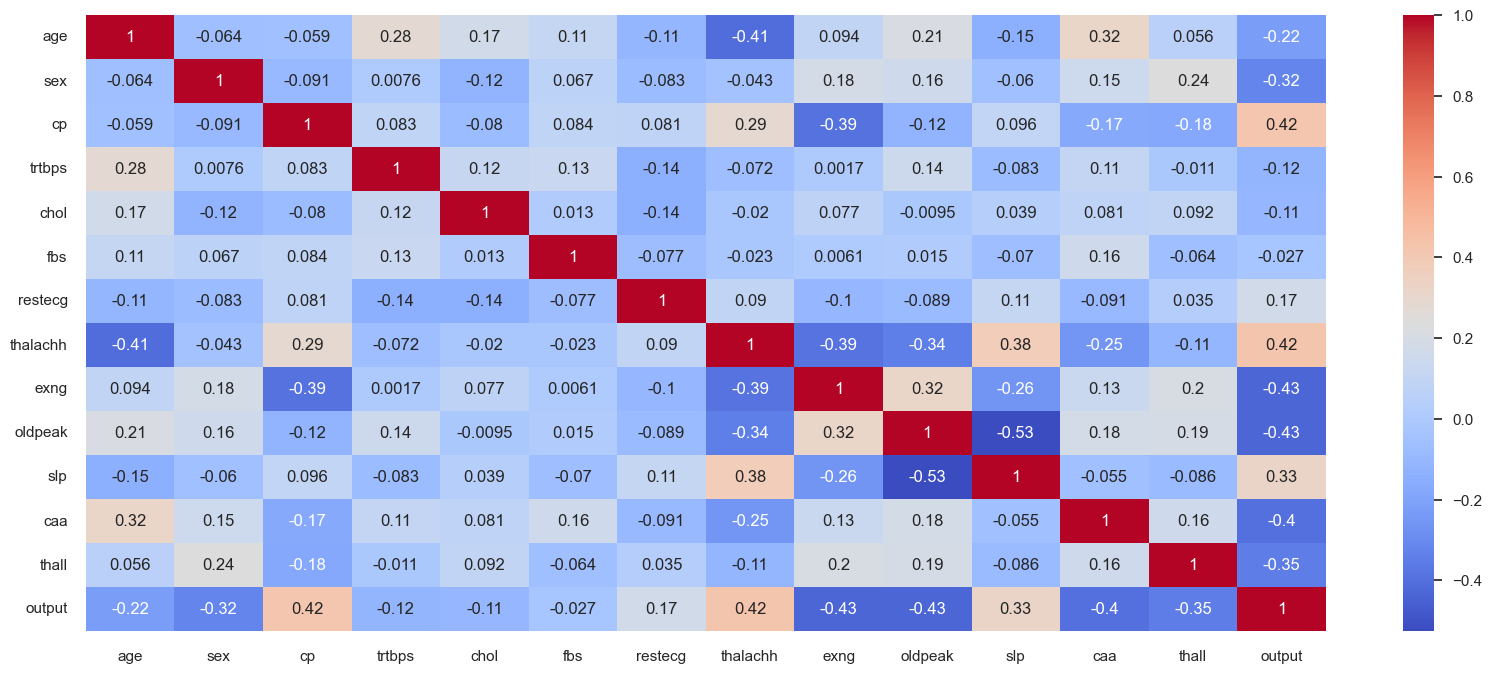

In [69]:
# Check The Overall Correlation between Dependent Variables and Independent Variable
sns.set(rc={'figure.figsize':(20,8)})
# sns.heatmap(df_dtype_fixed.corr(), annot=True, cmap='coolwarm')
sns.heatmap(df_cut_outlier.corr(), annot=True, cmap='coolwarm')

### 6.1 | The Effects of Any Possibilities Factors VS Heart Disease based on Age 🧑

### 6.1.0 | Correlation of Numerical data VS Heart Disease based on Age

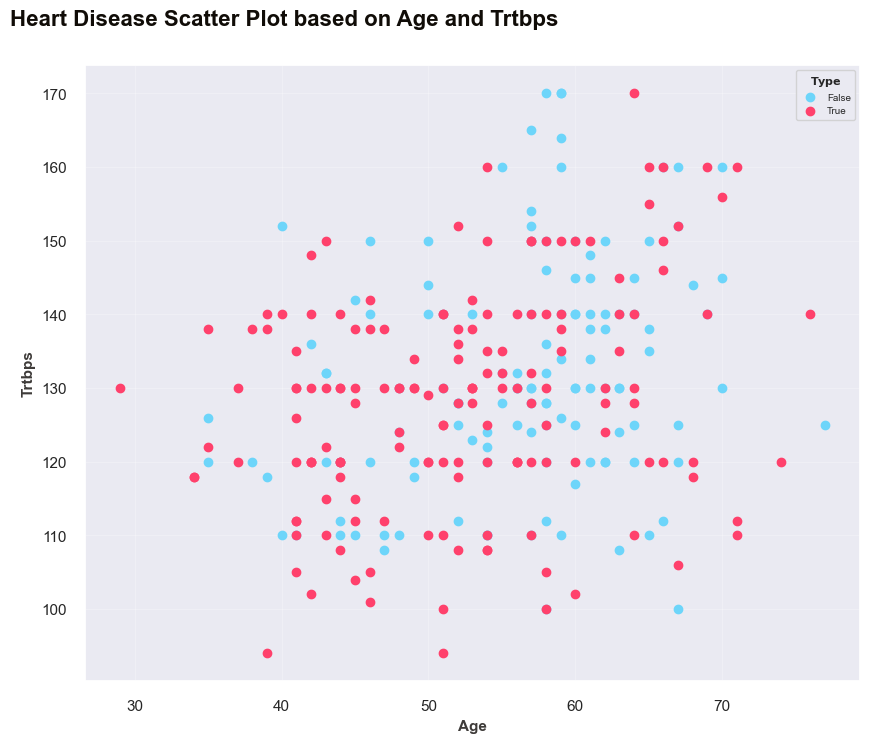

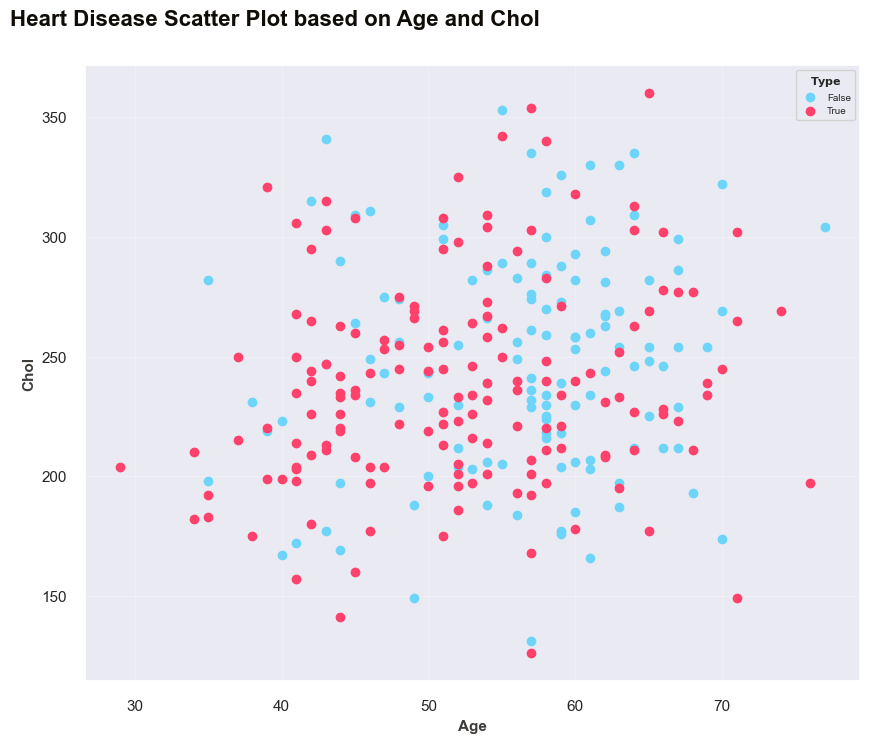

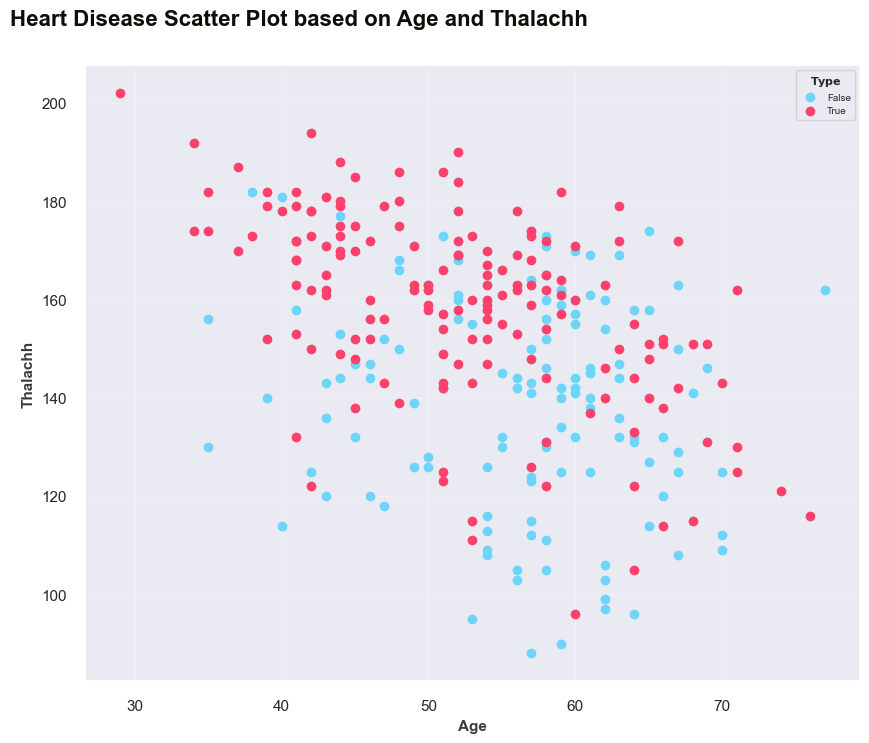

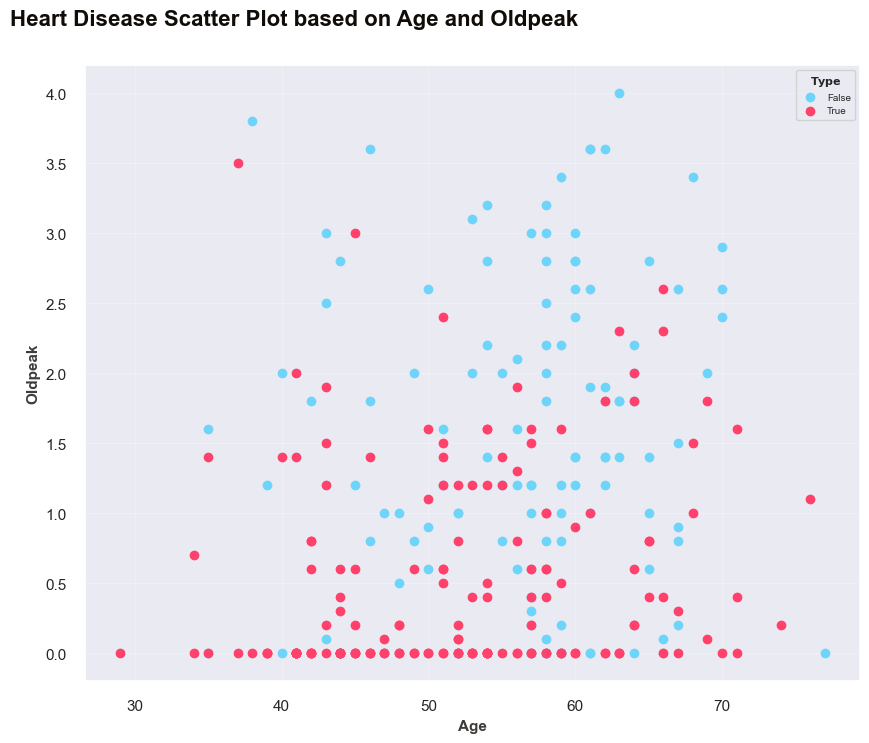

In [70]:
 # --- Variable, Color & Plot Size ---
numerical_corr = ["trtbps", "chol", "thalachh", "oldpeak"]
var1 = 'age'
x_title = "Age"

for ind, numeric in enumerate(numerical_corr):
    # scatter_plot(var1=var1, var2=numeric, x_title=x_title, y_title=numeric.title(), labels_output=labels_output, df=df_dtype_fixed, paltcolor=color_mix_light)
    scatter_plot(var1=var1, var2=numeric, x_title=x_title, y_title=numeric.title(), labels_output=labels_output, df=df_cut_outlier, paltcolor=color_mix_light)

> 👉 Based on age, patients with and without heart diseases mostly between 40-60 years old

> 👉 For Resting Blood Pressure(trtbps), around the range (120mmHg to 140mmHg) shown to have heart disease for in the age range of 40-60.

> 👉 For Cholesterol(chol), around the range (200 to 300) shown to have heart disease for in the age range of 40-60.

> 👉 For ST Depression induced by exercise relative to rest(oldpeak), around the range (0.0 to 1.5) shown to have heart disease for in the age range of 40-60.

> 👉 Patients with resting blood pressure, cholesterol shows moderate correlation with heart disease condition (output).  

> 👉 For the Maximum Heart Rate which shows highly correlated with heart target condition (output). 
>> Higher Maximum Heart Rate > 140, higher possibilities to have heart disease for all age range as it is a fact.

> 👉 Patients' age around 40-60 with heart diseases tend to have high heart rate compared to those with no heart diseases.

### 6.1.1 | Correlation of Categorical data VS Heart Disease based on Age

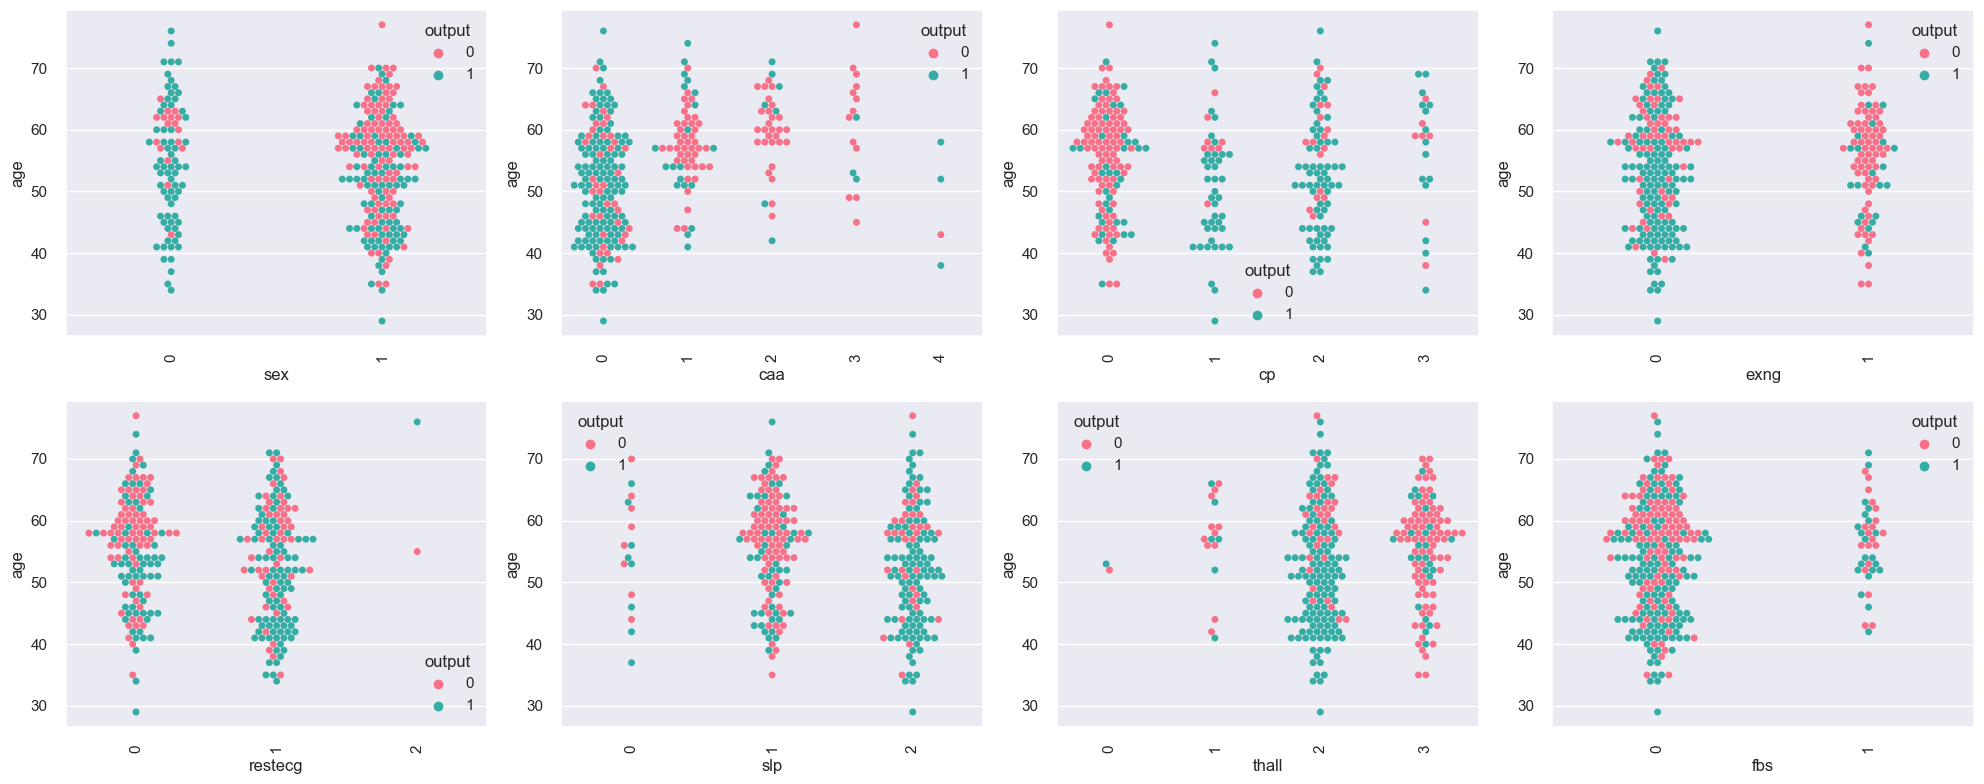

In [71]:
categorical_corr = ["sex", "caa", "cp", "exng", "restecg", "slp", "thall", "fbs"]
for ind, fac in enumerate(categorical_corr):        
    plt.subplot(2, 4, ind+1)
    # sns.swarmplot(y="age", x=fac, hue="output", data=df_dtype_fixed, palette="husl")
    sns.swarmplot(y="age", x=fac, hue="output", data=df_cut_outlier, palette="husl")
    plt.xticks(rotation=90)
    plt.tight_layout()

> 👉 For all categorical factors, patients with and without heart diseases with age correlation cannot be seen clearly as each of the factors having their own specific characteristic contributed to heart disease at all age range.

> 👉 For Gender(sex), male tend to have heart disease compared to female.

> 👉 For Major Blood Vessels(caa), 0 major blood vessels tend to have heart disease compared to others.

> 👉 For Chest Pain Type(cp), type 1(atypical angina) and type 2(non-angina pain) tend to have heart disease compared to type 0(typical angina).

> 👉 For Exercise Induced Angina(exng), exercise without induced angina tend to have heart disease compared to exercise with induced angina.

> 👉 For Resting Electrocardiogram(restecg), type 1(ST-T wave abnormality [T wave inversions and/or ST elevation or depression of > 0.05 mV]) tend to have heart disease compared to type 0(normal) and type 2(definite left ventricular hypertrophy).

> 👉 For The Peak Exercise ST Segment Slope 2(slp), the peak exercise ST segment slope 2 tend to have heart disease compared to Slope 0 and Slope 1.

> 👉 For Thalium Stress Test Results (thall), result 2(reversable defect) tend to have heart disease compared to result 0(normal) and result 1(fixed defects).

> 👉 For Fasting Blood Sugar (fbs), result 0(< 120mg/dL) and result 1(> 120mg/dL) have the similar percentage among patients with or without heart disease.

In [72]:
# df_dtype_fixed.info()
df_cut_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trtbps    283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalachh  283 non-null    int64  
 8   exng      283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slp       283 non-null    int64  
 11  caa       283 non-null    int64  
 12  thall     283 non-null    int64  
 13  output    283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# 7. | Feature Engineering (Dataset Pre-processing) ⚙
* 👉 This section will <b>prepare the dataset</b> before building the machine learning models.

### 7.1 | One-Hot Encoding 🔧
👉 The data pre-processing will be transforming categorical variables using <b>one-hot encoding technique</b>.

##### 7.1.1 With All Features, "df_cat_encode"

In [73]:
# df_cat_encode = df_dtype_fixed.copy()
df_cat_encode = df_cut_outlier.copy()

In [74]:
df_cat_encode.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0   2.3000    0   
1   37    1   2     130   250    0        1       187     0   3.5000    0   
2   41    0   1     130   204    0        0       172     0   1.4000    2   
3   56    1   1     120   236    0        1       178     0   0.8000    2   
4   57    0   0     120   354    0        1       163     1   0.6000    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [75]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp      = pd.get_dummies(df_cat_encode['cp'], prefix='cp')
restecg = pd.get_dummies(df_cat_encode['restecg'], prefix='restecg')
slp     = pd.get_dummies(df_cat_encode['slp'], prefix='slp')
caa     = pd.get_dummies(df_cat_encode['caa'], prefix='caa')
thall   = pd.get_dummies(df_cat_encode['thall'], prefix='thall')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df_cat_encode, cp, restecg, slp, caa, thall]
df_cat_encode = pd.concat(frames, axis = 1)

👉 After creating dummy variables, there are some unnecessary variables in the dataframe. These variables will be dropped in the next part.

### 7.2 | Dropping Unnecessary Variables 🔻
👉 The <b>variables that unnecessary will be deleted</b>.

In [76]:
# --- Drop Unnecessary Variables ---
df_cat_encode = df_cat_encode.drop(columns = ['cp', 'restecg', 'slp', 'caa', 'thall'])

In [77]:
df_cat_encode.head()

age  sex  trtbps  chol  fbs  thalachh  exng  oldpeak  output  cp_0  cp_1  \
0   63    1     145   233    1       150     0   2.3000       1     0     0   
1   37    1     130   250    0       187     0   3.5000       1     0     0   
2   41    0     130   204    0       172     0   1.4000       1     0     1   
3   56    1     120   236    0       178     0   0.8000       1     0     1   
4   57    0     120   354    0       163     1   0.6000       1     1     0   

   cp_2  cp_3  restecg_0  restecg_1  restecg_2  slp_0  slp_1  slp_2  caa_0  \
0     0     1          1          0          0      1      0      0      1   
1     1     0          0          1          0      1      0      0      1   
2     0     0          1          0          0      0      0      1      1   
3     0     0          0          1          0      0      0      1      1   
4     0     0          0          1          0      0      0      1      1   

   caa_1  caa_2  caa_3  caa_4  thall_0  thall_1  thall_2  thall_3  
0      0      0      0      0        0        1        0        0  
1      0      0      0      0        0        0        1        0  
2      0      0      0      0        0        0        1        0  
3      0      0      0      0        0        0        1        0  
4      0      0      0      0        0        0        1        0

### 7.3 | Features Separating ➗
👉 In this section, <mark><b>the 'output' (dependent) column will be seperated</b></mark> from independent columns.

In [78]:
# --- Seperating Dependent Features ---
X = df_cat_encode.drop(['output'], axis=1)
y = df_cat_encode['output']

### 7.4 | Features Selection ➗

##### <mark><b><font color='blue'>Using SelectKBest with score_func=chi2</font></b></mark>,
👉 Can indeed <mark><b>try all the features together in one shot</b></mark>.</br>
👉 <mark><b>The separation of numerical and categorical features is not mandatory for SelectKBest</b></mark>.</br>
👉 If have a dataset with both numerical and categorical features,</br> 
>>> 📌 can pass all the features to SelectKBest at once and let it handle the feature selection process.</br>

👉 <mark><b>SelectKBest</b></mark> will <mark><b><font color='blue'>internally handle the appropriate statistical test based on the nature of each feature</font></br>
>> 📌 <mark><b>(e.g., chi-square for categorical features, f_classif for numerical features in the case of classification problems)</b></mark>.

In [79]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfcolumns = pd.DataFrame(X.columns)
dfscores = pd.DataFrame(fit.scores_)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # Naming the dataframe columns
print(featureScores.nlargest(27,'Score'))  # Print 10 best features

        Specs    Score
5    thalachh 172.8926
7     oldpeak  58.8121
26    thall_3  43.6577
8        cp_0  39.4877
6        exng  35.9516
25    thall_2  35.3498
18      caa_0  26.5694
3        chol  25.8909
0         age  21.5059
17      slp_2  20.8057
16      slp_1  20.4102
10       cp_2  18.2666
20      caa_2  18.2212
9        cp_1  15.4041
19      caa_1  14.8189
21      caa_3   8.9210
1         sex   8.6441
2      trtbps   6.8718
12  restecg_0   4.6158
13  restecg_1   4.4738
24    thall_1   2.9074
11       cp_3   1.3610
22      caa_4   0.5961
15      slp_0   0.2206
4         fbs   0.1799
14  restecg_2   0.0276
23    thall_0   0.0276


> "thalachh" has the highest score, indicating that it has the strongest dependency with the target variable compared to the other features.

> "oldpeak" and "thall_3" also have relatively high scores, suggesting they are also strong predictors of the target variable.

> "cp_0", "exng", "thall_2", and "caa_0" have moderate scores, indicating that they may have some impact on the target variable, but not as strong as the first three features mentioned above.

> "chol", "age", and "slp_2" have relatively low scores, suggesting that they may have a weaker dependency with the target variable compared to the other features.

> The highest chi2 score of "thalachh", may induce overfitting to the model as the model will prone to predict towards the favor of "thalachh" condition

>> But, removing the highly correlated feature may be / may not be necessarily be the best solution. Therefore, need to check with the model's accuracy with and without this highly correlated feature included.

In [80]:
dfcolumns.T

0    1       2     3    4         5     6        7     8     9     10  \
0  age  sex  trtbps  chol  fbs  thalachh  exng  oldpeak  cp_0  cp_1  cp_2   

     11         12         13         14     15     16     17     18     19  \
0  cp_3  restecg_0  restecg_1  restecg_2  slp_0  slp_1  slp_2  caa_0  caa_1   

      20     21     22       23       24       25       26  
0  caa_2  caa_3  caa_4  thall_0  thall_1  thall_2  thall_3

In [81]:
X_feature_drop_thalachh_col = X.columns.drop('thalachh')

In [82]:
### Stopper for testing ###
# XXX
### Stopper for testing ###

# 8. | Splitting the Dataset 🪓
👉 The dataset will be splitted into <mark><b>80:20 ratio</b></mark> (80% training and 20% testing)

In [83]:
# --- Splitting Dataset into 80:20 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [84]:
print("X Train size: \n", X_train.shape)
print("X Test size: \n", X_test.shape)
print("Y Train size: \n", y_train.shape)
print("Y Test size: \n", y_test.shape)

X Train size: 
 (226, 27)
X Test size: 
 (57, 27)
Y Train size: 
 (226,)
Y Test size: 
 (57,)


>>> 👉 Perform SMOTE to handling imbalanced dataset on train set

In [85]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
df_dtype_fixed_bal = pd.concat([X_train_smote, y_train_smote], axis=1)

In [86]:
print('X train smote size: \n', X_train_smote.shape)
print('y train smote size: \n', y_train_smote.shape)

X train smote size: 
 (252, 27)
y train smote size: 
 (252,)


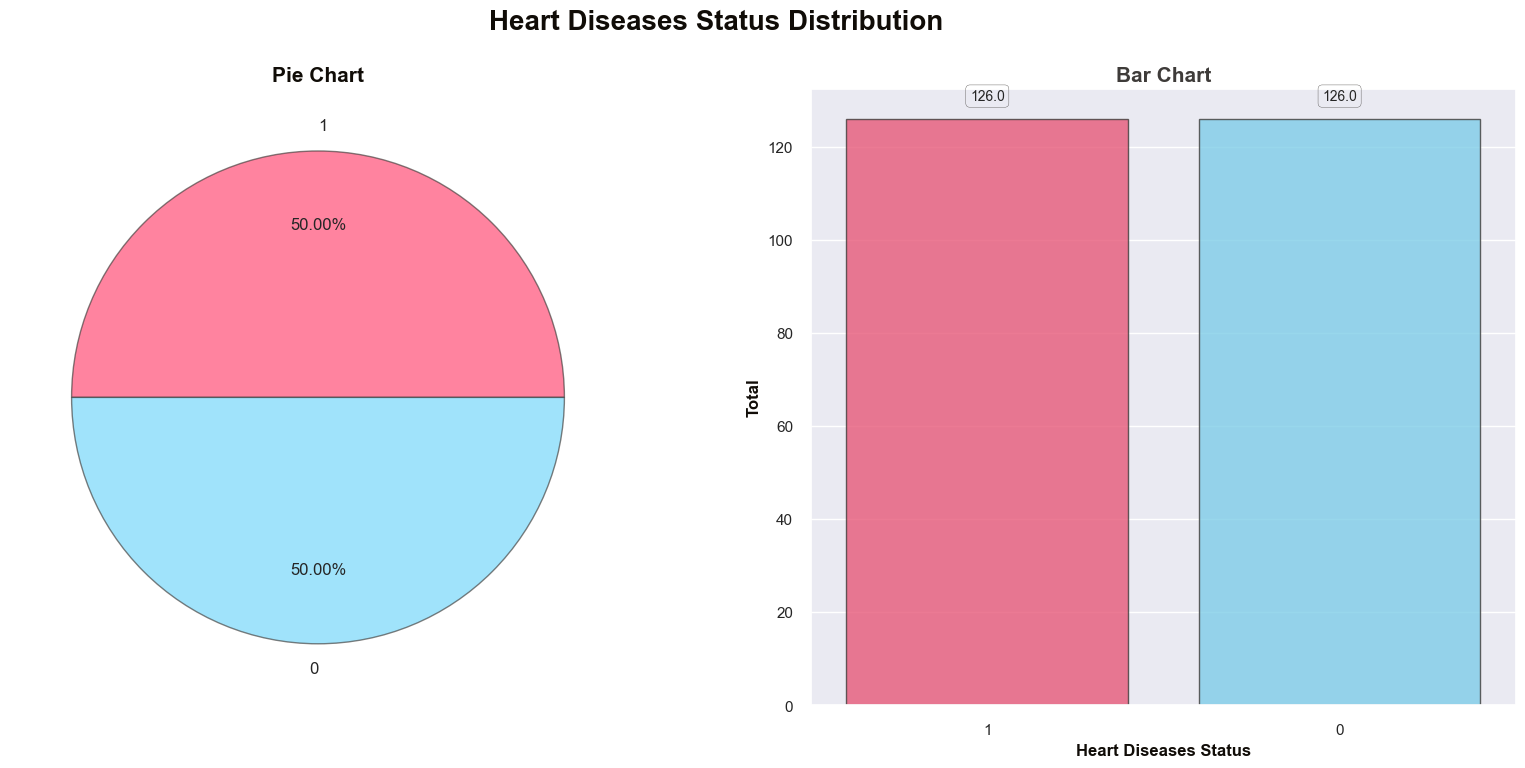

In [87]:
# Setting x_title, y_title, labels_var, ticks1, ticks2
var = 'output'
x_title = "Heart Diseases Status"
y_title = "Total"
labels_var = ['1', '0']
ticks1 = np.array([0, 1])
ticks2 = ['0:Male', '1:Female']

categorical_plots(var, x_title, y_title, labels_var, labels_output, ticks1, ticks2, df_dtype_fixed_bal, output_graph=False)

>>> Greats! The target dataset is now balance~!

# 9. | Data Normalization ⚖
👉 In this section, data normalization will be performed to <mark><b>normalize the range of independent variables</b></mark> or features of data.<br>

👉 Both <mark><b>MinMaxScaler</b></mark> and <mark><b>StandardScaler</b></mark> are used for feature scaling, which is an important preprocessing step in many machine learning algorithms. However, they work differently and are suited for different types of data.

👉 <mark><b>MinMaxScaler</b></mark> <font color='blue'><b>scales the data so that all the features are in the range [0, 1]</font>. This is done by subtracting the minimum value of the feature and dividing by the range (i.e., maximum minus minimum).
>>> 📌 is <font color='blue'>a good choice and useful if you know that your data has a bounded range (e.g., pixel intensities in an image) and you want to preserve the relative relationships between the features</font>.
 
>>> 📌 It is also <font color='blue'><b>a good choice and useful if you are using a model that does not assume a normal distribution of the features</b></font>.

👉 <mark><b>StandardScaler</b></mark>, on the other hand, <font color='blue'><b>scales the data so that the mean is 0 and the standard deviation is 1</b></font>. This is done by subtracting the mean value of the feature and dividing by the standard deviation. 
>>> 📌 is <font color='blue'><b>a good choice and useful if you have features that have a wide range of values or if you are using a linear model that assumes that the features are normally distributed</b></font>.

>>> 📌 is <font color='blue'><b>a good choice and useful if you don't have prior knowledge about the distribution of your data or if your data is not bounded</b></font>. 

>>> 📌 is also <font color='blue'><b>a good choice if you are using a linear model or a model that assumes that the features are normally distributed</b></font>.



👉 Data normalization will use <mark><b>Standard Normalization</b></mark>.</br>

##### 9.1 | For All Features

In [88]:
# --- Data Normalization using Standard Scaler Method ---
# X_train_scaled, X_test_scaled = normalize(X_train, X_test, 0)
X_train_smote_scaled, X_test_scaled = normalize(X_train_smote, X_test, 0)

In [89]:
print("X train smote scaled size: \n", X_train_smote_scaled.shape)
print("X test scaled size: \n", X_test_scaled.shape)

X train smote scaled size: 
 (252, 27)
X test scaled size: 
 (57, 27)


##### 9.2 | For Features of Non-Tree Models Drop based on SelectKBest and Chi2

In [90]:
X_train_smote_feature_drop_thalachh = X_train_smote[X_feature_drop_thalachh_col]
X_test_feature_drop_thalachh = X_test[X_feature_drop_thalachh_col]

In [91]:
# --- Data Normalization using Standard Scaler Method ---
X_train_smote_feature_drop_thalachh_scaled, X_test_feature_drop_thalachh_scaled = normalize(X_train_smote_feature_drop_thalachh, X_test_feature_drop_thalachh, 0)

In [92]:
print("X train smote feature drop scaled size: \n", X_train_smote_feature_drop_thalachh_scaled.shape)
print("X test feature drop scaled size: \n", X_test_feature_drop_thalachh_scaled.shape)

X train smote feature drop scaled size: 
 (252, 26)
X test feature drop scaled size: 
 (57, 26)


# 10. General Insights Before Going Further

### 10.1 Checking Models Accuracy with Different Criteria

In [93]:
# Basic overview for model accuracy
# models_accuracy(X_train, y_train, X_train_scaled)
models_accuracy(X_train_smote, y_train_smote, X_train_smote_scaled)

BASIC ACCURACY
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=42)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
2) SVC Training Accuracy: SVC(random_state=42)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(random_state=42)
4) Random Forest Training Accuracy: RandomForestClassifier(random_state=42)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=42)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=42)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, 

In [94]:
# Basic overview for model accuracy of after thalachh feature drop
models_accuracy(X_train_smote_feature_drop_thalachh, y_train_smote, X_train_smote_feature_drop_thalachh_scaled)

BASIC ACCURACY
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=42)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
2) SVC Training Accuracy: SVC(random_state=42)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(random_state=42)
4) Random Forest Training Accuracy: RandomForestClassifier(random_state=42)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=42)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=42)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, 

> From the above observations, it seems like the Decision Tree, Gradient Boosting and XGBoosting models tend to overfit on this dataset.

In [96]:
### Stopper for testing ###
# XXX
### Stopper for testing ###

# 11. | Model Implementation 🛠
* 👉 This section will implement various machine learning models as mentioned in <b>Introduction</b> section. In addition, explanation for each models will be discussed.

### 11.1 | Logistic Regression

##### 11.1.a | Modelling Logistic Regression (LR) with Default Parameters

In [ ]:
# --- Applying Logistic Regression ---
log_model = LogisticRegression(random_state=42)
# log_model.fit(X_train_scaled, y_train)
log_model.fit(X_train_smote_scaled, y_train_smote)

# log_y_train_pred = log_model.predict(X_train_scaled)
log_y_train_pred = log_model.predict(X_train_smote_scaled)

log_y_pred = log_model.predict(X_test_scaled)

In [ ]:
# log_train_val = train_val(X_train_scaled, X_test_scaled, y_train, y_test, 
#                         log_y_train_pred, log_y_pred, log_model, "Logistic Regression")
log_train_val = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                        log_y_train_pred, log_y_pred, log_model, "Logistic Regression")
log_train_val

In [ ]:
log_y_pred_proba = log_model.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = log_y_pred
test_data["pred_Proba"] = log_y_pred_proba[:, 1]
test_data.loc[:, ["output", "pred", "pred_Proba"]].sample(10)

##### 11.1.b Cross-Validating Logistic Regression (LR) Model

In [ ]:
log_xvalid_model= LogisticRegression(random_state=42)

log_xvalid_model_scores = cross_validate(log_xvalid_model, X_train_smote_scaled, y_train_smote, 
                                         scoring=["accuracy", "precision", "recall", "f1"], cv=10)
log_xvalid_model_scores_df = pd.DataFrame(log_xvalid_model_scores, index=range(1,11))
log_xvalid_model_scores_df

In [ ]:
log_xvalid_model_scores_df.mean()[2:]

##### 11.1.b Modelling Logistic Regression (LR) with Best Parameters Using Pipeline and GridSeachCV

In [ ]:
# Define gridSearchCV parameters
log_param_grid = {
    "model__penalty": ["l1", "l2", "elasticnet"],                                              # Regularization (penalty)
                                                                                                    # None: no penalty is added;
                                                                                                    # 'l2': add a L2 penalty term and it is the default choice;
                                                                                                    # 'l1': add a L1 penalty term;
                                                                                                    # 'elasticnet': both L1 and L2 penalty terms are added.
    "model__l1_ratio": np.linspace(0, 1, 10),                                                  # The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. 
                                                                                                    # l1_ratio=0 is equivalent to using penalty='l2', 
                                                                                                    # while setting l1_ratio=1 is equivalent to using penalty='l1'. 
                                                                                                    # For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.
    "model__C": [100, 10, 1.0, 0.1, 0.01],                                                     # The C parameter controls the penality strength, which can also be effective.
    "model__solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "saga"],           # Algorithm to use in the optimization problem. Default is ‘lbfgs’. 
                                                                                               # To choose a solver, you might want to consider the following aspects:
                                                                                                    # For small datasets, ‘liblinear’ is a good choice, 
                                                                                                    # whereas ‘sag’ and ‘saga’ are faster for large ones;
                                                                                                    # For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
                                                                                                    # ‘liblinear’ is limited to one-versus-rest schemes.
                                                                                                    # ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. 
                                                                                                        # Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. 
                                                                                                        # Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.
    "model__max_iter": [100, 500, 1000, 2500, 5000]
}

In [ ]:
log_model_best_param_grid_search = hyperparam_tune_pipe_run('Logistic Regression', LogisticRegression(random_state=42), log_param_grid, X_train_smote_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
log_model_best_param = log_model_best_param_grid_search.best_params_
print("Logistic Regression Best Parameters: \n", log_model_best_param)

# Train the model using the best hyperparameters
log_model_best_param = LogisticRegression(penalty=log_model_best_param["model__penalty"], 
                                          l1_ratio=log_model_best_param["model__l1_ratio"], 
                                          C=log_model_best_param["model__C"],
                                          solver=log_model_best_param["model__solver"], 
                                          max_iter=log_model_best_param["model__max_iter"], 
                                          class_weight="balanced",
                                          random_state=42)
log_model_best_param.fit(X_train_smote_scaled, y_train_smote)
log_y_train_pred_best_param = log_model_best_param.predict(X_train_smote_scaled)
log_y_pred_best_param = log_model_best_param.predict(X_test_scaled)

In [ ]:
log_y_pred_proba_best_param = log_model_best_param.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = log_y_pred_best_param
test_data["pred_Proba"] = log_y_pred_proba_best_param[:, 1]
test_data.loc[:, ["output", "pred", "pred_Proba"]].sample(10)

##### 11.1.d The Determination of The Optimal Treshold

In [ ]:
log_fp_rate, log_tp_rate, log_thresholds = roc_curve(y_test, log_y_pred_proba_best_param[:, 1])
optimal_idx = np.argmax(log_tp_rate - log_fp_rate)
log_optimal_threshold = log_thresholds[optimal_idx]
log_roc_curve = {"fp_rate":log_tp_rate, "tp_rate":log_fp_rate, "thresholds":log_thresholds}
log_roc_curve_df = pd.DataFrame(log_roc_curve)
log_roc_curve_df.iloc[optimal_idx]

In [ ]:
log_train_val_best_param = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                                        log_y_train_pred_best_param, log_y_pred_best_param, log_model_best_param, "Logistic Regression with Best Param")
log_train_val_best_param

##### 11.1.e Feature Selection for Logistic Regression Model based on SelectKBest and Chi2

In [ ]:
log_model_best_param_grid_search = hyperparam_tune_pipe_run('Logistic Regression', LogisticRegression(random_state=42), log_param_grid, X_train_smote_feature_drop_thalachh_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
log_model_feature_drop_best_param = log_model_best_param_grid_search.best_params_
print("Logistic Regression Best Parameters: \n", log_model_feature_drop_best_param)

# Train the model using the best hyperparameters
log_model_feature_drop_best_param = LogisticRegression(penalty=log_model_feature_drop_best_param["model__penalty"], 
                                          l1_ratio=log_model_feature_drop_best_param["model__l1_ratio"], 
                                          C=log_model_feature_drop_best_param["model__C"],
                                          solver=log_model_feature_drop_best_param["model__solver"], 
                                          max_iter=log_model_feature_drop_best_param["model__max_iter"], 
                                          class_weight="balanced",
                                          random_state=42)
log_model_feature_drop_best_param.fit(X_train_smote_feature_drop_thalachh_scaled, y_train_smote)
log_y_train_pred_feature_drop_best_param = log_model_feature_drop_best_param.predict(X_train_smote_feature_drop_thalachh_scaled)
log_y_pred_feature_drop_best_param = log_model_feature_drop_best_param.predict(X_test_feature_drop_thalachh_scaled)

In [ ]:
log_train_val_feature_drop_best_param = train_val(X_train_smote_feature_drop_thalachh_scaled, X_test_feature_drop_thalachh_scaled, 
                                                  y_train_smote, y_test, 
                                                  log_y_train_pred_feature_drop_best_param, log_y_pred_feature_drop_best_param, 
                                                  log_model_feature_drop_best_param, "Logistic Regression Feature Drop with Best Param")
log_train_val_feature_drop_best_param

> The 'thalachh' feature dropped is well suited for model accuracy as the test accuracy has increased about 3.5% and the train test accuracy difference has improved a lot with just around less than 1% as the feature itself may cause overfitting due to its extraordinarily high chi2 score compared to other features compared with the hyperparameter tuned model without dropped feature.

In [ ]:
### Stopper for testing ###
# XXX
### Stopper for testing ###

### 11.2 | K-Nearest Neighbour (KNN)

##### 11.2.a The Implementation of K-Nearest Neighbor (KNN) with Default Parameters

In [ ]:
# --- Applying KNN ---
knn_model = KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_smote_scaled, y_train_smote)

# knn_y_train_pred = knn_model.predict(X_train_scaled)
knn_y_train_pred = knn_model.predict(X_train_smote_scaled)

knn_y_pred = knn_model.predict(X_test_scaled)

In [ ]:
# knn_train_val = train_val(X_train_scaled, X_test_scaled, y_train, y_test, 
#                             knn_y_train_pred, knn_y_pred, knn_model, "K_Nearest Negihbour")
knn_train_val = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                            knn_y_train_pred, knn_y_pred, knn_model, "K_Nearest Negihbour")
knn_train_val

In [ ]:
knn_y_pred_proba = knn_model.predict_proba(X_test_scaled)
knn_pred_dict = {"Actual": y_test, "Pred": knn_y_pred, "Proba_1": knn_y_pred_proba[:, 1], "Proba_0": knn_y_pred_proba[:, 0]}
knn_pred_dict_df = pd.DataFrame(knn_pred_dict)
knn_pred_dict_df.sample(10)

##### 11.2.b Cross-Validating K-Nearest Neighbor (KNN)

In [ ]:
knn_xvalid_model = KNeighborsClassifier(n_neighbors=3)
knn_xvalid_model_scores = cross_validate(knn_xvalid_model, X_train_smote_scaled, y_train_smote, 
                                         scoring=["accuracy", "precision", "recall", "f1"], cv = 10)
knn_xvalid_model_scores_df = pd.DataFrame(knn_xvalid_model_scores, index=range(1, 11))
knn_xvalid_model_scores_df

In [ ]:
knn_xvalid_model_scores_df.mean()[2:]

##### 11.2.c Elbow Method for Choosing Reasonable K Values

In [ ]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_smote_scaled, y_train_smote)

    knn_y_pred = knn_model.predict(X_test_scaled)
    test_error = 1 - accuracy_score(y_test, knn_y_pred)
    test_error_rates.append(test_error)
    
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color="blue", linestyle="--", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel("K Values")
plt.ylabel("Error Rate")

##### 11.2.d Modelling K-Nearest Neighbour with Best Parameters(for Choosing Best K Value) Using Pipeline and GridSeachCV

In [ ]:
knn_param_grid = {
    "model__n_neighbors": range(1, 30),                                             # Number of neighbors to use by default for kneighbors queries.
    "model__p": [1, 2],                                                             # Power parameter for the Minkowski metric. 
                                                                                        # When p = 1, this is equivalent to using manhattan_distance (l1), 
                                                                                        # and euclidean_distance (l2) for p = 2. 
                                                                                        # For arbitrary p, minkowski_distance (l_p) is used.
    "model__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],                  # Algorithm used to compute the nearest neighbors:
                                                                                        # ‘ball_tree’ will use BallTree
                                                                                        # ‘kd_tree’ will use KDTree
                                                                                        # ‘brute’ will use a brute-force search.
                                                                                        # ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
    "model__leaf_size": [10, 30, 50],                                               # Leaf size passed to BallTree or KDTree. 
                                                                                        # This can affect the speed of the construction and query, 
                                                                                        # as well as the memory required to store the tree. 
                                                                                        # The optimal value depends on the nature of the problem.
    "model__weights": ["uniform", "distance"],                                      # Weight function used in prediction. Possible values:
                                                                                        # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
                                                                                        # ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
                                                                                        # [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
    'model__metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']          # Metric to use for distance computation. 
                                                                                        # Default is “minkowski”, which results in the standard Euclidean distance when p = 2. 
}

In [ ]:
knn_model_best_param_grid_search = hyperparam_tune_pipe_run('K Nearest Neighbour', KNeighborsClassifier(n_neighbors=3), knn_param_grid, X_train_smote_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
knn_model_best_param = knn_model_best_param_grid_search.best_params_
print("K-Nearest Neighbour Best Parameters: \n", knn_model_best_param)

# Train the model using the best hyperparameters
knn_model_best_param = KNeighborsClassifier(n_neighbors=knn_model_best_param["model__n_neighbors"], 
                                            p=knn_model_best_param["model__p"],
                                            algorithm=knn_model_best_param["model__algorithm"],
                                            weights=knn_model_best_param["model__weights"],
                                            metric=knn_model_best_param["model__metric"])
knn_model_best_param.fit(X_train_smote_scaled, y_train_smote)

knn_y_train_pred_best_param = knn_model_best_param.predict(X_train_smote_scaled)
knn_y_pred_best_param = knn_model_best_param.predict(X_test_scaled)

In [ ]:
knn_y_pred_proba_best_param = knn_model_best_param.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = knn_y_pred_best_param
test_data["pred_Proba"] = knn_y_pred_proba_best_param[:, 1]
test_data.loc[:, ["output", "pred", "pred_Proba"]].sample(10)

##### 11.2.e The Determination of The Optimal Treshold

In [ ]:
knn_fp_rate, knn_tp_rate, knn_thresholds = roc_curve(y_test, knn_y_pred_proba_best_param[:, 1])
optimal_idx = np.argmax(knn_tp_rate - knn_fp_rate)
optimal_threshold = knn_thresholds[optimal_idx]
knn_roc_curve = {"fp_rate":knn_fp_rate, "tp_rate":knn_tp_rate, "thresholds":knn_thresholds}
knn_roc_curve_df = pd.DataFrame(knn_roc_curve)
knn_roc_curve_df.iloc[optimal_idx]

In [ ]:
knn_train_val_best_param = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                                        knn_y_train_pred_best_param, knn_y_pred_best_param, knn_model_best_param, "K_Nearest Negihbour with Best Param")
knn_train_val_best_param

##### 11.2.f Feature Selection for K-Nearest Neighbour Model based on SelectKBest and Chi2

In [ ]:
knn_model_best_param_grid_search = hyperparam_tune_pipe_run('K Nearest Neighbour', KNeighborsClassifier(n_neighbors=3), knn_param_grid, X_train_smote_feature_drop_thalachh_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
knn_model_feature_drop_best_param = knn_model_best_param_grid_search.best_params_
print("K-Nearest Neighbour Best Parameters: \n", knn_model_feature_drop_best_param)

# Train the model using the best hyperparameters
knn_model_feature_drop_best_param = KNeighborsClassifier(n_neighbors=knn_model_feature_drop_best_param["model__n_neighbors"], 
                                            p=knn_model_feature_drop_best_param["model__p"],
                                            algorithm=knn_model_feature_drop_best_param["model__algorithm"],
                                            weights=knn_model_feature_drop_best_param["model__weights"],
                                            metric=knn_model_feature_drop_best_param["model__metric"])

knn_model_feature_drop_best_param.fit(X_train_smote_feature_drop_thalachh_scaled, y_train_smote)
knn_y_train_pred_feature_drop_best_param = knn_model_feature_drop_best_param.predict(X_train_smote_feature_drop_thalachh_scaled)
knn_y_pred_feature_drop_best_param = knn_model_feature_drop_best_param.predict(X_test_feature_drop_thalachh_scaled)

In [ ]:
knn_train_val_feature_drop_best_param = train_val(X_train_smote_feature_drop_thalachh_scaled, X_test_feature_drop_thalachh_scaled, 
                                                  y_train_smote, y_test, 
                                                  knn_y_train_pred_feature_drop_best_param, knn_y_pred_feature_drop_best_param, 
                                                  knn_model_feature_drop_best_param, "K-Nearest Neighbour Feature Drop with Best Param")
knn_train_val_feature_drop_best_param

> Compared with the hyperparameter tuned model without dropped feature, the hyperparamter tuned model fits the training data perfectly. By removing this 'thalachh' feature, may have eliminated some valuable information, causing a decrease in accuracy. However, the smaller decrease in test accuracy compared to train accuracy indicates that dropping this feature helped to reduce overfitting to some extent, as the test accuracy is still considered high and the train test accuracy diffference is small so the model's performance on unseen data (test set) remained relatively stable.

### 11.3 | Support Vector Machine (SVM)

##### 11.3.a Modelling Support Vector Machine Classifier (SVC) with Default Parameters

In [ ]:
# --- Applying SVM ---
 #### To avoid setting the binary=True parameter needs to be added to the ROCAUC and PrecisionRecallCurve classes 
        # to specify that there are only two classes in the classification problem for Support Vector Machine Classifier
        # provide parameter 'probability=True'
svc_model = SVC(random_state=42, probability=True)
# svc_model.fit(X_train_scaled, y_train)
svc_model.fit(X_train_smote_scaled, y_train_smote)

# svc_y_train_pred = svc_model.predict(X_train_scaled)
svc_y_train_pred = svc_model.predict(X_train_smote_scaled)

svc_y_pred = svc_model.predict(X_test_scaled)

In [ ]:
 #### The binary=True parameter needs to be added to the ROCAUC and PrecisionRecallCurve classes 
        # to specify that there are only two classes in the classification problem for Support Vector Machine Classifier
# svc_train_val = train_val(X_train_scaled, X_test_scaled, y_train, y_test, 
#                                 svc_y_train_pred, svc_y_pred, svc_model, "Support Vector Classifier")
svc_train_val = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                                svc_y_train_pred, svc_y_pred, svc_model, "Support Vector Classifier")
svc_train_val

In [ ]:
svc_y_pred_proba = svc_model.predict_proba(X_test_scaled)
svc_pred_dict = {"Actual": y_test, "Pred": svc_y_pred, "Proba_1": svc_y_pred_proba[:, 1], "Proba_0": svc_y_pred_proba[:, 0]}
svc_pred_dict_df = pd.DataFrame(svc_pred_dict)
svc_pred_dict_df.sample(10)

##### 11.3.b Cross-Validating Support Vector Machine (SVM) Model

In [ ]:
svc_xvalid_model = SVC(random_state=42, probability=True)
svc_xvalid_model_scores = cross_validate(svc_xvalid_model, X_train_smote_scaled, y_train_smote, 
                                         scoring=["accuracy", "precision", "recall", "f1"], cv = 10)
svc_xvalid_model_scores_df = pd.DataFrame(svc_xvalid_model_scores, index=range(1, 11))
svc_xvalid_model_scores_df

In [ ]:
svc_xvalid_model_scores_df.mean()[2:]

##### 11.3.c Modelling Support Vector Machine Classifier (SVC) with Best Parameters Using Pipeline and GridSeachCV

In [ ]:
svc_param_grid = {'model__C': [0.1, 1, 10, 100, 1000],                                  # Regularization parameter. 
                                                                                            # The strength of the regularization is inversely proportional to C. 
                                                                                            # Must be strictly positive. The penalty is a squared l2 penalty.
                  'model__gamma': ["scale", "auto", 1, 0.1, 0.01, 0.001, 0.0001],       # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
                                                                                            # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
                                                                                            # if ‘auto’, uses 1 / n_features
                                                                                            # if float, must be non-negative.
                  'model__kernel': ['rbf', 'linear', 'poly', 'sigmoid']}                # Specifies the kernel type to be used in the algorithm. 
                                                                                            # If none is given, ‘rbf’ will be used. 
                                                                                            # If a callable is given it is used to pre-compute the kernel matrix from data matrices; 
                                                                                                # that matrix should be an array of shape (n_samples, n_samples).

In [ ]:
svc_model_best_param_grid_search = hyperparam_tune_pipe_run('Support Vector Machine Classifier', SVC(random_state=42, probability=True), svc_param_grid, X_train_smote_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
svc_model_best_param = svc_model_best_param_grid_search.best_params_
print("Support Vector Machine Classifier Best Parameters: \n", svc_model_best_param)

# Train the model using the best hyperparameters
svc_model_best_param = SVC(C=svc_model_best_param["model__C"],
                           gamma=svc_model_best_param["model__gamma"],
                           kernel=svc_model_best_param["model__kernel"],
                           random_state=42,
                           probability=True)
svc_model_best_param.fit(X_train_smote_scaled, y_train_smote)

svc_y_train_pred_best_param = svc_model_best_param.predict(X_train_smote_scaled)
svc_y_pred_best_param = svc_model_best_param.predict(X_test_scaled)

In [ ]:
svc_y_pred_proba_best_param = svc_model_best_param.predict_proba(X_test)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = svc_y_pred_best_param
test_data["pred_Proba"] = svc_y_pred_proba_best_param[:, 1]
test_data.loc[:, ["output", "pred", "pred_Proba"]].sample(10)

##### 11.3.d The Determination of The Optimal Treshold

In [ ]:
svc_fp_rate, svc_tp_rate, svc_thresholds = roc_curve(y_test, svc_y_pred_proba_best_param[:, 1])
optimal_idx = np.argmax(svc_tp_rate - svc_fp_rate)
optimal_threshold = svc_thresholds[optimal_idx]
svc_roc_curve = {"fp_rate":svc_fp_rate, "tp_rate":svc_tp_rate, "thresholds":svc_thresholds}
svc_roc_curve_df = pd.DataFrame(svc_roc_curve)
svc_roc_curve_df.iloc[optimal_idx]

In [ ]:
svc_train_val_best_param = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                                     svc_y_train_pred_best_param, svc_y_pred_best_param, svc_model_best_param, "Support Vector Machine Classifier with Best Param")
svc_train_val_best_param

##### 11.3.e Feature Selection for Support Vector Machine Model based on SelectKBest and Chi2

In [ ]:
svc_model_best_param_grid_search = hyperparam_tune_pipe_run('Support Vector Machine Classifier', SVC(random_state=42, probability=True), svc_param_grid, X_train_smote_feature_drop_thalachh_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
svc_model_feature_drop_best_param = svc_model_best_param_grid_search.best_params_
print("Support Vector Machine Best Parameters: \n", svc_model_feature_drop_best_param)

# Train the model using the best hyperparameters
svc_model_feature_drop_best_param = SVC(C=svc_model_feature_drop_best_param["model__C"],
                           gamma=svc_model_feature_drop_best_param["model__gamma"],
                           kernel=svc_model_feature_drop_best_param["model__kernel"],
                           random_state=42,
                           probability=True)
svc_model_feature_drop_best_param.fit(X_train_smote_feature_drop_thalachh_scaled, y_train_smote)
svc_y_train_pred_feature_drop_best_param = svc_model_feature_drop_best_param.predict(X_train_smote_feature_drop_thalachh_scaled)
svc_y_pred_feature_drop_best_param = svc_model_feature_drop_best_param.predict(X_test_feature_drop_thalachh_scaled)


In [ ]:
svc_train_val_feature_drop_best_param = train_val(X_train_smote_feature_drop_thalachh_scaled, X_test_feature_drop_thalachh_scaled, 
                                                  y_train_smote, y_test, 
                                                  svc_y_train_pred_feature_drop_best_param, svc_y_pred_feature_drop_best_param, 
                                                  svc_model_feature_drop_best_param, "Support Vector Machine Feature Drop with Best Param")
svc_train_val_feature_drop_best_param

> The initial model trained was able to generalize relatively well to unseen data, as the test accuracy is still considered close to the train accuracy. 

> After hyperparameter tuning, observed a decrease in both train and test accuracy as this could be attributed to several factors. For example, the hyperparameter tuning process led to a suboptimal set of hyperparameters, negatively affecting the model's performance. Additionally, it's important to consider that hyperparameter tuning can sometimes introduce overfitting if the tuning process is not properly regularized or validated.

> After dropping extraordinarily high chi2 score 'thalachh' feature with performing hyperparameter tuning, the train and test accuracy have increased back as this suggests a combination of hyperparameter tuning and feature selection (dropping high chi2 score features) led to a more balanced model performance, with improved accuracy on both the train and test sets.

> The hyperparameter tuned with dropped feature has improved generalization although the test accuracy slightly drops about 1.75 compared with original traine model.

### 11.4 | Gaussian Naive Bayes

##### 11.4.a The Implementation of Gaussian Naive Bayes with Default Parameters

In [ ]:
# --- Applying Gaussian GNB ---
gnb_model = GaussianNB(var_smoothing=1e-9)
# gnb_model.fit(X_train_scaled, y_train)
gnb_model.fit(X_train_smote_scaled, y_train_smote)

# gnb_y_train_pred = gnb_model.predict(X_train_scaled)
gnb_y_train_pred = gnb_model.predict(X_train_smote_scaled)

gnb_y_pred = gnb_model.predict(X_test_scaled)

In [ ]:
# gnb_train_val = train_val(X_train_scaled, X_test_scaled, y_train, y_test, 
#                             gnb_y_train_pred, gnb_y_pred, gnb_model, "Gaussian Naive Bayes")
gnb_train_val = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                            gnb_y_train_pred, gnb_y_pred, gnb_model, "Gaussian Naive Bayes")
gnb_train_val

In [ ]:
gnb_y_pred_proba = gnb_model.predict_proba(X_test_scaled)
gnb_pred_dict = {"Actual": y_test, "Pred": gnb_y_pred, "Proba_1": gnb_y_pred_proba[:, 1], "Proba_0": gnb_y_pred_proba[:, 0]}
gnb_pred_dict_df = pd.DataFrame(gnb_pred_dict)
gnb_pred_dict_df.sample(10)

##### 11.4.b Cross-Validating Gaussian Naive Bayes

In [ ]:
gnb_xvalid_model = GaussianNB(var_smoothing=1e-9)
gnb_xvalid_model_scores = cross_validate(gnb_xvalid_model, X_train_smote_scaled, y_train_smote, 
                                         scoring=["accuracy", "precision", "recall", "f1"], cv = 10)
gnb_xvalid_model_scores_df = pd.DataFrame(gnb_xvalid_model_scores, index=range(1, 11))
gnb_xvalid_model_scores_df

gnb_xvalid_model_scores_df.mean()[2:]

##### 11.4.c Modelling Gaussian Naive Bayes with Best Parameters Using Pipeline and GridSeachCV

In [ ]:
gnb_param_grid = {
    'model__var_smoothing': [1e-9, 1e-7, 1e-5, 0.0001, 0.01, 0.1]
}

In [ ]:
gnb_model_best_param_grid_search = hyperparam_tune_pipe_run('Gaussian Naive Bayes', GaussianNB(), gnb_param_grid, X_train_smote_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
gnb_model_best_param = gnb_model_best_param_grid_search.best_params_
print("Gradient Boosting Best Parameters: \n", gnb_model_best_param)

# Train the model using the best hyperparameters
gnb_model_best_param = GaussianNB(var_smoothing=gnb_model_best_param["model__var_smoothing"])
gnb_model_best_param.fit(X_train_smote_scaled, y_train_smote)
gnb_y_train_pred_best_param = gnb_model_best_param.predict(X_train_smote_scaled)
gnb_y_pred_best_param = gnb_model_best_param.predict(X_test_scaled)

In [ ]:
gnb_y_pred_proba_best_param = gnb_model_best_param.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = gnb_y_pred_best_param
test_data["pred_Proba"] = gnb_y_pred_proba_best_param[:, 1]
test_data.loc[:, ["output", "pred", "pred_Proba"]].sample(10)

##### 11.4.d The Determination of The Optimal Treshold

In [ ]:
gnb_fp_rate, gnb_tp_rate, gnb_thresholds = roc_curve(y_test, gnb_y_pred_proba_best_param[:, 1])
optimal_idx = np.argmax(gnb_tp_rate - gnb_fp_rate)
optimal_threshold = gnb_thresholds[optimal_idx]
gnb_roc_curve = {"fp_rate":gnb_fp_rate, "tp_rate":gnb_tp_rate, "thresholds":gnb_thresholds}
gnb_roc_curve_df = pd.DataFrame(gnb_roc_curve)
gnb_roc_curve_df.iloc[optimal_idx]

In [ ]:
gnb_train_val_best_param = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                                        gnb_y_train_pred_best_param, gnb_y_pred_best_param, gnb_model_best_param, "Gaussian Naive Bayes with Best Param")
gnb_train_val_best_param

##### 11.4.e Feature Selection for Gaussian Naive Bayesian Model based on SelectKBest and Chi2

In [ ]:
gnb_model_best_param_grid_search = hyperparam_tune_pipe_run('Gaussian Naive Bayes', GaussianNB(), gnb_param_grid, X_train_smote_feature_drop_thalachh_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
gnb_model_feature_drop_best_param = gnb_model_best_param_grid_search.best_params_
print("Gaussian Naive Bayesian Best Parameters: \n", gnb_model_feature_drop_best_param)

# Train the model using the best hyperparameters
gnb_model_feature_drop_best_param = GaussianNB(var_smoothing=gnb_model_feature_drop_best_param["model__var_smoothing"])

gnb_model_feature_drop_best_param.fit(X_train_smote_feature_drop_thalachh_scaled, y_train_smote)
gnb_y_train_pred_feature_drop_best_param = gnb_model_feature_drop_best_param.predict(X_train_smote_feature_drop_thalachh_scaled)
gnb_y_pred_feature_drop_best_param = gnb_model_feature_drop_best_param.predict(X_test_feature_drop_thalachh_scaled)

In [ ]:
gnb_train_val_feature_drop_best_param = train_val(X_train_smote_feature_drop_thalachh_scaled, X_test_feature_drop_thalachh_scaled, 
                                                  y_train_smote, y_test, 
                                                  gnb_y_train_pred_feature_drop_best_param, gnb_y_pred_feature_drop_best_param, 
                                                  gnb_model_feature_drop_best_param, "Gaussian Naive Bayesian Feature Drop with Best Param")
gnb_train_val_feature_drop_best_param


> The 'thalachh' feature dropped is well suited for model accuracy as the test accuracy has increased about 1.76% and the train test accuracy difference has improved a lot with just around less than 1% as the feature itself may cause overfitting due to its extraordinarily high chi2 score compared to other features compared with the hyperparameter tuned model without dropped feature.

In [ ]:
### Stopper for testing ###
# XXX
### Stopper for testing ###

### 11.5 | Decision Tree

##### 11.5.a The Implementation of Decision Tree with Default Parameters

In [ ]:
# --- Applying Decision Tree ---
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
# dt_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_smote_scaled, y_train_smote)

# dt_y_train_pred = dt_model.predict(X_train_scaled)
dt_y_train_pred = dt_model.predict(X_train_smote_scaled)

dt_y_pred = dt_model.predict(X_test_scaled)

In [ ]:
# dt_train_val = train_val(X_train_scaled, X_test_scaled, y_train, y_test, 
#                         dt_y_train_pred, dt_y_pred, dt_model, "Decision Tree")
dt_train_val = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                            dt_y_train_pred, dt_y_pred, dt_model, "Decision Tree")
dt_train_val

In [ ]:
dt_y_pred_proba = dt_model.predict_proba(X_test_scaled)
dt_pred_dict = {"Actual": y_test, "Pred": dt_y_pred, "Proba_1": dt_y_pred_proba[:, 1], "Proba_0": dt_y_pred_proba[:, 0]}
dt_pred_dict_df = pd.DataFrame(dt_pred_dict)
dt_pred_dict_df.sample(10)

##### 11.5.b Cross-Validating Decision Tree

In [ ]:
dt_xvalid_model = DecisionTreeClassifier(random_state=42)
dt_xvalid_model_scores = cross_validate(dt_xvalid_model, X_train_smote_scaled, y_train_smote, 
                                         scoring=["accuracy", "precision", "recall", "f1"], cv = 10)
dt_xvalid_model_scores_df = pd.DataFrame(dt_xvalid_model_scores, index=range(1, 11))
dt_xvalid_model_scores_df

dt_xvalid_model_scores_df.mean()[2:]

##### 10.5.c Modelling Decision Tree with Best Parameters Using Pipeline and GridSeachCV

In [ ]:
dt_param_grid = {"model__criterion": ["gini", "entropy", "log_loss"],               # The function to measure the quality of a split. 
                                                                                        # Supported criteria are “gini” for the Gini impurity 
                                                                                        # and “log_loss” and “entropy” both for the Shannon information gain
                 "model__splitter":["best", "random"],                              # The strategy used to choose the split at each node. 
                                                                                        # Supported strategies are “best” to choose the best split 
                                                                                        # and “random” to choose the best random split.
                 "model__max_features":[None, 3, 5, 7, 9, "sqrt", "log2"],          # The number of features to consider when looking for the best split:
                                                                                        # If int, then consider max_features features at each split.
                                                                                        # If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features 
                                                                                            # are considered at each split.
                                                                                        # If “sqrt”, then max_features=sqrt(n_features).
                                                                                        # If “log2”, then max_features=log2(n_features).
                                                                                        # If None, then max_features=n_features.
                 "model__max_depth": [None, 3, 5, 7, 9],                            # The maximum depth of the tree. 
                                                                                        # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
                 "model__min_samples_split": [2, 5, 9, 15],                         # The minimum number of samples required to split an internal node.U
                                                                                        # If int, then consider min_samples_split as the minimum number.
                                                                                        # If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) 
                                                                                            # are the minimum number of samples for each split.
                 "model__min_samples_leaf": [2, 5, 9, 15]}                          # The minimum number of samples required to be at a leaf node.
                                                                                        # A split point at any depth will only be considered 
                                                                                            # if it leaves at least min_samples_leaf training samples in each of the left and right branches. 
                                                                                        # This may have the effect of smoothing the model, especially in regression.
                                                                                        # If int, then consider min_samples_leaf as the minimum number.
                                                                                        # If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) 
                                                                                            # are the minimum number of samples for each node.

In [ ]:
dt_model_best_param_grid_search = hyperparam_tune_pipe_run('Decision Tree Classifier', DecisionTreeClassifier(random_state=42), dt_param_grid, X_train_smote_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
dt_model_best_param = dt_model_best_param_grid_search.best_params_
print("Decision Tree Best Parameters: \n", dt_model_best_param)

# Train the model using the best hyperparameters
dt_model_best_param = DecisionTreeClassifier(criterion=dt_model_best_param["model__criterion"],
                                             splitter=dt_model_best_param["model__splitter"],
                                             max_features=dt_model_best_param["model__max_features"],
                                             max_depth=dt_model_best_param["model__max_depth"],
                                             min_samples_leaf=dt_model_best_param["model__min_samples_leaf"],
                                             min_samples_split=dt_model_best_param["model__min_samples_split"],
                                             random_state=42)
dt_model_best_param.fit(X_train_smote_scaled, y_train_smote)
dt_y_train_pred_best_param = dt_model_best_param.predict(X_train_smote_scaled)
dt_y_pred_best_param = dt_model_best_param.predict(X_test_scaled)

In [ ]:
dt_y_pred_proba_best_param = dt_model_best_param.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = dt_y_pred_best_param
test_data["pred_Proba"] = dt_y_pred_proba_best_param[:, 1]
test_data.loc[:, ["output", "pred", "pred_Proba"]].sample(10)

##### 11.5.d The Determination of The Optimal Treshold

In [ ]:
dt_fp_rate, dt_tp_rate, dt_thresholds = roc_curve(y_test, dt_y_pred_proba_best_param[:, 1])
optimal_idx = np.argmax(dt_tp_rate - dt_fp_rate)
optimal_threshold = dt_thresholds[optimal_idx]
dt_roc_curve = {"fp_rate":dt_fp_rate, "tp_rate":dt_tp_rate, "thresholds":dt_thresholds}
dt_roc_curve_df = pd.DataFrame(dt_roc_curve)
dt_roc_curve_df.iloc[optimal_idx]

In [ ]:
dt_train_val_best_param = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                                    dt_y_train_pred_best_param, dt_y_pred_best_param, dt_model_best_param, "Decision Tree with Best Param")
dt_train_val_best_param

##### 11.5.e Feature Importance for Decision Tree (DT) Model

In [ ]:
dt_model_best_param.feature_importances_
dt_feature_imp = pd.DataFrame(index=X_train_smote.columns, data=dt_model_best_param.feature_importances_, columns=["Feature Importance"]).sort_values("Feature Importance")
print("Decision Tree Feature Importance: \n", dt_feature_imp)
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Decision Tree Feature Importance")
plt.show()

> The feature that weighs too much on the estimation can SOMETIMES causes overfitting. We are curious about what happens to our model if we drop the features with contribution. For this reason, the most important feature will be dropped and the scores will be checked again.

In [ ]:
X_feature_drop_dt = df_cat_encode.drop(columns=["thall_2", "output"])
y_feature_drop_dt = df_cat_encode["output"]
X_train_feature_drop_dt, X_test_feature_drop_dt, y_train_feature_drop_dt, y_test_feature_drop_dt = train_test_split(X_feature_drop_dt, y_feature_drop_dt, test_size=0.2, random_state=42, stratify=y_feature_drop_dt)

In [ ]:
print("Decision Tree X train feature drop size: \n", X_train_feature_drop_dt.shape)
print("Decision Tree X test feature drop size: \n", X_test_feature_drop_dt.shape)
print("Decision Tree y train feature drop size: \n", y_train_feature_drop_dt.shape)
print("Decision Tree y test feature drop size: \n", y_test_feature_drop_dt.shape)

In [ ]:
smote = SMOTE(random_state=42)
X_train_feature_drop_smote_dt, y_train_feature_drop_smote_dt = smote.fit_resample(X_train_feature_drop_dt, y_train_feature_drop_dt)
df_dtype_fixed_bal_feature_drop_dt = pd.concat([X_train_feature_drop_smote_dt, y_train_feature_drop_smote_dt], axis=1)

In [ ]:
# --- Data Normalization using Standard Scaler Method ---
X_train_feature_drop_smote_scaled_dt, X_test_feature_drop_scaled_dt = normalize(X_train_feature_drop_smote_dt, X_test_feature_drop_dt, 0)

In [ ]:
print("Decision tree X train feature drop smote scaled size: \n", X_train_feature_drop_smote_scaled_dt.shape)
print("Decision tree X test feature drop scaled size: \n", X_test_feature_drop_scaled_dt.shape)

In [ ]:
dt_model_best_param_feature_drop_grid_search = hyperparam_tune_pipe_run('Decision Tree Classifier', DecisionTreeClassifier(random_state=42), dt_param_grid, X_train_feature_drop_smote_scaled_dt, y_train_feature_drop_smote_dt)

In [ ]:
# Get the best hyperparameters
dt_model_feature_drop_best_param = dt_model_best_param_feature_drop_grid_search.best_params_
print("Decision Tree Feature Drop Best Parameters: \n", dt_model_feature_drop_best_param)

# Train the model using the best hyperparameters
dt_model_feature_drop_best_param = DecisionTreeClassifier(criterion=dt_model_feature_drop_best_param["model__criterion"],
                                             splitter=dt_model_feature_drop_best_param["model__splitter"],
                                             max_features=dt_model_feature_drop_best_param["model__max_features"],
                                             max_depth=dt_model_feature_drop_best_param["model__max_depth"],
                                             min_samples_leaf=dt_model_feature_drop_best_param["model__min_samples_leaf"],
                                             min_samples_split=dt_model_feature_drop_best_param["model__min_samples_split"],
                                             random_state=42)

dt_model_feature_drop_best_param.fit(X_train_feature_drop_smote_scaled_dt, y_train_feature_drop_smote_dt)
dt_y_train_pred_feature_drop_best_param = dt_model_feature_drop_best_param.predict(X_train_feature_drop_smote_scaled_dt)
dt_y_pred_feature_drop_best_param = dt_model_feature_drop_best_param.predict(X_test_feature_drop_scaled_dt)

In [ ]:
dt_train_val_feature_drop_best_param = train_val(X_train_feature_drop_smote_scaled_dt, X_test_feature_drop_scaled_dt, 
                                     y_train_feature_drop_smote_dt, y_test, 
                                     dt_y_train_pred_feature_drop_best_param, dt_y_pred_feature_drop_best_param, 
                                     dt_model_feature_drop_best_param, "Decision Tree Feature Drop with Best Param")
dt_train_val_feature_drop_best_param

> The 'thall_2' feature dropped is well suited for model accuracy as the test accuracy has increased about 5.27% and the train test accuracy difference has improved a lot with just around less than around 4% as the feature itself may cause overfitting due to its extraordinarily high chi2 score compared to other features compared with the hyperparameter tuned model without dropped feature.

### 11.6 | Random Forest

##### 11.6.a The Implementation of Random Forest with Default Parameters

In [ ]:
# --- Applying Random Forest ---
rf_model = RandomForestClassifier(criterion='entropy', random_state=42)
# rf_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_smote_scaled, y_train_smote)

# rf_y_train_pred = rf_model.predict(X_train_scaled)
rf_y_train_pred = rf_model.predict(X_train_smote_scaled)

rf_y_pred = rf_model.predict(X_test_scaled)

In [ ]:
# rf_train_val = train_val(X_train_scaled, X_test_scaled, y_train, y_test, 
#                             rf_y_train_pred, rf_y_pred, rf_model, "Random Forest")
rf_train_val = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                            rf_y_train_pred, rf_y_pred, rf_model, "Random Forest")
rf_train_val

In [ ]:
rf_y_pred_proba = rf_model.predict_proba(X_test_scaled)
rf_pred_dict = {"Actual": y_test, "Pred": rf_y_pred, "Proba_1": rf_y_pred_proba[:, 1], "Proba_0": rf_y_pred_proba[:, 0]}
rf_pred_dict_df = pd.DataFrame(rf_pred_dict)
rf_pred_dict_df.sample(10)

##### 11.6.b Cross-Validating Random Forest

In [ ]:
rf_xvalid_model = RandomForestClassifier(criterion='entropy', random_state=42)
rf_xvalid_model_scores = cross_validate(rf_xvalid_model, X_train_smote_scaled, y_train_smote, 
                                         scoring=["accuracy", "precision", "recall", "f1"], cv = 10)
rf_xvalid_model_scores_df = pd.DataFrame(rf_xvalid_model_scores, index=range(1, 11))
rf_xvalid_model_scores_df

rf_xvalid_model_scores_df.mean()[2:]

##### 11.6.c Modelling Random Forest with Best Parameters Using Pipeline and GridSeachCV

In [ ]:
rf_param_grid = {"model__criterion": ["gini", "entropy", "log_loss"],               # The function to measure the quality of a split. 
                                                                                        # Supported criteria are “gini” for the Gini impurity 
                                                                                        # and “log_loss” and “entropy” both for the Shannon information gain
                 "model__n_estimators":[50, 100, 300],                              # The number of trees in the forest.
                 "model__max_features":[None, 2, 3, 5, 7, 9, "sqrt", "log2"],       # The number of features to consider when looking for the best split:
                                                                                        # If int, then consider max_features features at each split.
                                                                                        # If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features 
                                                                                            # are considered at each split.
                                                                                        # If “sqrt”, then max_features=sqrt(n_features).
                                                                                        # If “log2”, then max_features=log2(n_features).
                                                                                        # If None, then max_features=n_features.
                 "model__max_depth":[2, 3, 5, 7, 9],                                # The maximum depth of the tree. 
                                                                                        # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
                 "model__min_samples_split":[2, 3, 5, 7, 9]}                        # The minimum number of samples required to be at a leaf node. 
                                                                                        # A split point at any depth will only be considered 
                                                                                            # if it leaves at least min_samples_leaf training samples in each of the left and right branches. 
                                                                                            # This may have the effect of smoothing the model, especially in regression.
                                                                                        # If int, then consider min_samples_leaf as the minimum number.
                                                                                        # If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) 
                                                                                            # are the minimum number of samples for each node.

In [ ]:
rf_model_best_param_grid_search = hyperparam_tune_pipe_run('Random Forest Classifier', RandomForestClassifier(random_state=42), rf_param_grid, X_train_smote_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
rf_model_best_param = rf_model_best_param_grid_search.best_params_
print("Random Forest Best Parameters: \n", rf_model_best_param)

# Train the model using the best hyperparameters
rf_model_best_param = RandomForestClassifier(criterion=rf_model_best_param["model__criterion"],
                                             n_estimators=rf_model_best_param["model__n_estimators"],
                                             max_features=rf_model_best_param["model__max_features"],
                                             max_depth=rf_model_best_param["model__max_depth"],
                                             min_samples_split=rf_model_best_param["model__min_samples_split"],
                                             random_state=42)
rf_model_best_param.fit(X_train_smote_scaled, y_train_smote)
rf_y_train_pred_best_param = rf_model_best_param.predict(X_train_smote_scaled)
rf_y_pred_best_param = rf_model_best_param.predict(X_test_scaled)

In [ ]:
rf_y_pred_proba_best_param = rf_model_best_param.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = rf_y_pred_best_param
test_data["pred_Proba"] = rf_y_pred_proba_best_param[:, 1]
test_data.loc[:, ["output", "pred", "pred_Proba"]].sample(10)

##### 11.6.d The Determination of The Optimal Treshold

In [ ]:
rf_fp_rate, rf_tp_rate, rf_thresholds = roc_curve(y_test, rf_y_pred_proba_best_param[:, 1])
optimal_idx = np.argmax(rf_tp_rate - rf_fp_rate)
optimal_threshold = rf_thresholds[optimal_idx]
rf_roc_curve = {"fp_rate":rf_fp_rate, "tp_rate":rf_tp_rate, "thresholds":rf_thresholds}
rf_roc_curve_df = pd.DataFrame(rf_roc_curve)
rf_roc_curve_df.iloc[optimal_idx]

In [ ]:
rf_train_val_best_param = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                                        rf_y_train_pred_best_param, rf_y_pred_best_param, rf_model_best_param, "Random Forest with Best Param")
rf_train_val_best_param

##### 11.6.e Feature Importance for Random Forest (RF) Model

In [ ]:
rf_model_best_param.feature_importances_
rf_feature_imp = pd.DataFrame(index=X.columns, data=rf_model_best_param.feature_importances_, columns=["Feature Importance"]).sort_values("Feature Importance")
print("Random Forest Feature Importance: \n", rf_feature_imp)
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Random Forest Feature Importance")
plt.show()

> The features are relatively contributing the model prediction. No features needed to be dropped. Compared to the metrics result and feature importance results obtained in Decision Tree, random forest model are far better and less overfitting and no specially weighted too much feature comparing to one another.

##### 11.6.f The Visualization of the Tree

In [ ]:
features = list(X_train_smote.columns)
targets = str(y_train_smote.unique())

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=150)
plot_tree(rf_model_best_param.estimators_[0],
          feature_names=features,
          class_names=targets,
          filled=True)

### 11.7 | Gradient Boosting

##### 11.7.a The Implementation of Gradient Boosting with Default Parameters

In [ ]:
# --- Applying Gradient Boosting ---
gb_model = GradientBoostingClassifier(random_state=42)
# gb_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_smote_scaled, y_train_smote)

# gb_y_train_pred = gb_model.predict(X_train_scaled)
gb_y_train_pred = gb_model.predict(X_train_smote_scaled)

gb_y_pred = gb_model.predict(X_test_scaled)

In [ ]:
# gb_train_val = train_val(X_train_scaled, X_test_scaled, y_train, y_test, 
#                         gb_y_train_pred, gb_y_pred, gb_model, "Gradient Boosting")
gb_train_val = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                        gb_y_train_pred, gb_y_pred, gb_model, "Gradient Boosting")
gb_train_val

In [ ]:
gb_y_pred_proba = gb_model.predict_proba(X_test_scaled)
gb_pred_dict = {"Actual": y_test, "Pred": gb_y_pred, "Proba_1": gb_y_pred_proba[:, 1], "Proba_0": gb_y_pred_proba[:, 0]}
gb_pred_dict_df = pd.DataFrame(gb_pred_dict)
gb_pred_dict_df.sample(10)

##### 11.7.b Cross-Validating Gradient Booosting

In [ ]:
gb_xvalid_model = GradientBoostingClassifier(random_state=42)
gb_xvalid_model_scores = cross_validate(gb_xvalid_model, X_train_smote_scaled, y_train_smote, 
                                         scoring=["accuracy", "precision", "recall", "f1"], cv = 10)
gb_xvalid_model_scores_df = pd.DataFrame(gb_xvalid_model_scores, index=range(1, 11))
gb_xvalid_model_scores_df

In [ ]:
gb_xvalid_model_scores_df.mean()[2:]

##### 11.7.c Modelling Gradient Boosting with Best Parameters Using Pipeline and GridSeachCV

In [ ]:
gb_param_grid = {"model__n_estimators":[100, 200, 300],                                  # The number of boosting stages to perform. 
                                                                                            # Gradient boosting is fairly robust to over-fitting 
                                                                                            # so a large number usually results in better performance. 
                                                                                            # Values must be in the range [1, inf).
                 "model__criterion": ["friedman_mse", "squared_error"],                 # The function to measure the quality of a split. 
                                                                                            # Supported criteria are ‘friedman_mse’ for the mean squared error with improvement score by Friedman, 
                                                                                            # ‘squared_error’ for mean squared error. 
                                                                                            # The default value of ‘friedman_mse’ is generally the best as it can provide a better approximation in some cases.
                 "model__subsample": [0.5, 1],                                          # The fraction of samples to be used for fitting the individual base learners. 
                                                                                            # If smaller than 1.0 this results in Stochastic Gradient Boosting. 
                                                                                            # subsample interacts with the parameter n_estimators. 
                                                                                            # Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. 
                                                                                            # Values must be in the range (0.0, 1.0].
                 "model__max_features" : [2, 3, 4, "sqrt", "log2"],                     # The number of features to consider when looking for the best split:
                                                                                            # If int, values must be in the range [1, inf).
                                                                                            # If float, values must be in the range (0.0, 1.0] 
                                                                                                # and the features considered at each split will be max(1, int(max_features * n_features_in_)).
                                                                                            # If ‘sqrt’, then max_features=sqrt(n_features).
                                                                                            # If ‘log2’, then max_features=log2(n_features).
                                                                                            # If None, then max_features=n_features.
                 "model__max_depth":[None, 3, 4, 5, 6],                                 # Maximum depth of the individual regression estimators. 
                                                                                            # The maximum depth limits the number of nodes in the tree. 
                                                                                            # Tune this parameter for best performance; 
                                                                                            # the best value depends on the interaction of the input variables. 
                                                                                            # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 
                                                                                            # If int, values must be in the range [1, inf).
                 "model__learning_rate": [0.2, 0.5, 0.75, 0.85, 1.0, 1.25, 1.5]}        # Learning rate shrinks the contribution of each tree by learning_rate. 
                                                                                            # There is a trade-off between learning_rate and n_estimators. 
                                                                                            # Values must be in the range [0.0, inf).

In [ ]:
gb_model_best_param_grid_search = hyperparam_tune_pipe_run('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=42), gb_param_grid, X_train_smote_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
gb_model_best_param = gb_model_best_param_grid_search.best_params_
print("Gradient Boosting Best Parameters: \n", gb_model_best_param)

# Train the model using the best hyperparameters
gb_model_best_param = GradientBoostingClassifier(n_estimators=gb_model_best_param["model__n_estimators"],
                                                 criterion=gb_model_best_param["model__criterion"],
                                                 subsample=gb_model_best_param["model__subsample"],
                                                 max_features=gb_model_best_param["model__max_features"],
                                                 max_depth=gb_model_best_param["model__max_depth"],
                                                 learning_rate=gb_model_best_param["model__learning_rate"],
                                                 random_state=42)
gb_model_best_param.fit(X_train_smote_scaled, y_train_smote)
gb_y_train_pred_best_param = gb_model_best_param.predict(X_train_smote_scaled)
gb_y_pred_best_param = gb_model_best_param.predict(X_test_scaled)

In [ ]:
gb_y_pred_proba_best_param = gb_model_best_param.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = gb_y_pred_best_param
test_data["pred_Proba"] = gb_y_pred_proba_best_param[:, 1]
test_data.loc[:, ["output", "pred", "pred_Proba"]].sample(10)

##### 11.7.d The Determination of The Optimal Treshold

In [ ]:
gb_fp_rate, gb_tp_rate, gb_thresholds = roc_curve(y_test, gb_y_pred_proba_best_param[:, 1])
optimal_idx = np.argmax(gb_tp_rate - gb_fp_rate)
optimal_threshold = gb_thresholds[optimal_idx]
gb_roc_curve = {"fp_rate":gb_fp_rate, "tp_rate":gb_tp_rate, "thresholds":gb_thresholds}
gb_roc_curve_df = pd.DataFrame(gb_roc_curve)
gb_roc_curve_df.iloc[optimal_idx]

In [ ]:
gb_train_val_best_param = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                                    gb_y_train_pred_best_param, gb_y_pred_best_param, gb_model_best_param, "Gradient Boosting with Best Param")
gb_train_val_best_param

##### 11.7.e Feature Importance for Gradient Boosting (GB) Model

In [ ]:
gb_model_best_param.feature_importances_
gb_feature_imp = pd.DataFrame(index=X.columns, data=gb_model_best_param.feature_importances_, columns=["Feature Importance"]).sort_values("Feature Importance")
print("Gradient Boosting Feature Importance: \n", gb_feature_imp)
sns.barplot(x=gb_feature_imp["Feature Importance"], y=gb_feature_imp.index)
plt.title("Gradient Boosting Feature Importance")
plt.show()

> The feature that weighs too much on the estimation can SOMETIMES causes overfitting. We are curious about what happens to our model if we drop the features with contribution. For this reason, the most important feature will be dropped and the scores will be checked again.

In [ ]:
X_feature_drop_gb = df_cat_encode.drop(columns=["caa_0", "cp_0", "output"])
y_feature_drop_gb = df_cat_encode["output"]
X_train_feature_drop_gb, X_test_feature_drop_gb, y_train_feature_drop_gb, y_test_feature_drop_gb = train_test_split(X_feature_drop_gb, y_feature_drop_gb, test_size=0.2, random_state=42, stratify=y_feature_drop_gb)

In [ ]:
print("Gradient Boosting X train feature drop size: \n", X_train_feature_drop_gb.shape)
print("Gradient Boosting X test feature drop size: \n", X_test_feature_drop_gb.shape)
print("Gradient Boosting y train feature drop size: \n", y_train_feature_drop_gb.shape)
print("Gradient Boosting y test feature drop size: \n", y_test_feature_drop_gb.shape)

In [ ]:
smote = SMOTE(random_state=42)
X_train_feature_drop_smote_gb, y_train_feature_drop_smote_gb = smote.fit_resample(X_train_feature_drop_gb, y_train_feature_drop_gb)
df_dtype_fixed_bal_feature_drop_gb = pd.concat([X_train_feature_drop_smote_gb, y_train_feature_drop_smote_gb], axis=1)

In [ ]:
# --- Data Normalization using Standard Scaler Method ---
X_train_feature_drop_smote_scaled_gb, X_test_feature_drop_scaled_gb = normalize(X_train_feature_drop_smote_gb, X_test_feature_drop_gb, 0)

In [ ]:
print("Gradient Boosting X train feature drop smote scaled size: \n", X_train_feature_drop_smote_scaled_gb.shape)
print("Gradient Boosting X test feature drop scaled size: \n", X_test_feature_drop_scaled_gb.shape)

In [ ]:
gb_model_best_param_feature_drop_grid_search = hyperparam_tune_pipe_run('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=42), gb_param_grid, X_train_feature_drop_smote_scaled_gb, y_train_feature_drop_smote_gb)

In [ ]:
# Get the best hyperparameters
gb_model_feature_drop_best_param = gb_model_best_param_feature_drop_grid_search.best_params_
print("Gradient Boosting Feature Drop Best Parameters: \n", gb_model_feature_drop_best_param)

# Train the model using the best hyperparameters
gb_model_feature_drop_best_param = GradientBoostingClassifier(n_estimators=gb_model_feature_drop_best_param["model__n_estimators"],
                                                 criterion=gb_model_feature_drop_best_param["model__criterion"],
                                                 subsample=gb_model_feature_drop_best_param["model__subsample"],
                                                 max_features=gb_model_feature_drop_best_param["model__max_features"],
                                                 max_depth=gb_model_feature_drop_best_param["model__max_depth"],
                                                 learning_rate=gb_model_feature_drop_best_param["model__learning_rate"],
                                                 random_state=42)

gb_model_feature_drop_best_param.fit(X_train_feature_drop_smote_scaled_gb, y_train_feature_drop_smote_gb)
gb_y_train_pred_feature_drop_best_param = gb_model_feature_drop_best_param.predict(X_train_feature_drop_smote_scaled_gb)
gb_y_pred_feature_drop_best_param = gb_model_feature_drop_best_param.predict(X_test_feature_drop_scaled_gb)

In [ ]:
gb_train_val_feature_drop_best_param = train_val(X_train_feature_drop_smote_scaled_gb, X_test_feature_drop_scaled_gb, 
                                                 y_train_feature_drop_smote_gb, y_test, 
                                                 gb_y_train_pred_feature_drop_best_param, gb_y_pred_feature_drop_best_param, 
                                                 gb_model_feature_drop_best_param, "Gradient Boosting Feature Drop with Best Param")
gb_train_val_feature_drop_best_param

> The hyperparameter tuned model without dropped feature has become worse as the train accuracy remained at 100% and the test accuracy drop about 7%.

> For the hyperparameter tuned model with dropped feature has no improvement at all compared with the original trained model as the train accuracy remained at 100% and the test accuracy remained at 87%.

### 11.8 | AdaBoost

##### 11.8.a The Implementation of Gradient Boosting with Default Parameters

In [ ]:
# --- Applying AdaBoost ---
ada_model = AdaBoostClassifier(random_state=42)
# ada_model.fit(X_train_scaled, y_train)
ada_model.fit(X_train_smote_scaled, y_train_smote)

# ada_y_train_pred = ada_model.predict(X_train_scaled)
ada_y_train_pred = ada_model.predict(X_train_smote_scaled)

ada_y_pred = ada_model.predict(X_test_scaled)

In [ ]:
# ada_train_val = train_val(X_train_scaled, X_test_scaled, y_train, y_test, 
#                             ada_y_train_pred, ada_y_pred, ada_model, "AdaBoost")
ada_train_val = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                            ada_y_train_pred, ada_y_pred, ada_model, "AdaBoost")
ada_train_val

In [ ]:
ada_y_pred_proba = ada_model.predict_proba(X_test_scaled)
ada_pred_dict = {"Actual": y_test, "Pred": ada_y_pred, "Proba_1": ada_y_pred_proba[:, 1], "Proba_0": ada_y_pred_proba[:, 0]}
ada_pred_dict_df = pd.DataFrame(ada_pred_dict)
ada_pred_dict_df.sample(10)

##### 11.8.b Cross-Validating AdaBoost

In [ ]:
ada_xvalid_model = AdaBoostClassifier(random_state=42)
ada_xvalid_model_scores = cross_validate(ada_xvalid_model, X_train_smote_scaled, y_train_smote, 
                                         scoring=["accuracy", "precision", "recall", "f1"], cv = 10)
ada_xvalid_model_scores_df = pd.DataFrame(ada_xvalid_model_scores, index=range(1, 11))
ada_xvalid_model_scores_df

In [ ]:
ada_xvalid_model_scores_df.mean()[2:]

##### 11.8.c The Visualization of the Tree

In [ ]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train_smote_scaled, y_train_smote)

In [ ]:
features = list(X.columns)
targets = y.astype("str").unique()

plt.figure(figsize=(12, 8), dpi=150)
plot_tree(ada_model.estimators_[0],
          feature_names=features,
          class_names=targets,
          filled=True,
          proportion=True)

##### 11.8.d Analyzing Performance While Weak Learners Are Added

In [ ]:
error_rates = []

for n in range(1, 500):
    ada_model = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada_model.fit(X_train_smote_scaled, y_train_smote)
    y_test_pred = ada_model.predict(X_test_scaled)
    err = 1 - f1_score(y_test, y_test_pred)
    error_rates.append(err)
    
plt.figure(figsize=(14, 8))
plt.plot(range(1, 500), error_rates)

##### 11.8.e Modelling AdaBoost with Best Parameters Using Pipeline and GridSeachCV

In [97]:
ada_param_grid = {"model__n_estimators": [15, 20, 100, 500, 1000],                      # The maximum number of estimators at which boosting is terminated. 
                                                                                            # In case of perfect fit, the learning procedure is stopped early. 
                                                                                            # Values must be in the range [1, inf).
                  "model__learning_rate": [0.2, 0.5, 0.75, 0.85, 1.0, 1.25, 1.5],       # Weight applied to each classifier at each boosting iteration. 
                                                                                            # A higher learning rate increases the contribution of each classifier. 
                                                                                            # There is a trade-off between the learning_rate and n_estimators parameters. 
                                                                                            # Values must be in the range (0.0, inf).
                  "model__algorithm": ["SAMME", "SAMME.R"]}                             # If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. 
                                                                                            # estimator must support calculation of class probabilities. 
                                                                                        # If ‘SAMME’ then use the SAMME discrete boosting algorithm. 
                                                                                        # The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

In [98]:
ada_model_best_param_grid_search = hyperparam_tune_pipe_run('AdaBoost Classifier', AdaBoostClassifier(random_state=42), ada_param_grid, X_train_smote_scaled, y_train_smote)

Running AdaBoost Classifier


In [99]:
# Get the best hyperparameters
ada_model_best_param = ada_model_best_param_grid_search.best_params_
print("AdaBoost Best Parameters: \n", ada_model_best_param)

# Train the model using the best hyperparameters
ada_model_best_param = AdaBoostClassifier(n_estimators=ada_model_best_param["model__n_estimators"],
                                          learning_rate=ada_model_best_param["model__learning_rate"],
                                          algorithm=ada_model_best_param["model__algorithm"],
                                          random_state=42)
ada_model_best_param.fit(X_train_smote_scaled, y_train_smote)
ada_y_train_pred_best_param = ada_model_best_param.predict(X_train_smote_scaled)
ada_y_pred_best_param = ada_model_best_param.predict(X_test_scaled)

AdaBoost Best Parameters: 
 {'model__algorithm': 'SAMME', 'model__learning_rate': 0.2, 'model__n_estimators': 100}


In [100]:
ada_y_pred_proba_best_param = ada_model_best_param.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = ada_y_pred_best_param
test_data["pred_Proba"] = ada_y_pred_proba_best_param[:, 1]
test_data.loc[:, ["output", "pred", "pred_Proba"]].sample(10)

output  pred  pred_Proba
261       0     1      0.5355
143       1     1      0.5437
283       0     1      0.5962
281       0     0      0.4629
142       1     1      0.6459
202       0     0      0.4316
218       0     0      0.3428
49        1     1      0.5857
194       0     1      0.5282
156       1     1      0.7030

##### 11.8.f The Determination of The Optimal Treshold

In [101]:
ada_fp_rate, ada_tp_rate, ada_thresholds = roc_curve(y_test, ada_y_pred_proba_best_param[:, 1])
optimal_idx = np.argmax(ada_tp_rate - ada_fp_rate)
optimal_threshold = ada_thresholds[optimal_idx]
ada_roc_curve = {"fp_rate":ada_fp_rate, "tp_rate":ada_tp_rate, "thresholds":ada_thresholds}
ada_roc_curve_df = pd.DataFrame(ada_roc_curve)
ada_roc_curve_df.iloc[optimal_idx]

fp_rate      0.1200
tp_rate      0.9062
thresholds   0.5292
Name: 7, dtype: float64

.:. AdaBoost with Best Param Train Accuracy:87.70% .:.
.:. AdaBoost with Best Param Test Accuracy:85.96% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.83      0.94      0.88        32

    accuracy                           0.86        57
   macro avg       0.87      0.85      0.85        57
weighted avg       0.86      0.86      0.86        57


.: Performance Evaluation
**************************


train_set  test_set
Accuracy      0.8770    0.8596
Precision     0.8740    0.8333
Recall        0.8810    0.9375
f1_score      0.8775    0.8824

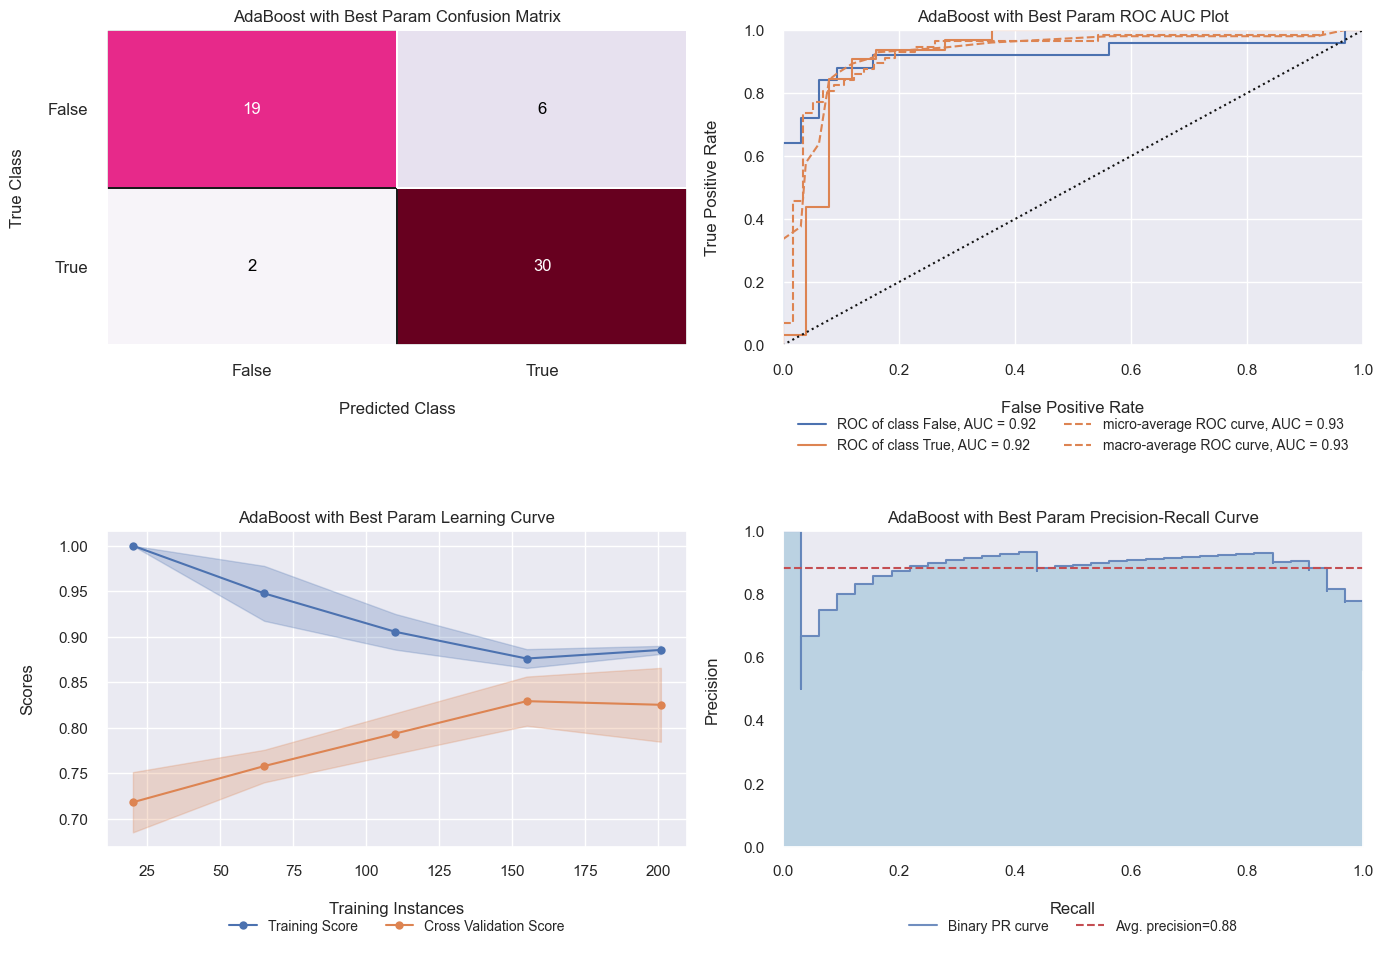

In [102]:
ada_train_val_best_param = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                                        ada_y_train_pred_best_param, ada_y_pred_best_param, ada_model_best_param, "AdaBoost with Best Param")
ada_train_val_best_param

##### 11.8.g Feature Importance for AdaBoosting (AB) Model

           Feature Importance
thall_3                0.0000
thall_1                0.0000
thall_0                0.0000
fbs                    0.0000
caa_4                  0.0000
caa_3                  0.0000
caa_2                  0.0000
caa_1                  0.0000
cp_1                   0.0000
slp_1                  0.0000
cp_3                   0.0000
restecg_0              0.0000
slp_0                  0.0000
restecg_2              0.0000
sex                    0.0104
age                    0.0276
slp_2                  0.0408
exng                   0.0414
trtbps                 0.0428
cp_0                   0.0431
restecg_1              0.0450
cp_2                   0.0525
chol                   0.1046
caa_0                  0.1365
thalachh               0.1366
thall_2                0.1403
oldpeak                0.1783


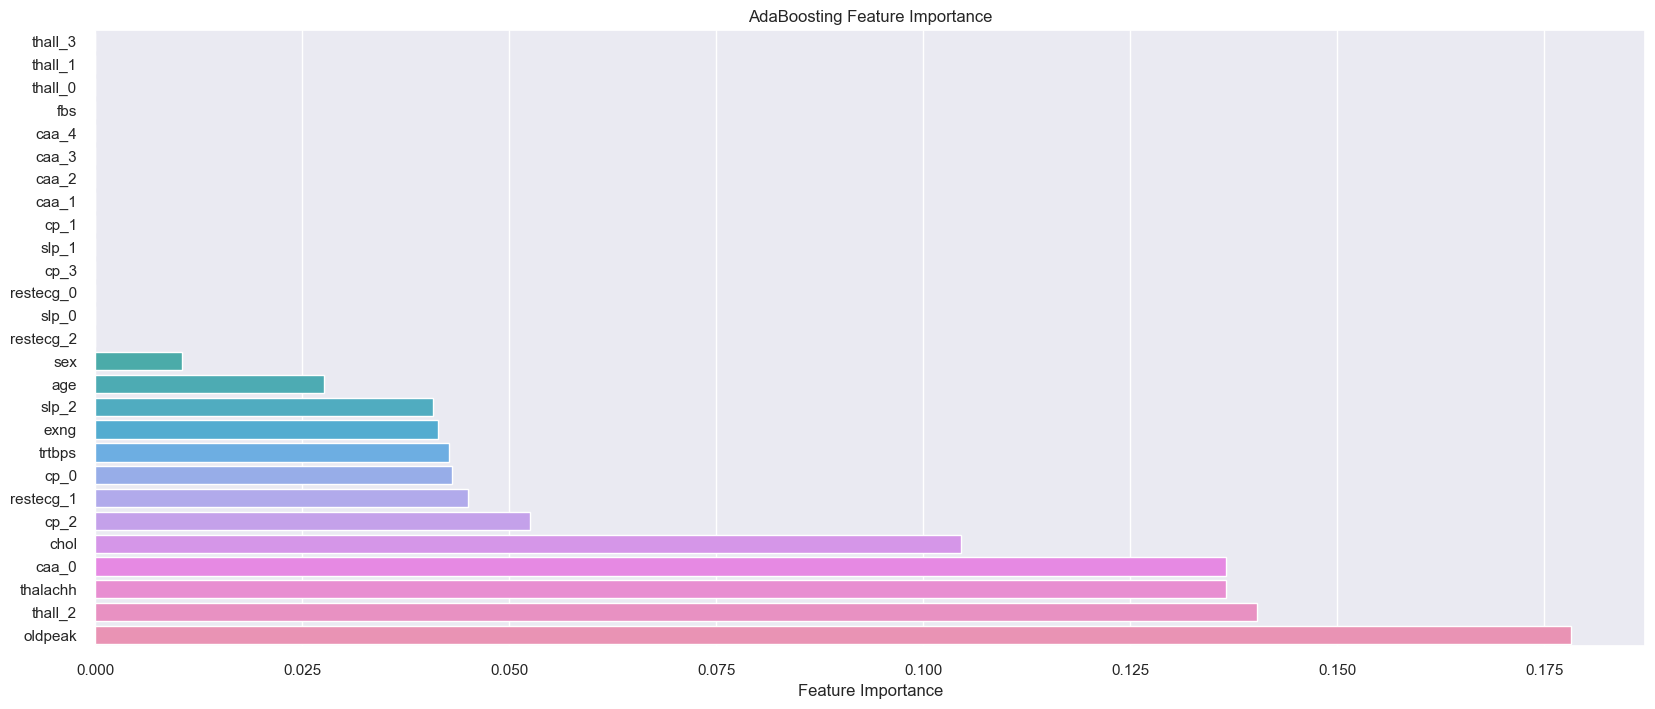

In [103]:
ada_model_best_param.feature_importances_
ada_feature_imp = pd.DataFrame(index=X.columns, data=ada_model_best_param.feature_importances_, columns=["Feature Importance"]).sort_values("Feature Importance")
print(ada_feature_imp)
sns.barplot(x=ada_feature_imp["Feature Importance"], y=ada_feature_imp.index)
plt.title("AdaBoosting Feature Importance")
plt.show()

> The feature that weighs too much on the estimation can SOMETIMES causes overfitting. We are curious about what happens to our model if we drop the features with contribution. For this reason, the most important feature will be dropped and the scores will be checked again.

In [104]:
X_feature_drop_ada = df_cat_encode.drop(columns=["caa_0", "thalachh", "thall_2", "oldpeak", "output"])
y_feature_drop_ada = df_cat_encode["output"]

X_train_feature_drop_ada, X_test_feature_drop_ada, y_train_feature_test_drop_ada, y_test_feature_drop_ada = train_test_split(X_feature_drop_ada, y_feature_drop_ada, test_size=0.2, random_state=42, stratify=y_feature_drop_ada)

In [105]:
print("AdaBoost X train feature drop size: \n", X_train_feature_drop_ada.shape)
print("AdaBoost X test feature drop size: \n", X_test_feature_drop_ada.shape)
print("AdaBoost y train feature drop size: \n", y_train_feature_test_drop_ada.shape)
print("AdaBoost y test feature drop size: \n", y_test_feature_drop_ada.shape)

AdaBoost X train feature drop size: 
 (226, 23)
AdaBoost X test feature drop size: 
 (57, 23)
AdaBoost y train feature drop size: 
 (226,)
AdaBoost y test feature drop size: 
 (57,)


In [106]:
# Perform SMOTE again
smote = SMOTE(random_state=42)
X_train_feature_drop_smote_ada, y_train_feature_drop_smote_ada = smote.fit_resample(X_train_feature_drop_ada, y_train_feature_test_drop_ada)
df_dtype_fixed_bal_feature_drop_ada = pd.concat([X_train_feature_drop_smote_ada, y_train_feature_drop_smote_ada], axis=1)

In [107]:
# --- Data Normalization using Standard Scaler Method ---
X_train_feature_drop_smote_scaled_ada, X_test_feature_drop_scaled_ada = normalize(X_train_feature_drop_smote_ada, X_test_feature_drop_ada, 0)

In [108]:
print("AdaBoost X train feature drop smote scaled size: \n", X_train_feature_drop_smote_scaled_ada.shape)
print("AdaBoost X test feature drop scaled size: \n", X_test_feature_drop_scaled_ada.shape)

AdaBoost X train feature drop smote scaled size: 
 (252, 23)
AdaBoost X test feature drop scaled size: 
 (57, 23)


In [109]:
ada_model_best_param_feature_drop_grid_search = hyperparam_tune_pipe_run('AdaBoost Classifier', AdaBoostClassifier(random_state=42), ada_param_grid, X_train_feature_drop_smote_scaled_ada, y_train_feature_drop_smote_ada)

Running AdaBoost Classifier


In [110]:
# Get the best hyperparameters
ada_model_feature_drop_best_param = ada_model_best_param_feature_drop_grid_search.best_params_
print("AdaBoost Feature Drop Best Parameters: \n", ada_model_feature_drop_best_param)

# Train the model using the best hyperparameters
ada_model_feature_drop_best_param = AdaBoostClassifier(n_estimators=ada_model_feature_drop_best_param["model__n_estimators"],
                                          learning_rate=ada_model_feature_drop_best_param["model__learning_rate"],
                                          algorithm=ada_model_feature_drop_best_param["model__algorithm"],
                                          random_state=42)
ada_model_feature_drop_best_param.fit(X_train_feature_drop_smote_scaled_ada, y_train_feature_drop_smote_ada)
ada_y_train_pred_feature_drop_best_param = ada_model_feature_drop_best_param.predict(X_train_feature_drop_smote_scaled_ada)
ada_y_pred_feature_drop_best_param = ada_model_feature_drop_best_param.predict(X_test_feature_drop_scaled_ada)

AdaBoost Feature Drop Best Parameters: 
 {'model__algorithm': 'SAMME', 'model__learning_rate': 0.2, 'model__n_estimators': 500}


.:. AdaBoost Feature Drop with Best Param Train Accuracy:87.30% .:.
.:. AdaBoost Feature Drop with Best Param Test Accuracy:91.23% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.89      0.97      0.93        32

    accuracy                           0.91        57
   macro avg       0.92      0.90      0.91        57
weighted avg       0.92      0.91      0.91        57


.: Performance Evaluation
**************************


train_set  test_set
Accuracy      0.8730    0.9123
Precision     0.8790    0.8857
Recall        0.8651    0.9688
f1_score      0.8720    0.9254

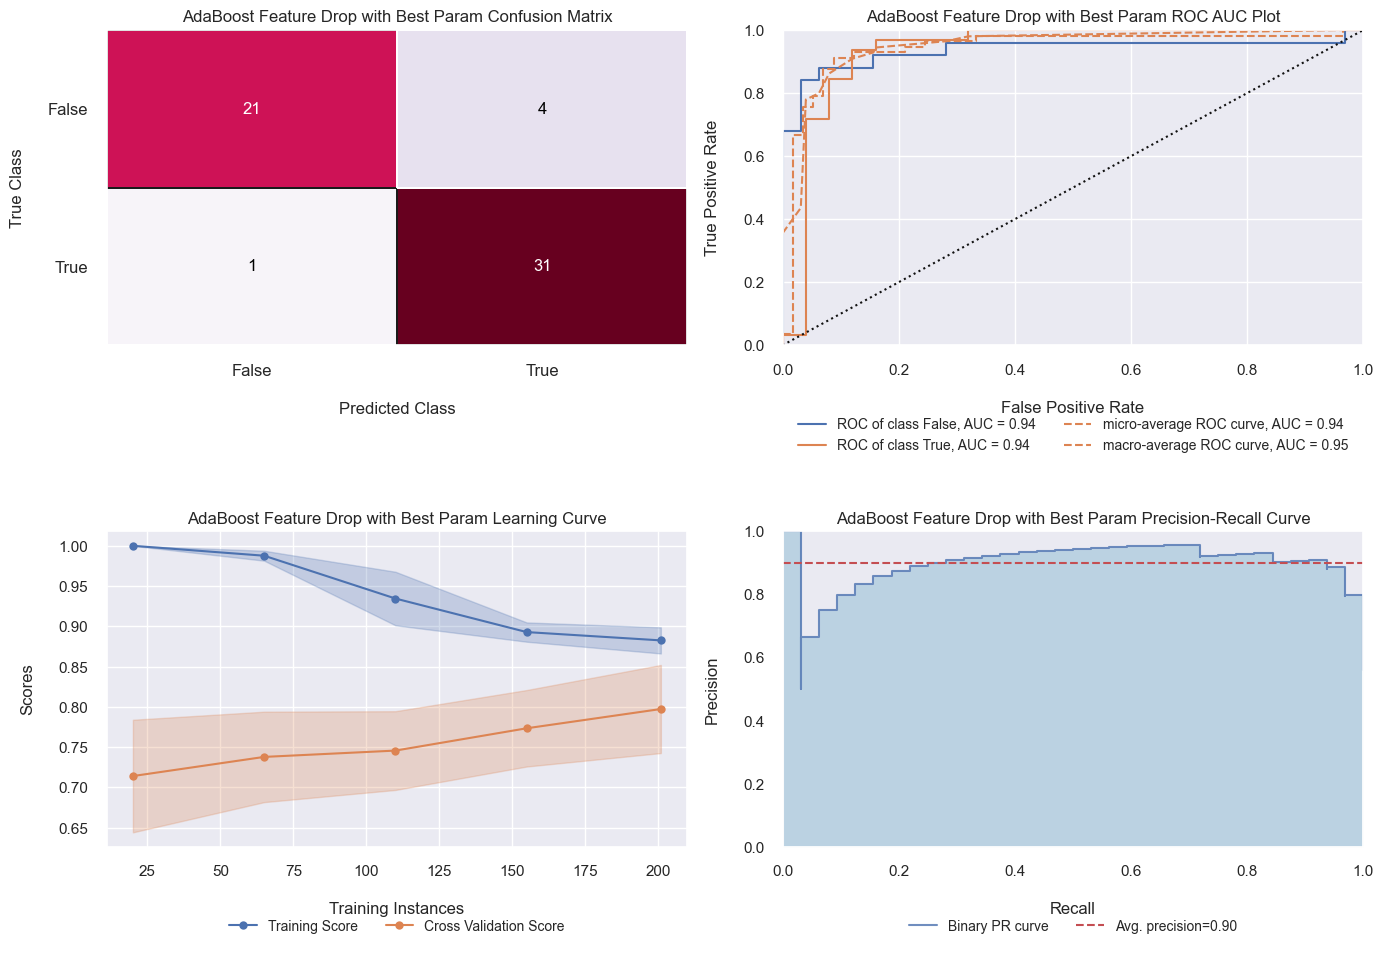

In [111]:
ada_train_val_feature_drop_best_param = train_val(X_train_feature_drop_smote_scaled_ada, X_test_feature_drop_scaled_ada,
                                                  y_train_feature_drop_smote_ada, y_test, 
                                                  ada_y_train_pred_feature_drop_best_param, ada_y_pred_feature_drop_best_param, 
                                                  ada_model_feature_drop_best_param, "AdaBoost Feature Drop with Best Param")
ada_train_val_feature_drop_best_param

> The train accuracy remained relatively similar at around 87%, indicating a good fit to the training data. However, the test accuracy increased significantly to about 91%, indicating improved generalization and better performance on unseen data compared to the previous scenario compared with the hyperparameter tuned model without dropped feature. This feature selection process by dropping "caa_0", "thalachh", "thall_2", "oldpeak" features, combined with hyperparameter tuning, resulted in a more accurate and better-generalized model compared with the hyperparameter tuned model without dropped feature.

### 11.9 | XGBoosting

##### 11.9.a The Implementation of XGBoosting with Default Parameters

In [ ]:
# --- Applying XGBoosting ---
xgb_model =  XGBClassifier(random_state=42)
# xgb_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_smote_scaled, y_train_smote)

# xgb_y_train_pred = xgb_model.predict(X_train_scaled)
xgb_y_train_pred = xgb_model.predict(X_train_smote_scaled)

xgb_y_pred = xgb_model.predict(X_test_scaled)

In [ ]:
# xgb_train_val = train_val(X_train_scaled, X_test_scaled, y_train, y_test, 
#                             xgb_y_train_pred, xgb_y_pred, xgb_model, "XGBoosting")
xgb_train_val = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                            xgb_y_train_pred, xgb_y_pred, xgb_model, "XGBoosting")
xgb_train_val

In [ ]:
xgb_y_pred_proba = xgb_model.predict_proba(X_test_scaled)
xgb_pred_dict = {"Actual": y_test, "Pred": xgb_y_pred, "Proba_1": xgb_y_pred_proba[:, 1], "Proba_0": xgb_y_pred_proba[:, 0]}
xgb_pred_dict_df = pd.DataFrame(xgb_pred_dict)
xgb_pred_dict_df.sample(10)

##### 11.9.b Cross-Validating XGBoosting

In [ ]:
xgb_xvalid_model = XGBClassifier(random_state=42)
xgb_xvalid_model_scores = cross_validate(xgb_xvalid_model, X_train_smote_scaled, y_train_smote, 
                                         scoring=["accuracy", "precision", "recall", "f1"], cv = 10)
xgb_xvalid_model_scores_df = pd.DataFrame(xgb_xvalid_model_scores, index=range(1, 11))
xgb_xvalid_model_scores_df

xgb_xvalid_model_scores_df.mean()[2:]

##### 11.9.c Modelling XGBoosting with Best Parameters Using Pipeline and GridSeachCV

In [ ]:
xgb_param_grid = {
    'model__n_estimators': [100, 200, 300],                         # This parameter defines the number of boosting rounds or decision trees to build. 
                                                                        # Increasing this value can improve the model's performance, but it also increases the training time. 
                                                                        # Finding the right balance is important.
    'model__learning_rate': [0.1, 0.01, 0.001],                     # Also known as the shrinkage parameter, the learning rate determines the impact of each tree on the final outcome. 
                                                                        # Lower values require more trees to build a strong model and can help prevent overfitting. 
                                                                        # Higher values make the model learn faster but may result in overfitting. 
    'model__max_depth': [3, 5, 7],                                  # This parameter controls the maximum depth of each tree. 
                                                                        # Deeper trees can capture more complex relationships in the data, but they are more prone to overfitting. 
                                                                        # It's crucial to set an appropriate value to avoid overfitting while still allowing the model to learn useful patterns.
    'model__subsample': [0.5, 0.9, 1.0],                            #  This parameter defines the fraction of samples to be used for training each tree. 
                                                                        # A value less than 1.0 introduces randomness and helps prevent overfitting. 
                                                                        # However, if it's set too low, the model may not capture enough information from the data.
    'model__colsample_bytree': [0.5, 0.9, 1.0],                     # This parameter specifies the fraction of features (columns) to be used for training each tree. 
                                                                        # It can help reduce overfitting by introducing randomness in feature selection. 
                                                                        # Typically, values between 0.5 and 1.0 work well.
    'model__gamma': [0, 5, 7],                                     # This parameter specifies the minimum loss reduction required to split a node further.
                                                                        # A higher value makes the model more conservative and prevents overfitting. 
                                                                        # It helps control the complexity of the trees by adding a regularization term to the loss function.
    #'model__reg_alpha': [0, 0.1, 0.5, 1.0],                         # These parameters add L1 and L2 regularization terms to the loss function, respectively. 
                                                                        # They can help prevent overfitting and improve generalization. 
                                                                        # Tuning these regularization parameters is important to find the right balance between complexity and simplicity.
    'model__reg_lambda': [0, 0.5, 1.0]                             # These parameters add L1 and L2 regularization terms to the loss function, respectively. 
                                                                        # They can help prevent overfitting and improve generalization. 
                                                                        # Tuning these regularization parameters is important to find the right balance between complexity and simplicity.
    #'model__scale_pos_weight': [1, 2, 5]                            # This parameter is used for imbalanced datasets.
                                                                        # It controls the balance of positive and negative weights, 
                                                                            # where higher values give more weight to the minority class. 
                                                                        # This can be useful when the classes are imbalanced.
}

In [ ]:
xgb_model_best_param_grid_search = hyperparam_tune_pipe_run('XGBoosting Classifier', XGBClassifier(random_state=42), xgb_param_grid, X_train_smote_scaled, y_train_smote)

In [ ]:
# Get the best hyperparameters
xgb_model_best_param = xgb_model_best_param_grid_search.best_params_
print("XGBoosting Best Parameters: \n", xgb_model_best_param)

# Train the model using the best hyperparameters
xgb_model_best_param = XGBClassifier(n_estimators=xgb_model_best_param["model__n_estimators"],
                                     learning_rate=xgb_model_best_param["model__learning_rate"],
                                     max_depth=xgb_model_best_param["model__max_depth"],
                                     subsample=xgb_model_best_param["model__subsample"],
                                     colsample_bytree=xgb_model_best_param["model__colsample_bytree"],
                                     gamma=xgb_model_best_param["model__gamma"],
                                     #reg_alpha=xgb_model_best_param["model__reg_alpha"],
                                     reg_lambda=xgb_model_best_param["model__reg_lambda"],
                                     #model__scale_pos_weight=xgb_model_best_param["model__scale_pos_weight"],
                                     random_state=42)
xgb_model_best_param.fit(X_train_smote_scaled, y_train_smote)
xgb_y_train_pred_best_param = xgb_model_best_param.predict(X_train_smote_scaled)
xgb_y_pred_best_param = xgb_model_best_param.predict(X_test_scaled)

In [ ]:
xgb_y_pred_proba_best_param = xgb_model_best_param.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = xgb_y_pred_best_param
test_data["pred_Proba"] = xgb_y_pred_proba_best_param[:, 1]
test_data.loc[:, ["output", "pred", "pred_Proba"]].sample(10)

##### 11.9.d The Determination of The Optimal Treshold

In [ ]:
xgb_fp_rate, xgb_tp_rate, xgb_thresholds = roc_curve(y_test, xgb_y_pred_proba_best_param[:, 1])
optimal_idx = np.argmax(xgb_tp_rate - xgb_fp_rate)
optimal_threshold = xgb_thresholds[optimal_idx]
xgb_roc_curve = {"fp_rate":xgb_fp_rate, "tp_rate":xgb_tp_rate, "thresholds":xgb_thresholds}
xgb_roc_curve_df = pd.DataFrame(xgb_roc_curve)
xgb_roc_curve_df.iloc[optimal_idx]

In [ ]:
xgb_train_val_best_param = train_val(X_train_smote_scaled, X_test_scaled, y_train_smote, y_test, 
                                        xgb_y_train_pred_best_param, xgb_y_pred_best_param, xgb_model_best_param, "XGBoosting with Best Param")
xgb_train_val_best_param

##### 11.9.e Feature Importance for XGBoosting Model

In [ ]:
xgb_model_best_param.feature_importances_
xgb_feature_imp = pd.DataFrame(index=X.columns, data=xgb_model_best_param.feature_importances_, columns=["Feature Importance"]).sort_values("Feature Importance")
print(xgb_feature_imp)
sns.barplot(x=xgb_feature_imp["Feature Importance"], y=xgb_feature_imp.index)
plt.title("XGBoosting Feature Importance")
plt.show()

> The feature that weighs too much on the estimation can SOMETIMES causes overfitting. We are curious about what happens to our model if we drop the features with contribution. For this reason, the most important feature will be dropped and the scores will be checked again.

In [ ]:
X_feature_drop_xgb = df_cat_encode.drop(columns=["thall_2", "output"])
y_feature_drop_xgb = df_cat_encode["output"]
X_train_feature_drop_xgb, X_test_feature_drop_xgb, y_train_feature_drop_xgb, y_test_feature_drop_xgb = train_test_split(X_feature_drop_xgb, y_feature_drop_xgb, test_size=0.2, random_state=42, stratify=y_feature_drop_xgb)

In [ ]:
print("XGBoosting X train feature drop size: \n", X_train_feature_drop_xgb.shape)
print("XGBoosting X test feature drop size: \n", X_test_feature_drop_xgb.shape)
print("XGBoosting y train feature drop size: \n", y_train_feature_drop_xgb.shape)
print("XGBoosting y test feature drop size: \n", y_test_feature_drop_xgb.shape)

In [ ]:
smote = SMOTE(random_state=42)
X_train_feature_drop_smote_xgb, y_train_feature_drop_smote_xgb = smote.fit_resample(X_train_feature_drop_xgb, y_train_feature_drop_xgb)
df_dtype_fixed_bal_feature_drop_xgb = pd.concat([X_train_feature_drop_smote_xgb, y_train_feature_drop_smote_xgb], axis=1)

In [ ]:
# --- Data Normalization using Standard Scaler Method ---
X_train_feature_drop_smote_scaled_xgb, X_test_feature_drop_scaled_xgb = normalize(X_train_feature_drop_smote_xgb, X_test_feature_drop_xgb, 0)

In [ ]:
print("XGBoost X train feature drop smote scaled size: \n", X_train_feature_drop_smote_scaled_xgb.shape)
print("XGBoost X test feature drop scaled size: \n", X_test_feature_drop_scaled_xgb.shape)

In [ ]:
xgb_model_best_param_feature_drop_grid_search = hyperparam_tune_pipe_run('XGBoosting Classifier', XGBClassifier(random_state=42), xgb_param_grid, X_train_feature_drop_smote_scaled_xgb, y_train_feature_drop_smote_xgb)

In [ ]:
# Get the best hyperparameters
xgb_model_feature_drop_best_param = xgb_model_best_param_feature_drop_grid_search.best_params_
print("XGBoosting Feature Drop Best Parameters: \n", xgb_model_feature_drop_best_param)

# Train the model using the best hyperparameters
xgb_model_feature_drop_best_param = XGBClassifier(n_estimators=xgb_model_feature_drop_best_param["model__n_estimators"],
                                     learning_rate=xgb_model_feature_drop_best_param["model__learning_rate"],
                                     max_depth=xgb_model_feature_drop_best_param["model__max_depth"],
                                     subsample=xgb_model_feature_drop_best_param["model__subsample"],
                                     colsample_bytree=xgb_model_feature_drop_best_param["model__colsample_bytree"],
                                     gamma=xgb_model_feature_drop_best_param["model__gamma"],
                                     #reg_alpha=xgb_model_best_param["model__reg_alpha"],
                                     reg_lambda=xgb_model_feature_drop_best_param["model__reg_lambda"],
                                     #model__scale_pos_weight=xgb_model_best_param["model__scale_pos_weight"],
                                     random_state=42)
xgb_model_feature_drop_best_param.fit(X_train_feature_drop_smote_scaled_xgb, y_train_feature_drop_smote_xgb)
xgb_y_train_pred_feature_drop_best_param = xgb_model_feature_drop_best_param.predict(X_train_feature_drop_smote_scaled_xgb)
xgb_y_pred_feature_drop_best_param = xgb_model_feature_drop_best_param.predict(X_test_feature_drop_scaled_xgb)

In [ ]:
xgb_train_val_feature_drop_best_param = train_val(X_train_feature_drop_smote_scaled_xgb, X_test_feature_drop_scaled_xgb, 
                                                  y_train_feature_drop_smote_xgb, y_test, 
                                                  xgb_y_train_pred_feature_drop_best_param, xgb_y_pred_feature_drop_best_param, 
                                                  xgb_model_feature_drop_best_param, "XGBoosting Feature Drop with Best Param")
xgb_train_val_feature_drop_best_param

> After hyperparameter tuning without dropping features, observed an improvement in train accuracy and generalize better as the train test accurcy difference has reduced about 8.3% compared with original trained model.

> However, the 'thall_2' feature dropped caausing both train and test accuracy dropped about 5% so this feature is proven important for the model performance.

In [ ]:
### Stopper for testing ###
# XXX
### Stopper for testing ###

# 12. | Model Comparison 👀
👉 After implementing 10 models, this section will compare machine learning models.

In [ ]:
# --- Create Accuracy Comparison Table ---
f1_compare_df = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 
                                  'Gradient Boosting', 'AdaBoost', 'XGBoosting'], 
                                    'Train F1 Score %': [round(log_train_val["train_set"].f1_score*100, 2), 
                                                round(knn_train_val["train_set"].f1_score*100, 2), 
                                                round(svc_train_val["train_set"].f1_score*100, 2), 
                                                round(gnb_train_val["train_set"].f1_score*100, 2), 
                                                round(dt_train_val["train_set"].f1_score*100, 2), 
                                                round(rf_train_val["train_set"].f1_score*100, 2),  
                                                round(gb_train_val["train_set"].f1_score*100, 2),
                                                round(ada_train_val["train_set"].f1_score*100, 2),
                                                round(xgb_train_val["train_set"].f1_score*100, 2)],
                                    'Test F1 Score %': [round(log_train_val["test_set"].f1_score*100, 2), 
                                                round(knn_train_val["test_set"].f1_score*100, 2), 
                                                round(svc_train_val["test_set"].f1_score*100, 2), 
                                                round(gnb_train_val["test_set"].f1_score*100, 2), 
                                                round(dt_train_val["test_set"].f1_score*100, 2), 
                                                round(rf_train_val["test_set"].f1_score*100, 2), 
                                                round(gb_train_val["test_set"].f1_score*100, 2),  
                                                round(ada_train_val["test_set"].f1_score*100, 2),
                                                round(xgb_train_val["test_set"].f1_score*100, 2)]})

best_f1_compare_df = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                                'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 
                                                'Gradient Boosting', 'AdaBoost', 'XGBoosting'], 
                                          'Best Train F1 Score %': [round(log_train_val_best_param["train_set"].f1_score*100, 2), 
                                                                  round(knn_train_val_best_param["train_set"].f1_score*100, 2), 
                                                                  round(svc_train_val_best_param["train_set"].f1_score*100, 2), 
                                                                  round(gnb_train_val_best_param["train_set"].f1_score*100, 2), 
                                                                  round(dt_train_val_best_param["train_set"].f1_score*100, 2), 
                                                                  round(rf_train_val_best_param["train_set"].f1_score*100, 2),  
                                                                  round(gb_train_val_best_param["train_set"].f1_score*100, 2),
                                                                  round(ada_train_val_best_param["train_set"].f1_score*100, 2),
                                                                  round(xgb_train_val_best_param["train_set"].f1_score*100, 2)],
                                          'Best Test F1 Score %': [round(log_train_val_best_param["test_set"].f1_score*100, 2), 
                                                                  round(knn_train_val_best_param["test_set"].f1_score*100, 2), 
                                                                  round(svc_train_val_best_param["test_set"].f1_score*100, 2), 
                                                                  round(gnb_train_val_best_param["test_set"].f1_score*100, 2), 
                                                                  round(dt_train_val_best_param["test_set"].f1_score*100, 2), 
                                                                  round(rf_train_val_best_param["test_set"].f1_score*100, 2), 
                                                                  round(gb_train_val_best_param["test_set"].f1_score*100, 2),  
                                                                  round(ada_train_val_best_param["test_set"].f1_score*100, 2),
                                                                  round(xgb_train_val_best_param["test_set"].f1_score*100, 2)]})

feature_select_best_f1_compare_df = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                                'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 
                                                'Gradient Boosting', 'AdaBoost', 'XGBoosting'], 
                                          'Feature Select Best Train F1 Score %': [round(log_train_val_feature_drop_best_param["train_set"].f1_score*100, 2), 
                                                                  round(knn_train_val_best_param["train_set"].f1_score*100, 2), 
                                                                  round(svc_train_val_feature_drop_best_param["train_set"].f1_score*100, 2), 
                                                                  round(gnb_train_val_best_param["train_set"].f1_score*100, 2), 
                                                                  round(dt_train_val_feature_drop_best_param["train_set"].f1_score*100, 2), 
                                                                  round(rf_train_val_best_param["train_set"].f1_score*100, 2),  
                                                                  round(gb_train_val_feature_drop_best_param["train_set"].f1_score*100, 2),
                                                                  round(ada_train_val_feature_drop_best_param["train_set"].f1_score*100, 2),
                                                                  round(xgb_train_val_feature_drop_best_param["train_set"].f1_score*100, 2)],
                                          'Feature Select Best Test F1 Score %': [round(log_train_val_feature_drop_best_param["test_set"].f1_score*100, 2), 
                                                                  round(knn_train_val_best_param["test_set"].f1_score*100, 2), 
                                                                  round(svc_train_val_feature_drop_best_param["test_set"].f1_score*100, 2), 
                                                                  round(gnb_train_val_best_param["test_set"].f1_score*100, 2), 
                                                                  round(dt_train_val_feature_drop_best_param["test_set"].f1_score*100, 2), 
                                                                  round(rf_train_val_best_param["test_set"].f1_score*100, 2), 
                                                                  round(gb_train_val_feature_drop_best_param["test_set"].f1_score*100, 2),  
                                                                  round(ada_train_val_feature_drop_best_param["test_set"].f1_score*100, 2),
                                                                  round(xgb_train_val_feature_drop_best_param["test_set"].f1_score*100, 2)]})

# --- Create Accuracy Comparison Table ---
f1_compare = f1_compare_df.sort_values(by=['Train F1 Score %', 'Test F1 Score %'], ascending=False).style.background_gradient(cmap='coolwarm').hide_index().set_properties(**{'font-family': 'Segoe UI'})
# f1_compare

best_f1_compare = best_f1_compare_df.sort_values(by=['Best Train F1 Score %', 'Best Test F1 Score %'], ascending=False).style.background_gradient(cmap='coolwarm').hide_index().set_properties(**{'font-family': 'Segoe UI'})
# best_f1_compare

feature_select_best_f1_compare = feature_select_best_f1_compare_df.sort_values(by=['Feature Select Best Train F1 Score %', 'Feature Select Best Test F1 Score %'], ascending=False).style.background_gradient(cmap='coolwarm').hide_index().set_properties(**{'font-family': 'Segoe UI'})
# best_accuracy_compare

In [ ]:
f1_compare_overall = pd.concat([f1_compare_df, best_f1_compare_df, feature_select_best_f1_compare_df], axis=1)
f1_compare_overall = f1_compare_overall.iloc[:, [0,1,2,4,5,7,8]]
f1_compare_overall

In [ ]:
f1_compare_overall["{~ Train Test F1 Score Difference % ~}"] = f1_compare_overall["Train F1 Score %"] - f1_compare_overall["Test F1 Score %"] 
f1_compare_overall["{~ Best Train Test F1 Score Difference % ~}"] = f1_compare_overall["Best Train F1 Score %"] - f1_compare_overall["Best Test F1 Score %"]
f1_compare_overall["{~ Feature Select Best Train Test F1 Score Difference % ~}"] = f1_compare_overall["Feature Select Best Train F1 Score %"] - f1_compare_overall["Feature Select Best Test F1 Score %"] 
f1_compare_overall = f1_compare_overall[['Model', 'Train F1 Score %', 'Test F1 Score %', '{~ Train Test F1 Score Difference % ~}',\
                                        'Best Train F1 Score %', 'Best Test F1 Score %', '{~ Best Train Test F1 Score Difference % ~}',\
                                        'Feature Select Best Train F1 Score %', 'Feature Select Best Test F1 Score %', '{~ Feature Select Best Train Test F1 Score Difference % ~}']]
f1_compare_overall_grad = f1_compare_overall.sort_values(by=['Feature Select Best Test F1 Score %', '{~ Feature Select Best Train Test F1 Score Difference % ~}'], ascending=False).style.background_gradient(cmap=plt.cm.get_cmap('coolwarm').reversed()).hide_index().set_properties(**{'font-family': 'Segoe UI'})
f1_compare_overall_grad

In [ ]:
# --- Create Accuracy Comparison Table ---
accuracy_compare_df = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 
                                  'Gradient Boosting', 'AdaBoost', 'XGBoosting'], 
                                    'Train Accuracy %': [round(log_train_val["train_set"].Accuracy*100, 2), 
                                                round(knn_train_val["train_set"].Accuracy*100, 2), 
                                                round(svc_train_val["train_set"].Accuracy*100, 2), 
                                                round(gnb_train_val["train_set"].Accuracy*100, 2), 
                                                round(dt_train_val["train_set"].Accuracy*100, 2), 
                                                round(rf_train_val["train_set"].Accuracy*100, 2),  
                                                round(gb_train_val["train_set"].Accuracy*100, 2),
                                                round(ada_train_val["train_set"].Accuracy*100, 2),
                                                round(xgb_train_val["train_set"].Accuracy*100, 2)],
                                    'Test Accuracy %': [round(log_train_val["test_set"].Accuracy*100, 2), 
                                                round(knn_train_val["test_set"].Accuracy*100, 2), 
                                                round(svc_train_val["test_set"].Accuracy*100, 2), 
                                                round(gnb_train_val["test_set"].Accuracy*100, 2), 
                                                round(dt_train_val["test_set"].Accuracy*100, 2), 
                                                round(rf_train_val["test_set"].Accuracy*100, 2), 
                                                round(gb_train_val["test_set"].Accuracy*100, 2),  
                                                round(ada_train_val["test_set"].Accuracy*100, 2),
                                                round(xgb_train_val["test_set"].Accuracy*100, 2)]})

best_accuracy_compare_df = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                                'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 
                                                'Gradient Boosting', 'AdaBoost', 'XGBoosting'], 
                                          'Best Train Accuracy %': [round(log_train_val_best_param["train_set"].Accuracy*100, 2), 
                                                                  round(knn_train_val_feature_drop_best_param["train_set"].Accuracy*100, 2), 
                                                                  round(svc_train_val_best_param["train_set"].Accuracy*100, 2), 
                                                                  round(gnb_train_val_best_param["train_set"].Accuracy*100, 2), 
                                                                  round(dt_train_val_best_param["train_set"].Accuracy*100, 2), 
                                                                  round(rf_train_val_best_param["train_set"].Accuracy*100, 2),  
                                                                  round(gb_train_val_best_param["train_set"].Accuracy*100, 2),
                                                                  round(ada_train_val_best_param["train_set"].Accuracy*100, 2),
                                                                  round(xgb_train_val_best_param["train_set"].Accuracy*100, 2)],
                                          'Best Test Accuracy %': [round(log_train_val_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(knn_train_val_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(svc_train_val_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(gnb_train_val_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(dt_train_val_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(rf_train_val_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(gb_train_val_best_param["test_set"].Accuracy*100, 2),  
                                                                  round(ada_train_val_best_param["test_set"].Accuracy*100, 2),
                                                                  round(xgb_train_val_best_param["test_set"].Accuracy*100, 2)]})


feature_select_best_accuracy_compare_df = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                                'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 
                                                'Gradient Boosting', 'AdaBoost', 'XGBoosting'], 
                                          'Feature Select Best Train Accuracy %': [round(log_train_val_feature_drop_best_param["train_set"].Accuracy*100, 2), 
                                                                  round(knn_train_val_best_param["train_set"].Accuracy*100, 2), 
                                                                  round(svc_train_val_feature_drop_best_param["train_set"].Accuracy*100, 2), 
                                                                  round(gnb_train_val_best_param["train_set"].Accuracy*100, 2), 
                                                                  round(dt_train_val_feature_drop_best_param["train_set"].Accuracy*100, 2), 
                                                                  round(rf_train_val_best_param["train_set"].Accuracy*100, 2),  
                                                                  round(gb_train_val_feature_drop_best_param["train_set"].Accuracy*100, 2),
                                                                  round(ada_train_val_feature_drop_best_param["train_set"].Accuracy*100, 2),
                                                                  round(xgb_train_val_feature_drop_best_param["train_set"].Accuracy*100, 2)],
                                          'Feature Select Best Test Accuracy %': [round(log_train_val_feature_drop_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(knn_train_val_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(svc_train_val_feature_drop_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(gnb_train_val_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(dt_train_val_feature_drop_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(rf_train_val_best_param["test_set"].Accuracy*100, 2), 
                                                                  round(gb_train_val_feature_drop_best_param["test_set"].Accuracy*100, 2),  
                                                                  round(ada_train_val_feature_drop_best_param["test_set"].Accuracy*100, 2),
                                                                  round(xgb_train_val_feature_drop_best_param["test_set"].Accuracy*100, 2)]})


# --- Create Accuracy Comparison Table ---
accuracy_compare = accuracy_compare_df.sort_values(by=['Train Accuracy %', 'Test Accuracy %'], ascending=False).style.background_gradient(cmap='coolwarm').hide_index().set_properties(**{'font-family': 'Segoe UI'})
# accuracy_compare

best_accuracy_compare = best_accuracy_compare_df.sort_values(by=['Best Train Accuracy %', 'Best Test Accuracy %'], ascending=False).style.background_gradient(cmap='coolwarm').hide_index().set_properties(**{'font-family': 'Segoe UI'})
# best_accuracy_compare

feature_select_best_accuracy_compare = feature_select_best_accuracy_compare_df.sort_values(by=['Feature Select Best Train Accuracy %', 'Feature Select Best Test Accuracy %'], ascending=False).style.background_gradient(cmap='coolwarm').hide_index().set_properties(**{'font-family': 'Segoe UI'})
# best_accuracy_compare

In [ ]:
accuracy_compare_overall = pd.concat([accuracy_compare_df, best_accuracy_compare_df, feature_select_best_accuracy_compare_df], axis=1)
accuracy_compare_overall = accuracy_compare_overall.iloc[:, [0,1,2,4,5,7,8]]
accuracy_compare_overall

In [ ]:
accuracy_compare_overall["{~ Train Test Accuracy Difference % ~}"] = accuracy_compare_overall["Train Accuracy %"] - accuracy_compare_overall["Test Accuracy %"] 
accuracy_compare_overall["{~ Best Train Test Accuracy Difference % ~}"] = accuracy_compare_overall["Best Train Accuracy %"] - accuracy_compare_overall["Best Test Accuracy %"] 
accuracy_compare_overall["{~ Feature Select Best Train Test Accuracy Difference % ~}"] = accuracy_compare_overall["Feature Select Best Train Accuracy %"] - accuracy_compare_overall["Feature Select Best Test Accuracy %"] 
accuracy_compare_overall = accuracy_compare_overall[['Model', 'Train Accuracy %', 'Test Accuracy %', '{~ Train Test Accuracy Difference % ~}',\
                                                    'Best Train Accuracy %', 'Best Test Accuracy %', '{~ Best Train Test Accuracy Difference % ~}',\
                                                    'Feature Select Best Train Accuracy %', 'Feature Select Best Test Accuracy %', '{~ Feature Select Best Train Test Accuracy Difference % ~}']]
accuracy_compare_overall_grad = accuracy_compare_overall.sort_values(by=['Feature Select Best Test Accuracy %', '{~ Feature Select Best Train Test Accuracy Difference % ~}'], ascending=False).style.background_gradient(cmap='coolwarm').hide_index().set_properties(**{'font-family': 'Segoe UI'})
accuracy_compare_overall_grad

👉 From the results, it can be seen that <b><mark>AdaBoost</mark> provides consistent and better results across different test cases</b>.

> From <b><mark>'Basic Modeling', 'Hyperparamter Tuning Modeling' to 'Hyperparamter Tuning and Feature Selection Modelling'</mark></b>,
* AdaBoost:
    - has a <b><mark>great improvement on Test Accuracy from 87.72% to 91.23%</mark></b> and 
    - its <b><mark>Train Text Accuracy Differences improved from 6.33%, 1.74% to 3.93%</mark></b>.</br>
* K Nearest Neighbour:
    > - has <mark><b>the greatly improved on test accuracy from 78.95% to 91.23%</mark></b>
    > - but its <mark><b>train accuracy increase drastically from 89.29% to 100%</mark></b> causing model <mark><b>prone to overfitting</mark></b>.
* Random Forest:
    > - <mark><b>no Feature Selection Modelling</mark></b> is done as no any features is specially weighted too much comparing one another.
    > - the <mark><b>Test Accuracy and Train Test Accuracy Difference are improving from 'Basic Modeling' to 'Hyperparamter Tuning Modeling'</mark></b> by <mark><b>from 85.96% to 87.72%</mark></b> and <mark><b>from 14.04% to 5.93%</mark></b> respectively.
* XGBoosting:
    > - show <mark><b>improvement on Train Text Accuracy Differences</mark></b>
    > - but their <mark><b>Train Accuracy and Test Accuracy keep on decreasing to just 86.51% and 82.46%.</mark></b> respectively.
* Decision Tree:
    > - show <mark><b>improvement on Train Text Accuracy Differences</mark></b>
    > - the <mark><b>Test Accuracy keep on improving to 82.46%.</mark></b>.
* Support Vector Machine:
    > - show <mark><b>observed the hyperparameter tuned model without dropped feature</mark></b> has <mark><b>a drastic decrease in both train and test accuracy as this could be attributed to a suboptimal set of hyperparameters, negatively affecting the model's performance or the tuning process is not properly regularized or validated.</mark></b></br>
    > - <mark><b>The hyperparameter tuned with dropped feature</mark></b> has <mark><b>improved generalization although the test accuracy slightly drops about 1.75 compared with original traine model</mark></b>.
* Gaussian Naive Bayes:
    > - show <mark><b>drastic improvement from 'Basic Modeling' or 'Hyperparamter Tuning Modeling' to 'Hyperparamter Tuning and Feature Selection Modelling' on Train Text Accuracy Differences from 14.49% to 1.44%</mark></b> and 
    > - its <mark><b>both Train Accuracy and Test Accuracy increase drastically to from 70.63% to 82.14% and from 56.14% to 80.70% respectively</mark></b>.
    > - but the <mark><b>Test Accuracy is the lowest compared to all other models</mark></b>.
* Gradient Boosting:
    > is having <mark><b>highly overfitting for all the modelling</mark></b>. as <mark><b>Train Accuracy is 100%</mark></b> with <mark><b>high Train Test Accuracy Difference</mark></b>.

In [ ]:
### Stopper for testing ###
# XXX
### Stopper for testing ###

# 12. | Output 📤</font>
* 👉 The next step will <b>make output results in csv file</b>. In addition, this section will also <b>export the best model into pickle (.pkl) file</b>.

### 12.1 | Text File 📄
👉 The dataset that will be extracted into text (.csv) file shaped as follows.

In [113]:
# --- Transform Test Set & Prediction into New Data Frame ---
# Since adaboost is at the best performance with dataset without ["caa_0", "thalachh", "thall_2", "oldpeak"], 
    # these columns need to be dropped before perfroming prediction
X_test_feature_drop_scaled_ada = pd.DataFrame(X_test_feature_drop_scaled_ada, columns=['age', 'sex', 'trtbps', 'chol', 
                                                'fbs', 'exng',
                                                'cp_0', 'cp_1', 'cp_2', 'cp_3',
                                                'restecg_0', 'restecg_1', 'restecg_2',
                                                'slp_0', 'slp_1', 'slp_2',
                                                'caa_1', 'caa_2', 'caa_3', 'caa_4',
                                                'thall_0', 'thall_1', 'thall_3'])

ada_best_pred = pd.DataFrame(ada_y_pred_feature_drop_best_param, columns=['output_pred'])

# Since created a new dataframe for the test and pred dataset, the index for these both dataset is reset,
    # therefore, need to reset the y_test dataset's index in order to match with test and pred dataset and concatenate them all together.
y_test_feature_drop_ada = y_test_feature_drop_ada.reset_index()

ada_best_test_prediction = pd.concat([X_test_feature_drop_scaled_ada, y_test_feature_drop_ada, ada_best_pred], axis=1)

In [ ]:
### Stopper for testing ###
# XXX
### Stopper for testing ###

👉 After that, the code below will export the table displayed above into text (.csv) file.

In [114]:
# --- Export Prediction Result into csv File ---
ada_best_test_prediction.to_csv('result/ada_test_best_prediction_heart_disease.csv', index=True)

In [ ]:
### Stopper for testing ###
# XXX
### Stopper for testing ###

### 12.2 | Pickle File 🥒</font>
* 👉 This section will export the best models into pickle (.pkl) file.

In [115]:
# --- Export Pickle File ---
# Save the model as a pickle file
ada_best_filename = 'heart_disease_ada_best_model.pkl'
joblib.dump(ada_model_feature_drop_best_param, 'saved_model/' + ada_best_filename)

['saved_model/heart_disease_ada_best_model.pkl']

# 13. | Prediction Case 🧪</font>
👉 For example, there is <b>new patient data</b> that is not available in the dataset. It is <b>required to predict if this new patient has heart disease/not</b>. The patient data are as follows.
    <blockquote style="color: #FFFFFF;">
      <ul>
        <li>age (<i>scaled</i>) &emsp;&emsp;&emsp;: <b>0.254</b></li>
        <li>sex &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: <b>Male (0)</b></li>
        <li>trestbps (<i>scaled</i>) &emsp;: <b>0.487</b></li>
        <li>chol (<i>scaled</i>) &emsp;&emsp;&ensp;&nbsp;: <b>0.362</b></li>
        <li>fbs &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;: <b>> 120 mg/dl (1)</b></li>
        <li>restecg (<i>scaled</i>) &emsp;&nbsp;: <b>0</b></li>
        <li>thalach (<i>scaled</i>) &emsp;&nbsp;: <b>0.641</b></li>
        <li>exang &emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;: <b>1</b></li>
        <li>oldpeak (<i>scaled</i>) &emsp;: <b>0.672</b></li>
        <li>ca (<i>scaled</i>) &emsp;&emsp;&emsp;&nbsp;&nbsp;: <b>0</b></li>
        <li>cp &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;: <b>3</b></li>
        <li>thal &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;: <b>3</b></li>
        <li>slope &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: <b>1</b></li>
      </ul>
    </blockquote>
</div>

In [117]:
# Load the model from the file
ada_best_model = joblib.load('saved_model/' + ada_best_filename)

In [118]:
# --- Turn Information into List ---
data = [[0.254, 0, 0.487, 0.362,   ## age, sex, trtbps, chol
         1, 0.641, 1, 0.672,       ## fbs, thalachh, exng, oldpeak,
         0, 0, 0, 1,               ## cp_0, cp_1, cp_2, cp_3,
         1, 0, 0,                  ## restecg_0, restecg_1, restecg_2,
         0, 1, 0,                  ## slp_0, slp_1, slp_2, 
         1, 0, 0, 0, 0,            ## caa_0, caa_1, caa_2, caa_3, caa_4,
         0, 0, 0, 1]]              ## thall_0, thall_1, thall_2, thall_3

# Since adaboost is at the best performance with dataset without ["caa_0", "thalachh", "thall_2", "oldpeak"], 
    # these columns need to be dropped before perfroming prediction
clean_data = [[0.254, 0, 0.487, 0.362,    ## age, sex, trtbps, chol
                1, 1,                     ## fbs, exng,
                0, 0, 0, 1,               ## cp_0, cp_1, cp_2, cp_3,
                1, 0, 0,                  ## restecg_0, restecg_1, restecg_2,
                0, 1, 0,                  ## slp_0, slp_1, slp_2, 
                0, 0, 0, 0,               ## caa_1, caa_2, caa_3, caa_4,
                0, 0, 1]]                 ## thall_0, thall_1, thall_3   

# --- Prediction using Gradient Boosting ---
result = ada_best_model.predict(clean_data)
print(result)

# --- Print Heart Disease Status ---
if result[0] == 1:
  print('' + '.:. Heart Disease Detected!.:.' + '')
else:
  print('' + '.:. Heart Disease Not Detected!.:.' + '')

[0]
.:. Heart Disease Not Detected!.:.


>>> Random Train Sample Prediction

In [119]:
df_dtype_fixed_bal_feature_drop_ada.head(10)

age  sex  trtbps  chol  fbs  exng  cp_0  cp_1  cp_2  cp_3  restecg_0  \
0   57    1     150   126    1     0     0     0     1     0          0   
1   57    0     140   241    0     1     1     0     0     0          0   
2   62    1     120   281    0     0     0     1     0     0          1   
3   62    0     124   209    0     0     1     0     0     0          0   
4   66    1     112   212    0     1     1     0     0     0          1   
5   55    0     135   250    0     0     0     1     0     0          1   
6   54    0     132   288    1     1     0     1     0     0          1   
7   47    1     110   275    0     1     1     0     0     0          1   
8   41    1     112   250    0     0     0     0     1     0          0   
9   65    1     110   248    0     0     1     0     0     0          1   

   restecg_1  restecg_2  slp_0  slp_1  slp_2  caa_1  caa_2  caa_3  caa_4  \
0          1          0      0      0      1      1      0      0      0   
1          1          0      0      1      0      0      0      0      0   
2          0          0      0      1      0      1      0      0      0   
3          1          0      0      0      1      0      0      0      0   
4          0          0      0      0      1      1      0      0      0   
5          0          0      0      1      0      0      0      0      0   
6          0          0      0      0      1      1      0      0      0   
7          0          0      0      1      0      1      0      0      0   
8          1          0      0      0      1      0      0      0      0   
9          0          0      0      0      1      0      1      0      0   

   thall_0  thall_1  thall_3  output  
0        0        0        1       1  
1        0        0        1       0  
2        0        0        1       0  
3        0        0        0       1  
4        0        0        0       0  
5        0        0        0       1  
6        0        0        0       1  
7        0        0        0       0  
8        0        0        0       1  
9        0        1        0       0

In [120]:
# Since adaboost is at the best performance with dataset without ["caa_0", "thalachh", "thall_2", "oldpeak"], 
    # these columns need to be dropped before perfroming prediction
X_df_train_new = df_dtype_fixed_bal_feature_drop_ada.drop(columns=["output"])
X_df_train_new_scaled = StandardScaler().fit_transform(X_df_train_new)
y_df_train_new = df_dtype_fixed_bal_feature_drop_ada["output"]

In [121]:
X_df_train_scaled_single = X_df_train_new_scaled[2]
print("Select randomly a train dataset row for testing: \n", X_df_train_scaled_single)

y_df_train_single = y_df_train_new[2]
print("The random selected train dataset's output: \n", y_df_train_single) 

Select randomly a train dataset row for testing: 
 [ 0.81431398  0.63860882 -0.67044293  0.7551731  -0.37452836 -0.67575691
 -0.90889326  2.26855493 -0.57124057 -0.28556096  1.0405021  -0.91619652
 -0.08944272 -0.2236068   1.12706267 -0.89442719  1.96116135 -0.35355339
 -0.26037782 -0.10976426 -0.06311944 -0.2236068   1.27475488]
The random selected train dataset's output: 
 0


In [122]:
# --- Prediction using Gradient Boosting ---
result = ada_best_model.predict([X_df_train_scaled_single])
# result = best_model.predict(X_df_dtype_fixed_bal_heart_disease_true)
print(result)

# --- Print Heart Disease Status ---
for i in result:
    if i == 1:
        print('' + '.:. Heart Disease Detected!.:.' + '')
    else:
        print('' + '.:. Heart Disease Not Detected!.:.' + '')

[0]
.:. Heart Disease Not Detected!.:.


>>> Overall Train Dataset Prediction

In [123]:
# --- Prediction using AdaBoosting ---
ada_best_train_pred  = ada_best_model.predict(X_df_train_new_scaled)
ada_best_train_pred  = pd.DataFrame(ada_best_train_pred, columns=['output_pred'])

# Since created a new dataframe for the test and pred dataset, the index for these both dataset is reset,
    # therefore, need to reset the y_test dataset's index in order to match with test and pred dataset and concatenate them all together.
ada_best_train_pred = pd.concat([df_dtype_fixed_bal_feature_drop_ada, ada_best_train_pred], axis=1)

ada_best_train_pred.to_csv('result/ada_train_best_prediction_heart_disease.csv', index=True)

# 14. | CONCLUSION 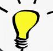

- In this study respectively,

- We have tried to a predict classification problem in Heart Disease Dataset by a variety of models to classifiy Heart Disease predictions in the contex of determining whether anybody is likely to get hearth disease based on the input parameters like gender, age and various test results or not.

- We have made the detailed exploratory analysis (EDA).

- There have been NO missing values in the Dataset and removing 1 duplicate value.

- We have decided which metrics will be used.

- We have analyzed both target and features in detail.

- We have perform SMOTE oversampling to minority target class to treat the imbalance dataset condition.

- We have transformed categorical variables into dummies so we can use them in the models.

- We have handled with skewness problem for make them closer to normal distribution with examing the distribution with skewness value, kurtosis value, the boxplot, histogram and qqplot.

- We have used pipeline, stratifiedKFold and cross-checked the models obtained from train sets by applying cross validation for each model performance and hyperparameter tuning and best paramters selection.

- We have examined the feature importance of some models.

- Lastly we have examined the results of all models visually with respect to select the best one which is AdaBoost with dropping high extraordinarily chi2 score features for the problem in hand.

# 15. |  References 🔗

<ul><b><u>Kaggle Notebook 📚</u></b>
        <li><a style="color: #3D5A80" href="https://www.kaggle.com/code/caesarmario/listen-to-your-heart-a-disease-prediction">Listen to Your Heart: A Disease Prediction by MARIO CAESAR</a></li>
        <li><a style="color: #3D5A80" href="https://www.kaggle.com/code/azizozmen/heart-failure-predict-8-classification-techniques/notebook">Heart_Failure_Predict_8_Classification_Techniques by MATTHEW CONNOR</a></li>
</ul>
<ul><b><u>Online Articles 🌏</u></b>
        <li><a style="color: #3D5A80" href="https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5">5 SMOTE Techniques for Oversampling your Imbalance Data by Cornellius Yudha Wijaya</a></li>
        <li><a style="color: #3D5A80" href="https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/">Tune Hyperparameters for Classification Machine Learning Algorithms by  Jason Brownlee </a></li>
</ul>
<ul><b><u>Models Parameters </u></b>
        <li><a style="color: #3D5A80" href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">sklearn.linear_model.LogisticRegression by scikit-learn developers (BSD License).</a></li>
        <li><a style="color: #3D5A80" href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">sklearn.neighbors.KNeighborsClassifier by scikit-learn developers (BSD License).</a></li>
        <li><a style="color: #3D5A80" href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">sklearn.svm.SVC by scikit-learn developers (BSD License).</a></li>
        <li><a style="color: #3D5A80" href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html">sklearn.naive_bayes.GaussianNB by scikit-learn developers (BSD License).</a></li>
        <li><a style="color: #3D5A80" href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">sklearn.tree.DecisionTreeClassifier by scikit-learn developers (BSD License).</a></li>
        <li><a style="color: #3D5A80" href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">sklearn.neighbors.KNeighborsClassifier by scikit-learn developers (BSD License).</a></li>
        <li><a style="color: #3D5A80" href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">sklearn.ensemble.RandomForestClassifier by scikit-learn developers (BSD License).</a></li>
        <li><a style="color: #3D5A80" href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html">sklearn.ensemble.GradientBoostingClassifier by scikit-learn developers (BSD License).</a></li>
        <li><a style="color: #3D5A80" href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html">sklearn.ensemble.AdaBoostClassifier by scikit-learn developers (BSD License).</a></li>
        <li><a style="color: #3D5A80" href="https://xgboost.readthedocs.io/en/stable/parameter.html">XGBoost Parameters by xgboost developers..</a></li>
</ul>
<ul><b><u>Chi2 Statistical Testing for Feature Selection </u></b>
        <li><a style="color: #3D5A80" href="https://machinelearningmastery.com/feature-selection-with-categorical-data/">How to Perform Feature Selection with Categorical Data by Jason Brownlee.</a></li>
        <li><a style="color: #3D5A80" href="https://towardsdatascience.com/using-the-chi-squared-test-for-feature-selection-with-implementation-b15a4dad93f1">Using the Chi-Squared test for feature selection with implementations by Dr.Saptarsi Goswami. </a></li>
</ul>
<ul><b><u>Notebook Styling </u></b>
        <li><a style="color: #3D5A80" href="https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html">Table Visualization: Styler Object and Customising the Display by NumFOCUS, Inc. Hosted by OVHcloud.</a></li>
</ul>